# Итоговый анализ: EDA, T-тесты и Логистическая регрессия

Данный ноутбук содержит полный анализ данных о сессиях покупок авиабилетов, включающий:
1. **EDA** - Исследовательский анализ данных
2. **T-тесты** - Статистические тесты для проверки гипотез
3. **Логистическая регрессия** - Проверка гипотезы о зависимости с ростом и последующим падением

---

# БЛОК 1: EXPLORATORY DATA ANALYSIS (EDA)

Данный блок содержит исследовательский анализ данных о сессиях покупок авиабилетов.

## Цели анализа:
1. Изучение структуры данных
2. Описательная статистика
3. Анализ распределений
4. Изучение зависимостей между переменными
5. Визуализация ключевых метрик

## 1. Импорт библиотек и настройка окружения


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['font.size'] = 11

print("Библиотеки загружены успешно!")
# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 300

# Настройка pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Библиотеки загружены успешно!")


Библиотеки загружены успешно!
Библиотеки загружены успешно!


## 2. Загрузка данных


In [2]:
df = pd.read_excel('dano_dataset_avia_hashed_corrected_s.xlsx')
df = df.sort_values(["session_id", "screen_dttm"])

print(f"Размер датасета: {df.shape}")
print(f"Период данных: {df['session_start_dt'].min()} - {df['session_start_dt'].max()}")
print(f"Количество уникальных сессий: {df['session_id'].nunique():,}")
print(f"Количество уникальных клиентов: {df['client_id'].nunique():,}")
df.head()


Размер датасета: (244345, 22)
Период данных: 2025-01-01 - 2025-09-30
Количество уникальных сессий: 38,561
Количество уникальных клиентов: 1,900


session_start_dt device_platform  client_start_year  \
80374        2025-06-08             ios           2020.000   
25374        2025-06-08             ios           2020.000   
54663        2025-06-08             ios           2020.000   
105511       2025-06-08             ios           2020.000   
110915       2025-06-08             ios           2020.000   

                                                client_id  \
80374   e20c6a7e9edb9cd2da16309c80999aff4691c9a0cc0dbd...   
25374   e20c6a7e9edb9cd2da16309c80999aff4691c9a0cc0dbd...   
54663   e20c6a7e9edb9cd2da16309c80999aff4691c9a0cc0dbd...   
105511  e20c6a7e9edb9cd2da16309c80999aff4691c9a0cc0dbd...   
110915  e20c6a7e9edb9cd2da16309c80999aff4691c9a0cc0dbd...   

                                               session_id session_source  \
80374   0003e714a683cdd96f098127aff681dd2cfc33b402f15c...     Неизвестно   
25374   0003e714a683cdd96f098127aff681dd2cfc33b402f15c...     Неизвестно   
54663   0003e714a683cdd96f098127aff681dd2cfc33b402f15c...     Неизвестно   
105511  0003e714a683cdd96f098127aff681dd2cfc33b402f15c...     Неизвестно   
110915  0003e714a683cdd96f098127aff681dd2cfc33b402f15c...     Неизвестно   

       session_channel screen_nm              screen_dttm  \
80374       Неизвестно     Поиск  2025-06-08 23:43:40.685   
25374       Неизвестно    Выдача  2025-06-08 23:44:46.680   
54663       Неизвестно    Выдача  2025-06-08 23:47:07.472   
105511      Неизвестно    Выдача  2025-06-08 23:47:58.023   
110915      Неизвестно    Выдача  2025-06-08 23:48:51.052   

        client_avia_user_start_year  client_segment  client_avia_orders  \
80374                          2025               5                   1   
25374                          2025               5                   1   
54663                          2025               5                   1   
105511                         2025               5                   1   
110915                         2025               5                   1   

        client_gmv  session_purchase_price  session_purchase_tickets_num  \
80374     5134.000                     NaN                           NaN   
25374     5134.000                     NaN                           NaN   
54663     5134.000                     NaN                           NaN   
105511    5134.000                     NaN                           NaN   
110915    5134.000                     NaN                           NaN   

       session_purchase_tickets_sourse session_purchase_status  \
80374                              NaN                     NaN   
25374                              NaN                     NaN   
54663                              NaN                     NaN   
105511                             NaN                     NaN   
110915                             NaN                     NaN   

       session_purchase_tickets_airline session_purchase_tickets_departure  \
80374                               NaN                                NaN   
25374                               NaN                                NaN   
54663                               NaN                                NaN   
105511                              NaN                                NaN   
110915                              NaN                                NaN   

       session_purchase_tickets_arrival session_purchase_tickets_luggage_flg  \
80374                               NaN                                  NaN   
25374                               NaN                                  NaN   
54663                               NaN                                  NaN   
105511                              NaN                                  NaN   
110915                              NaN                                  NaN   

       session_purchase_tickets_class_of_service  
80374                                        NaN  
25374                                        NaN  
54663                              

## 3. Преобразование данных


In [3]:
# Преобразование дат
df['session_start_dt'] = pd.to_datetime(df['session_start_dt'])
df['screen_dttm'] = pd.to_datetime(df['screen_dttm'])

# Сохраняем данные до удаления июля для сравнения в графиках
df_before_july_removal = df.copy()

# Заполнение пропущенных значений
df['session_purchase_price'] = df['session_purchase_price'].fillna(0)
df['session_purchase_tickets_num'] = df['session_purchase_tickets_num'].fillna(0)
df['session_purchase_tickets_luggage_flg'] = df['session_purchase_tickets_luggage_flg'].map({'Без багажа': 0, 'С багажом': 1})
df['session_purchase_tickets_luggage_flg'] = df['session_purchase_tickets_luggage_flg'].fillna(0)

# Также заполняем пропуски в данных до удаления июля для консистентности
df_before_july_removal['session_purchase_price'] = df_before_july_removal['session_purchase_price'].fillna(0)
df_before_july_removal['session_purchase_tickets_num'] = df_before_july_removal['session_purchase_tickets_num'].fillna(0)
df_before_july_removal['session_purchase_tickets_luggage_flg'] = df_before_july_removal['session_purchase_tickets_luggage_flg'].map({'Без багажа': 0, 'С багажом': 1})
df_before_july_removal['session_purchase_tickets_luggage_flg'] = df_before_july_removal['session_purchase_tickets_luggage_flg'].fillna(0)

print("✓ Данные преобразованы успешно")


✓ Данные преобразованы успешно


## 4. Создание производных переменных


In [4]:
# Создание пути сессии
session_paths = (
    df.groupby("session_id")["screen_nm"]
      .apply(lambda x: " > ".join(x))
      .rename("session_path")
      .reset_index()
)

df = df.merge(session_paths, on="session_id", how="left")

# Определение рангов экранов воронки
ranker = {
    "Поиск": 0,
    "Выдача": 1,
    "Оффер": 2,
    "Чекаут": 3,
    "Покупка бэк": 4,
    "Покупка фронт": 5
}

df["rank"] = df["screen_nm"].map(ranker)
df = df.sort_values(["session_id", "screen_dttm"])

# Определение количества петель в сессии
mapper_count = df.groupby("session_id")["rank"].apply(lambda x: (x.diff() < 0).sum()).astype(int).to_dict()
df["loops_count"] = df["session_id"].map(mapper_count)

# Создание переменной конверсии (используем session_purchase_status, так как после fillna(0) проверка isna() не работает)
df['conversion'] = (df['session_purchase_status'] == 'Успешные').astype(int)

print("✓ Переменные созданы успешно")


✓ Переменные созданы успешно


## 5. Удаление выбросов

### 5.1. Удаление выбросов по аномальным петлям


In [5]:
# Сохраняем данные до удаления выбросов по петлям
df_before_loops_removal = df.copy()

# Удаление выбросов по количеству петель (верхний 0.5%)
looped = df.groupby(["session_id"])[["loops_count", "session_purchase_status"]].agg(
    status=("session_purchase_status", lambda x: int((x == "Успешные").any())),
    loops=("loops_count", lambda x: max(x))
)

filt = looped["loops"].quantile(0.995)
print(f"99% квантиль количества петель: {filt}")

initial_count = len(df)
df_after_loops_removal = df[df["loops_count"] <= filt].copy()

final_count = len(df_after_loops_removal)
removed_count = initial_count - final_count

print(f"Удалено записей по петлям: {removed_count} ({removed_count/initial_count*100:.2f}%)")
print(f"Осталось записей: {final_count:,}")

# Обновляем df для дальнейшей обработки
df = df_after_loops_removal.copy()


99% квантиль количества петель: 15.0
Удалено записей по петлям: 14781 (6.05%)
Осталось записей: 229,564


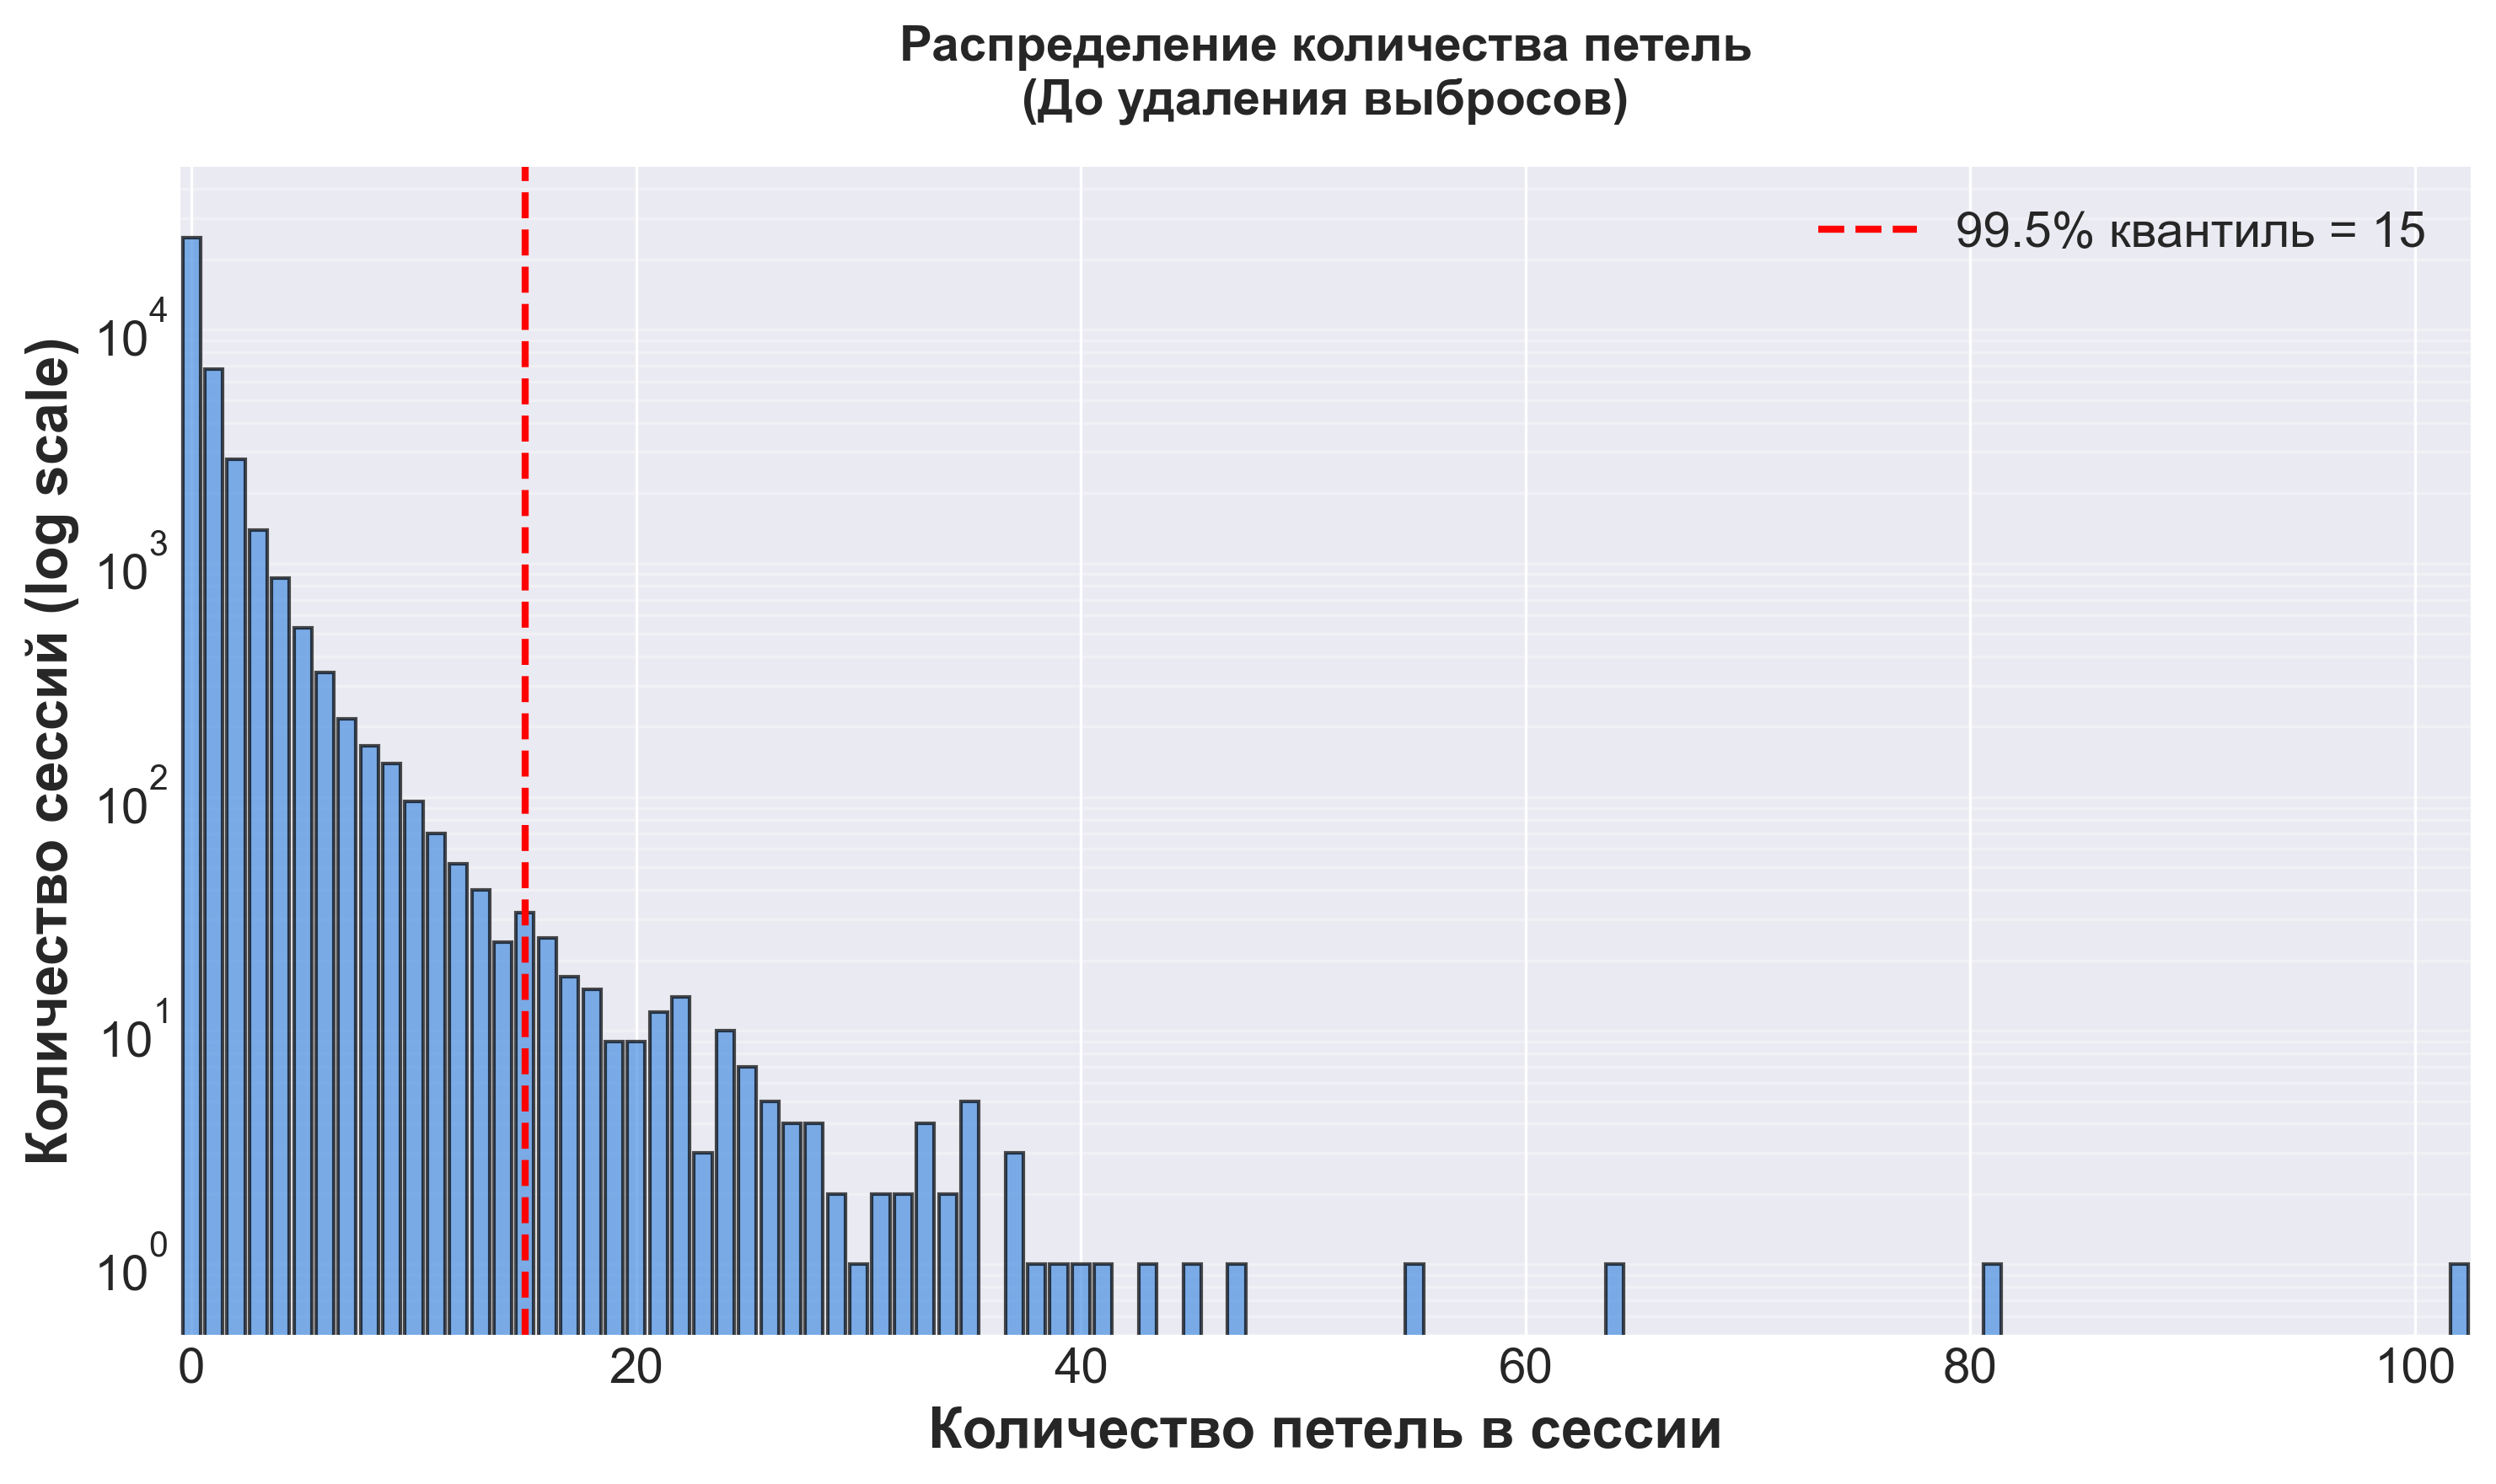

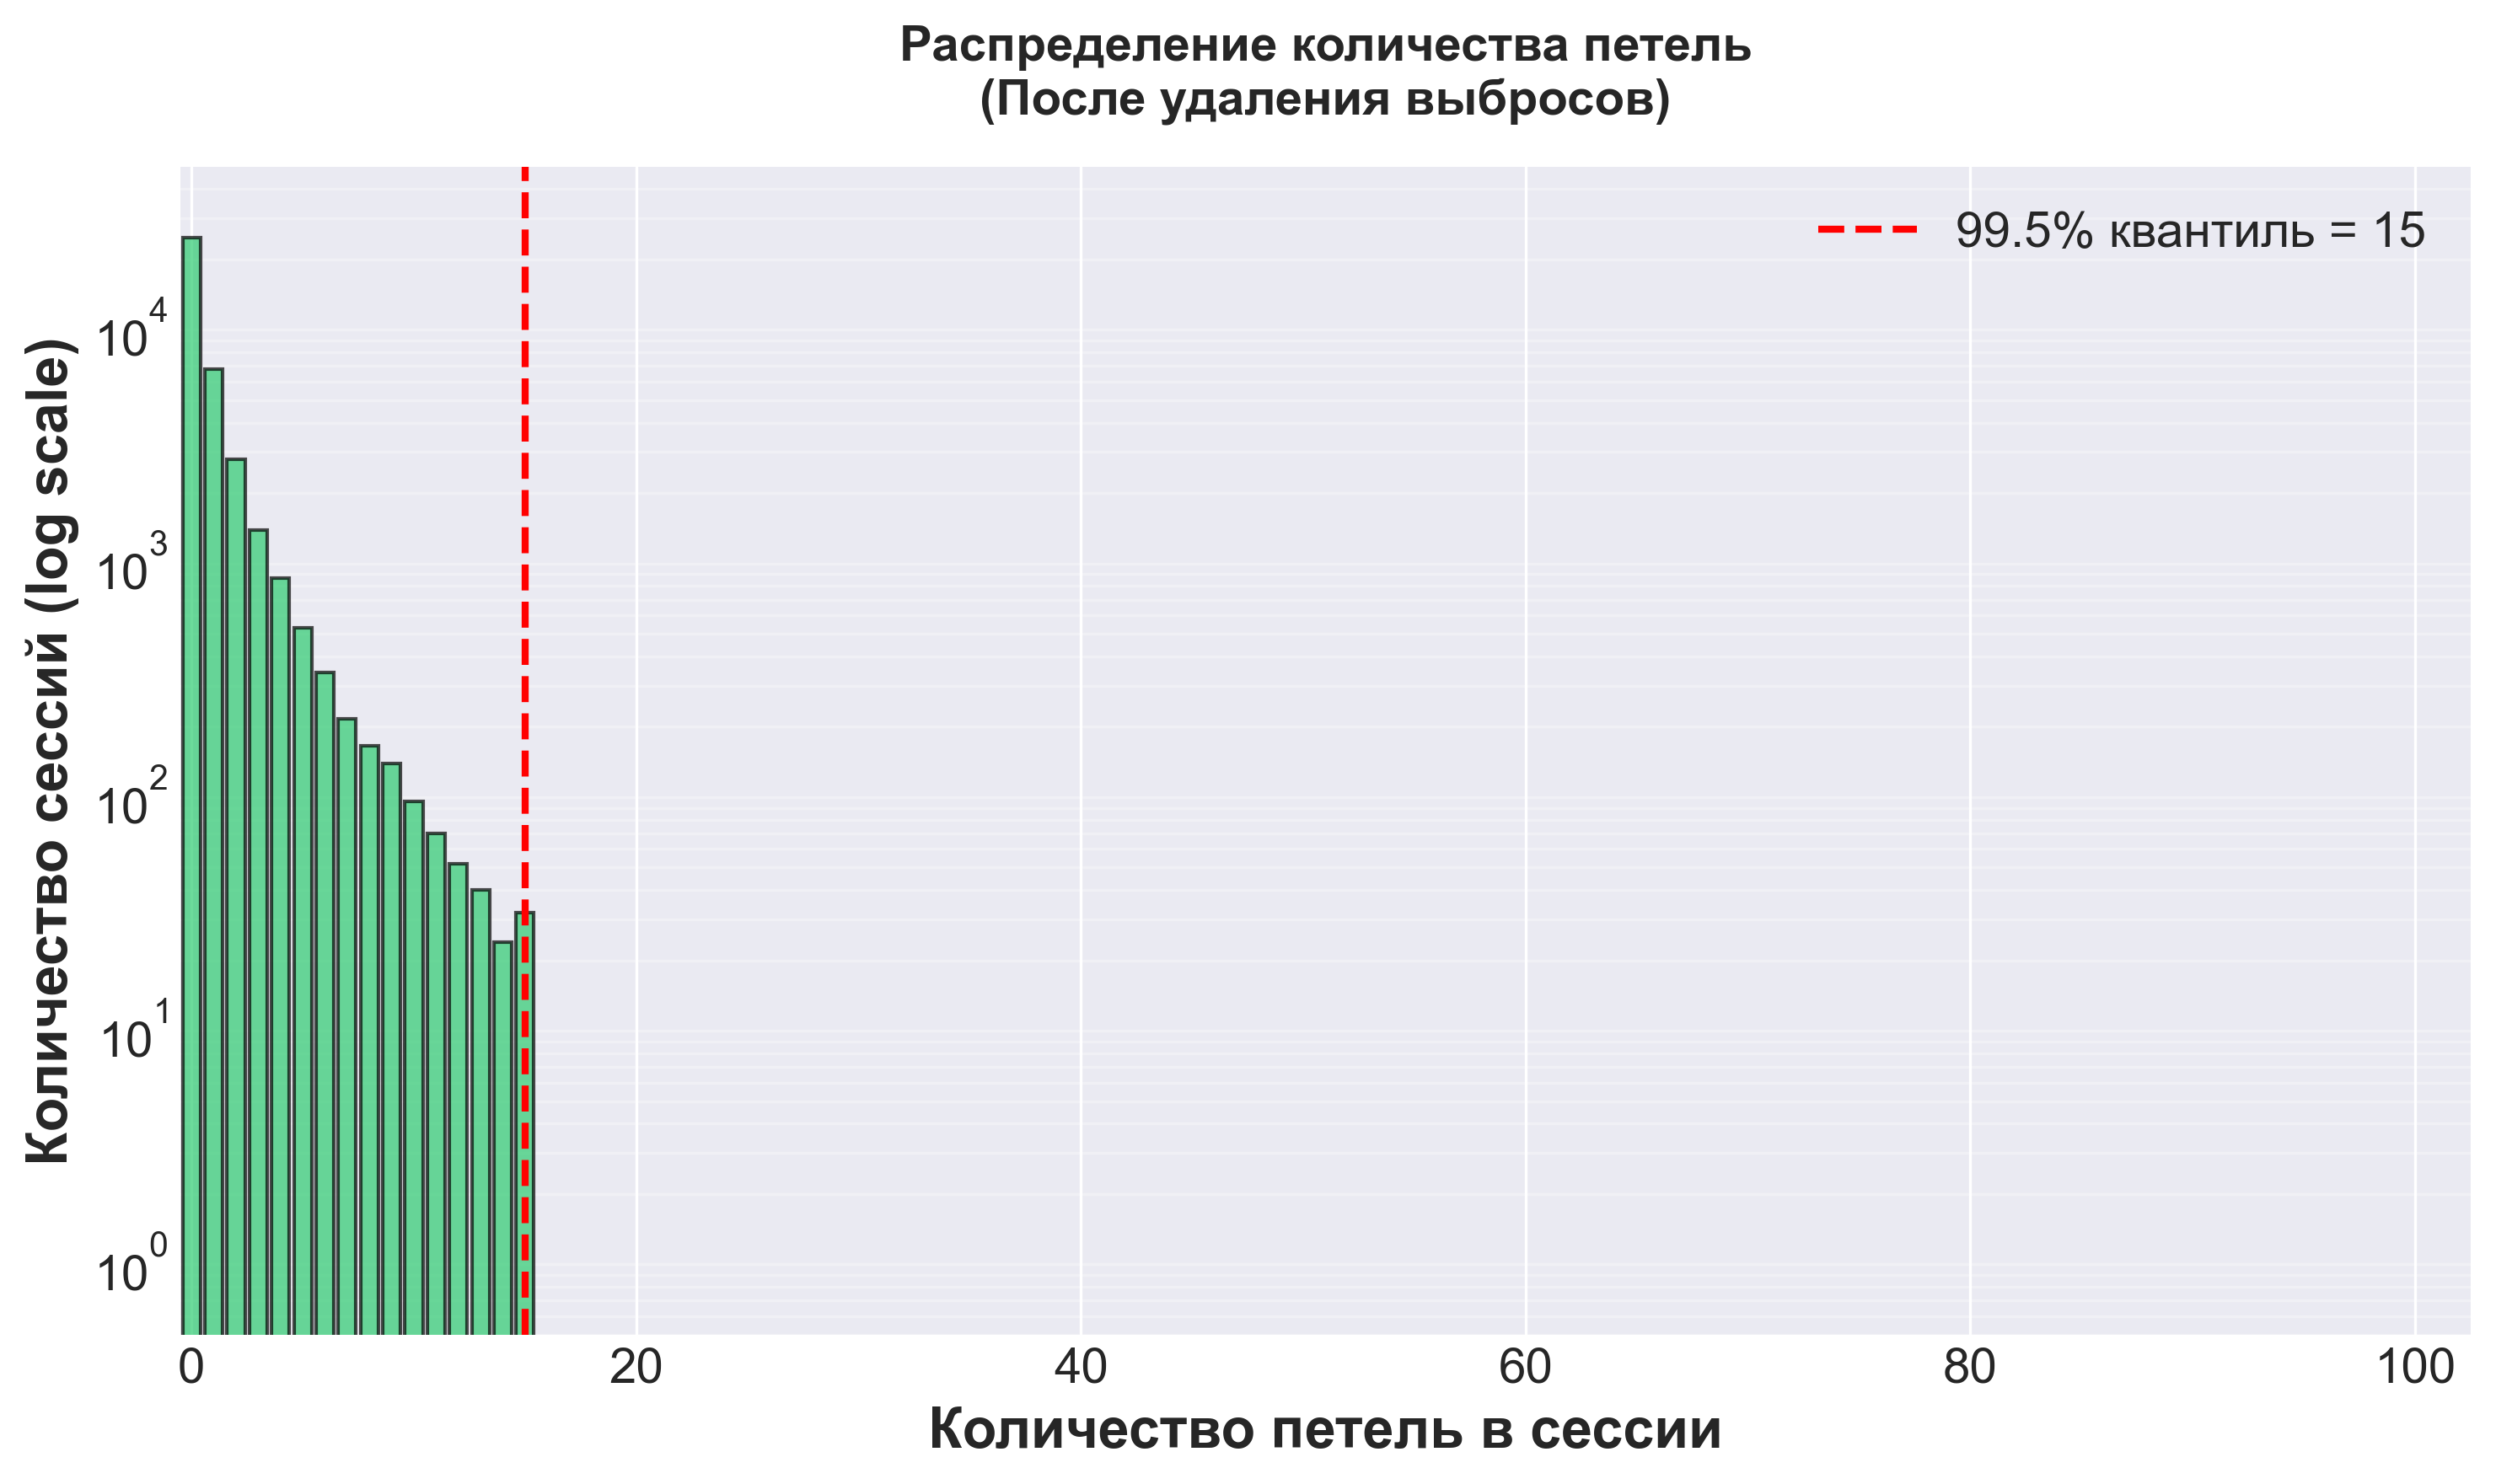

До удаления: всего сессий = 38,561
После удаления: всего сессий = 38,395
Граница удаления выбросов: 15 петель (99.5% квантиль)


In [6]:
# Гистограммы распределения количества петель до и после удаления выбросов

# Агрегируем по сессиям: берем уникальное значение loops_count для каждой сессии
before_sessions = df_before_loops_removal.groupby('session_id')['loops_count'].first()
after_sessions = df_after_loops_removal.groupby('session_id')['loops_count'].first()

# Подсчет количества сессий для каждого значения loops_count
before_counts = before_sessions.value_counts().sort_index()
after_counts = after_sessions.value_counts().sort_index()

# Определяем общие границы
max_loops = max(before_counts.index.max(), after_counts.index.max())
max_count = max(before_counts.max(), after_counts.max())

# График 1: До удаления выбросов
fig1, ax1 = plt.subplots(figsize=(10, 6))
x_before = before_counts.index
y_before = before_counts.values
ax1.bar(x_before, y_before, edgecolor='black', alpha=0.7, color='#4A90E2', width=0.8)
ax1.axvline(x=filt, color='red', linestyle='--', linewidth=2, 
            label=f'99.5% квантиль = {filt:.0f}')
ax1.set_xlabel('Количество петель в сессии', fontsize=16, fontweight='bold')
ax1.set_ylabel('Количество сессий (log scale)', fontsize=16, fontweight='bold')
ax1.set_title('Распределение количества петель\n(До удаления выбросов)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlim(-0.5, max_loops + 0.5)
ax1.set_yscale('log')
ax1.set_ylim(bottom=0.5, top=max_count * 2)
ax1.grid(True, alpha=0.3, axis='y', which='both')
ax1.legend(fontsize=14, loc='upper right', framealpha=0.9)
ax1.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.show()

# График 2: После удаления выбросов
fig2, ax2 = plt.subplots(figsize=(10, 6))
x_after = after_counts.index
y_after = after_counts.values
ax2.bar(x_after, y_after, edgecolor='black', alpha=0.7, color='#2ECC71', width=0.8)
ax2.axvline(x=filt, color='red', linestyle='--', linewidth=2, 
            label=f'99.5% квантиль = {filt:.0f}')
ax2.set_xlabel('Количество петель в сессии', fontsize=16, fontweight='bold')
ax2.set_ylabel('Количество сессий (log scale)', fontsize=16, fontweight='bold')
ax2.set_title('Распределение количества петель\n(После удаления выбросов)', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlim(-0.5, max_loops + 0.5)
ax2.set_yscale('log')
ax2.set_ylim(bottom=0.5, top=max_count * 2)
ax2.grid(True, alpha=0.3, axis='y', which='both')
ax2.legend(fontsize=14, loc='upper right', framealpha=0.9)
ax2.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.show()

print(f"До удаления: всего сессий = {len(before_sessions):,}")
print(f"После удаления: всего сессий = {len(after_sessions):,}")
print(f"Граница удаления выбросов: {filt:.0f} петель (99.5% квантиль)")


### 5.2. Удаление выбросов по аномальным юзерам (клиентам)


In [7]:
# Сохраняем данные до удаления выбросов по клиентам
df_before_clients_removal = df.copy()

# Удаление выбросов по количеству сессий на клиента (верхние 3% клиентов)
print("="*70)
print("УДАЛЕНИЕ ВЫБРОСОВ ПО КОЛИЧЕСТВУ СЕССИЙ НА КЛИЕНТА")
print("="*70)

initial_count_clients = len(df)
sessions_per_client = df.groupby('client_id')['session_id'].nunique().sort_values(ascending=False)
filt_clients = sessions_per_client.quantile(0.97)
print(f"97% квантиль количества сессий на клиента: {filt_clients:.0f}")

# Оставляем только клиентов с количеством сессий <= 97% квантиля
valid_clients = sessions_per_client[sessions_per_client <= filt_clients].index
df_after_clients_removal = df[df['client_id'].isin(valid_clients)].reset_index(drop=True)

final_count_clients = len(df_after_clients_removal)
removed_clients_count = initial_count_clients - final_count_clients
removed_clients_unique = len(sessions_per_client) - len(valid_clients)

print(f"Удалено клиентов: {removed_clients_unique} (с экстремально большим количеством сессий)")
print(f"Удалено записей по клиентам: {removed_clients_count} ({removed_clients_count/initial_count_clients*100:.2f}%)")
print(f"Осталось записей: {final_count_clients:,}")

# Обновляем df для дальнейшей обработки
df = df_after_clients_removal.copy()


УДАЛЕНИЕ ВЫБРОСОВ ПО КОЛИЧЕСТВУ СЕССИЙ НА КЛИЕНТА
97% квантиль количества сессий на клиента: 56
Удалено клиентов: 55 (с экстремально большим количеством сессий)
Удалено записей по клиентам: 28399 (12.37%)
Осталось записей: 201,165


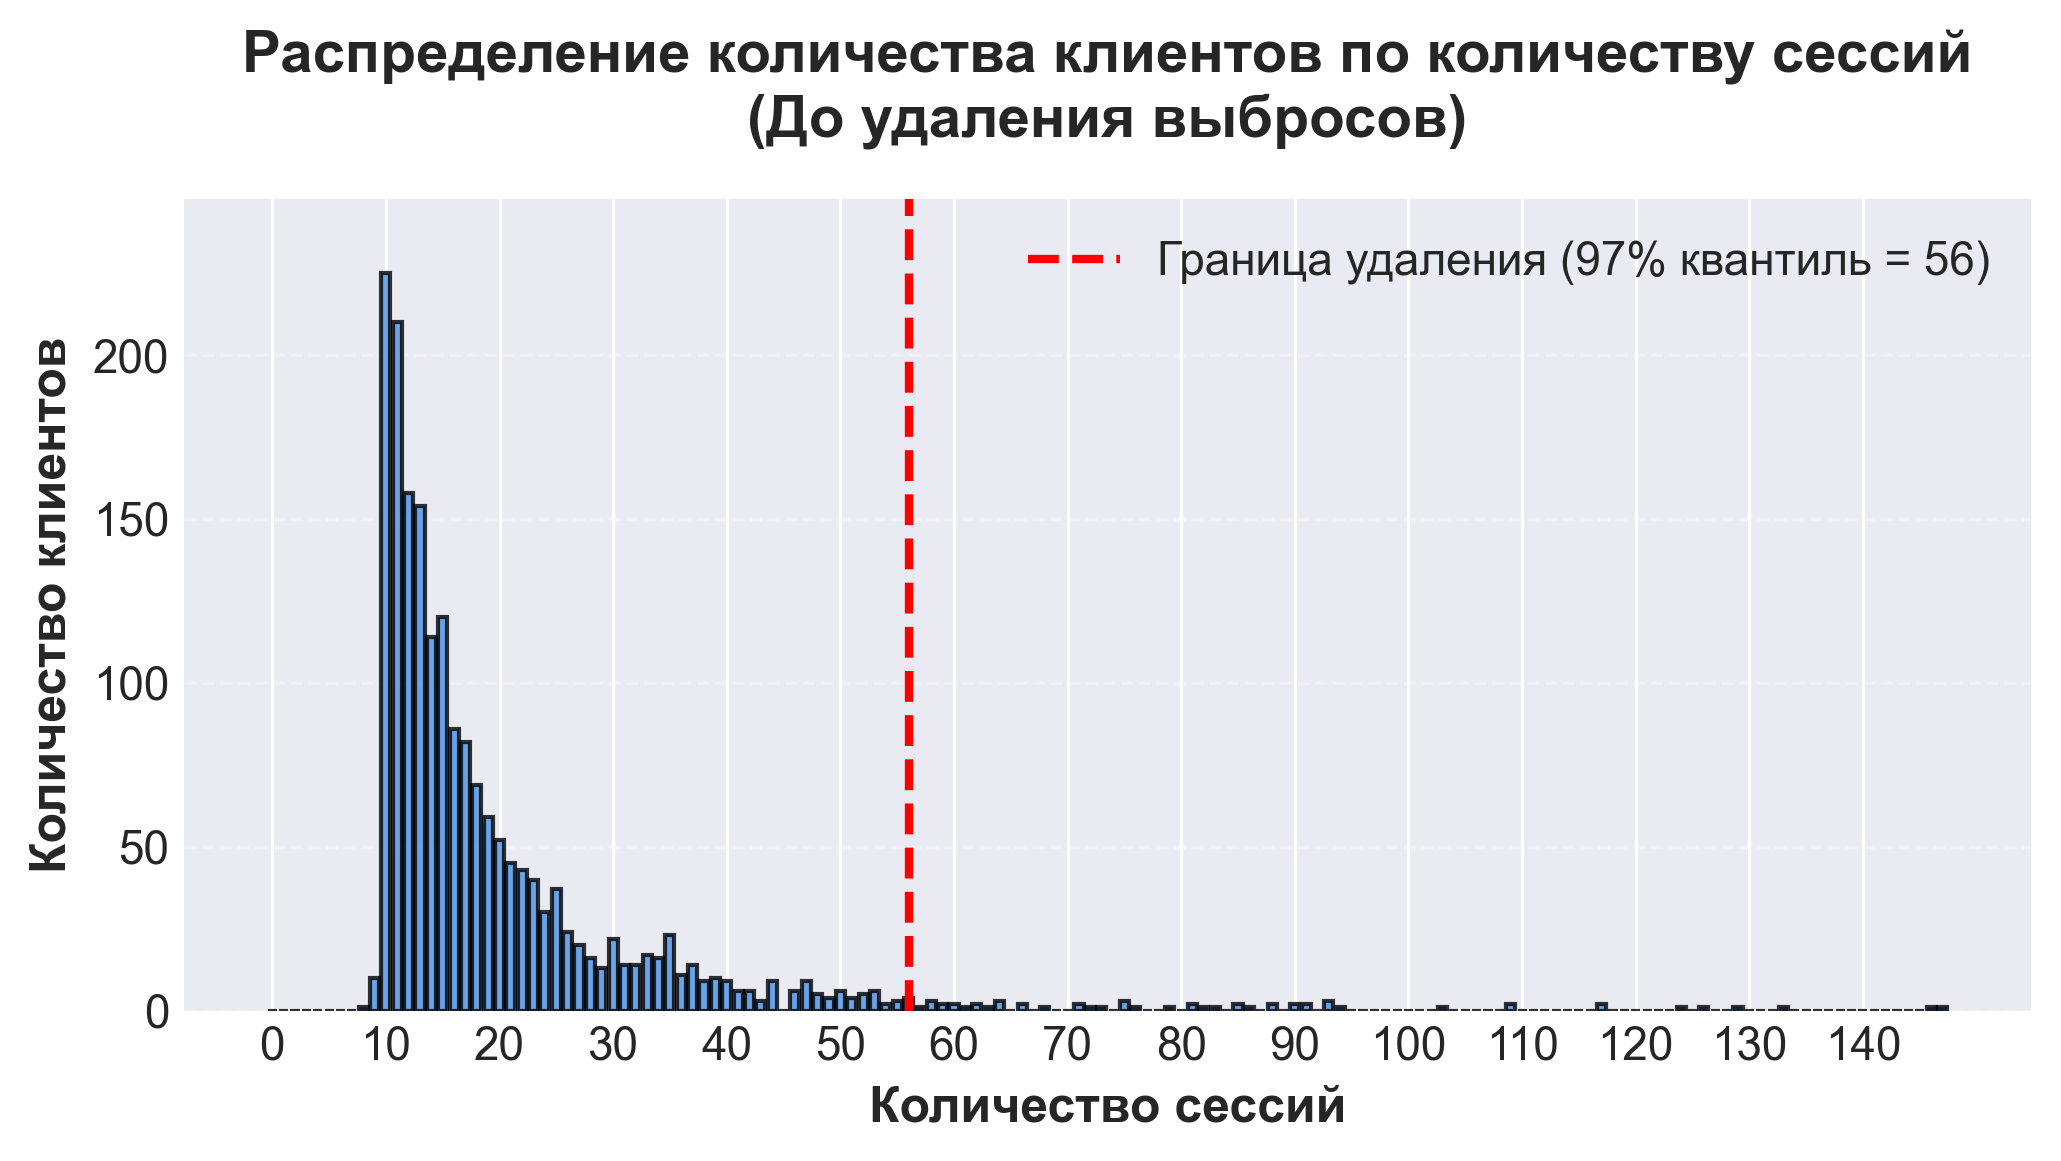

До удаления: всего клиентов = 1,900
Граница удаления выбросов: 56 сессий (97% квантиль)


In [8]:
# График распределения количества клиентов по количеству сессий ДО удаления выбросов
# Подсчет количества клиентов по количеству сессий
sessions_per_client_before = df_before_clients_removal.groupby('client_id')['session_id'].nunique()
sessions_per_client_after = df_after_clients_removal.groupby('client_id')['session_id'].nunique()

# Определяем границу фильтрации (97% квантиль)
filt_clients = sessions_per_client_before.quantile(0.97)

# Подсчет распределения: количество клиентов с определенным количеством сессий
before_counts = sessions_per_client_before.value_counts().sort_index()
after_counts = sessions_per_client_after.value_counts().sort_index()

# Определяем общие границы для синхронизации шкал
max_sessions = max(int(before_counts.index.max()), int(after_counts.index.max()))
max_value = max(before_counts.max(), after_counts.max())
min_value = min(before_counts.min(), after_counts.min())

# График 1: До удаления выбросов
all_sessions = range(max_sessions + 1)
before_values = [before_counts.get(i, 0) for i in all_sessions]
x = np.arange(len(all_sessions))

fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(x, before_values, color='#4A90E2', alpha=0.8, edgecolor='black')
ax.set_ylim(bottom=0, top=max_value * 1.1)
ax.set_xlabel('Количество сессий', fontsize=12, fontweight='bold')
ax.set_ylabel('Количество клиентов', fontsize=12, fontweight='bold')
ax.set_title('Распределение количества клиентов по количеству сессий\n(До удаления выбросов)', 
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, which='both', linestyle='--', axis='y')

# Добавляем вертикальную линию, показывающую границу удаления выбросов
ax.axvline(x=filt_clients, color='red', linestyle='--', linewidth=2, label=f'Граница удаления (97% квантиль = {filt_clients:.0f})')
ax.legend(fontsize=11, loc='upper right', framealpha=0.9)

# Настройка меток оси X - показываем каждые 10 значений
ax.set_xticks(x[::10])
ax.set_xticklabels([all_sessions[i] for i in range(0, len(all_sessions), 10)], fontsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()

print(f"До удаления: всего клиентов = {len(sessions_per_client_before):,}")
print(f"Граница удаления выбросов: {filt_clients:.0f} сессий (97% квантиль)")


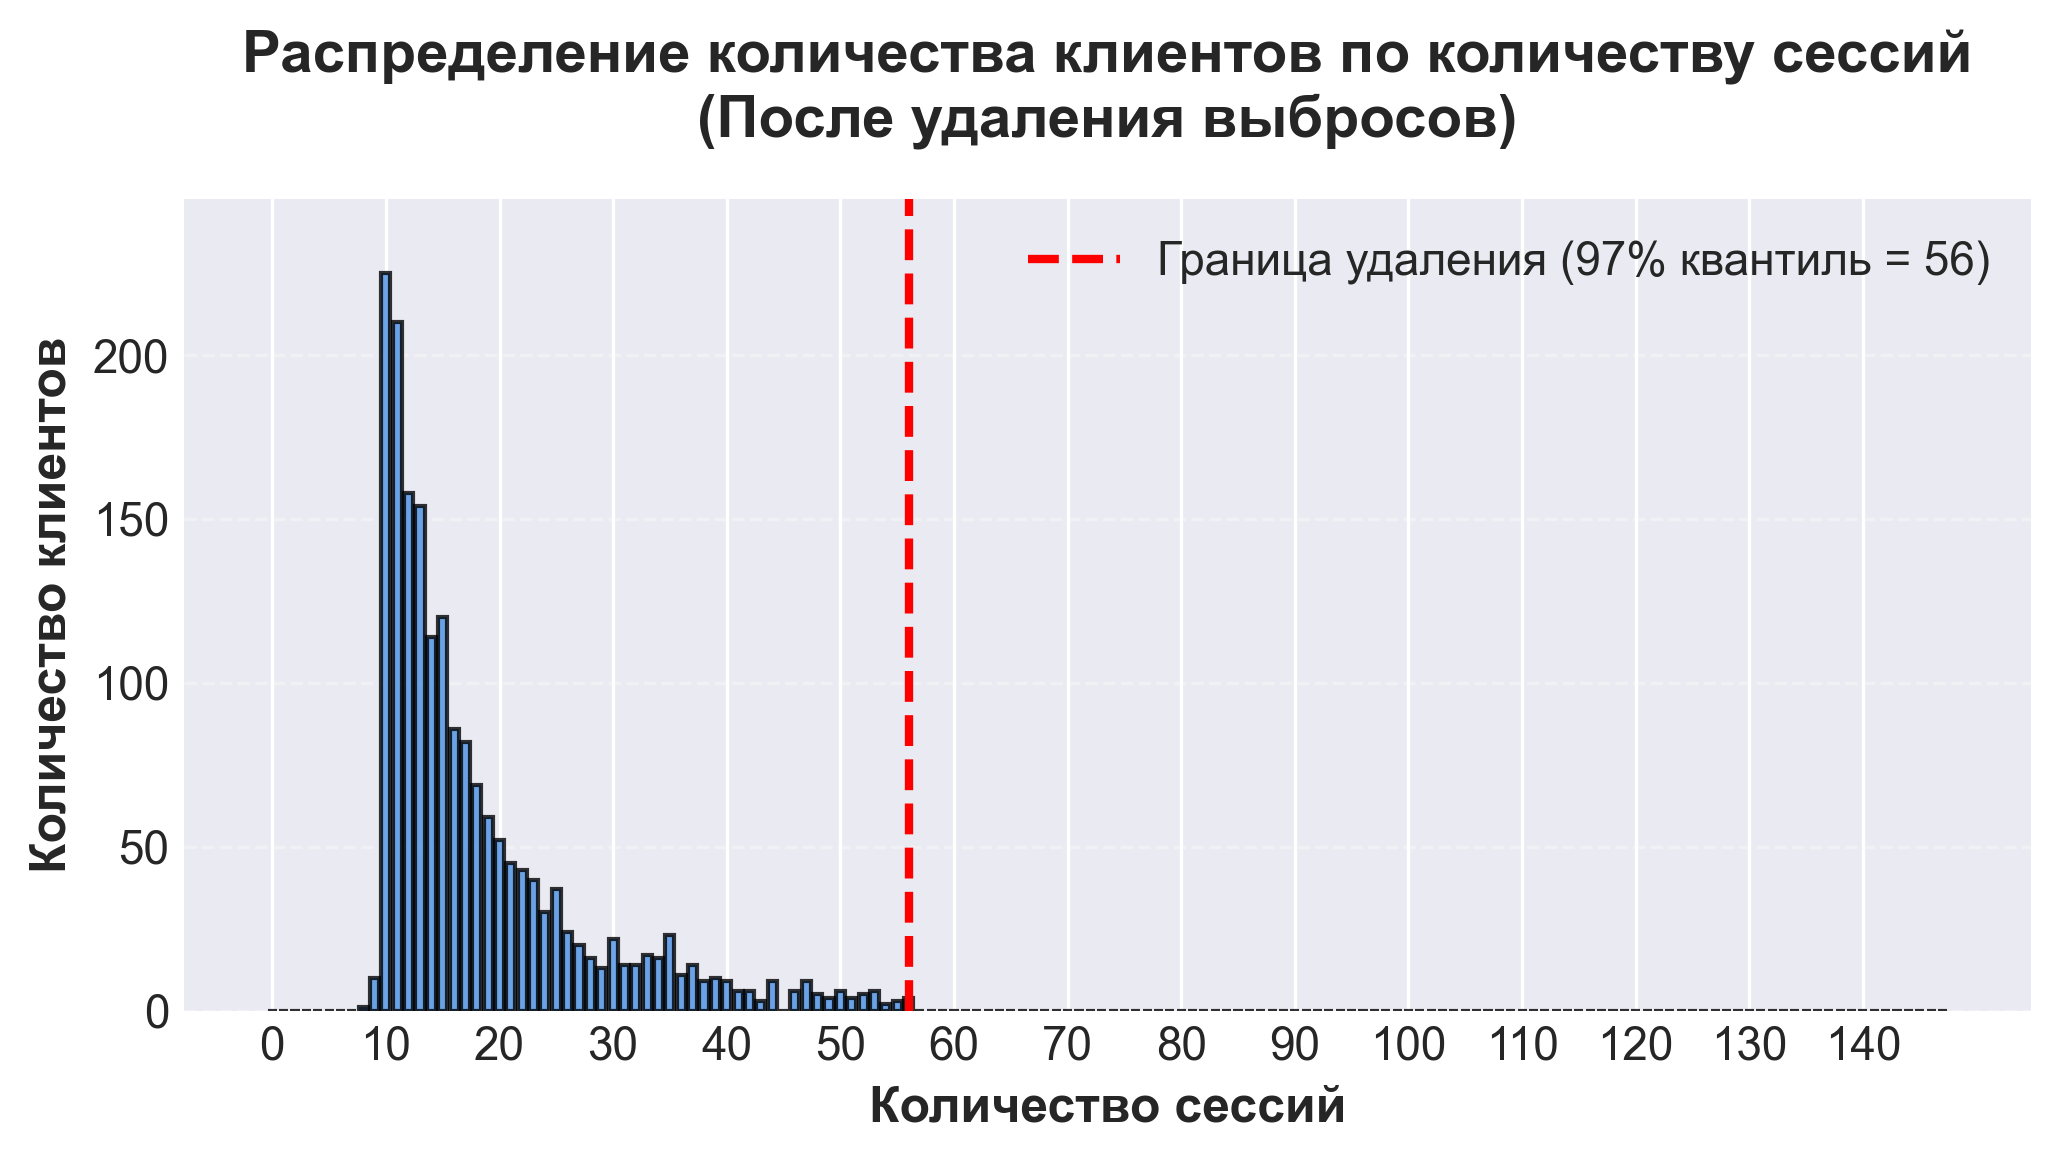

После удаления: всего клиентов = 1,845
Граница удаления выбросов: 56 сессий (97% квантиль)


In [9]:
# График распределения количества клиентов по количеству сессий ПОСЛЕ удаления выбросов
# Подсчет количества клиентов по количеству сессий
sessions_per_client_before = df_before_clients_removal.groupby('client_id')['session_id'].nunique()
sessions_per_client_after = df_after_clients_removal.groupby('client_id')['session_id'].nunique()

# Определяем границу фильтрации (97% квантиль)
filt_clients = sessions_per_client_before.quantile(0.97)

# Подсчет распределения: количество клиентов с определенным количеством сессий
before_counts = sessions_per_client_before.value_counts().sort_index()
after_counts = sessions_per_client_after.value_counts().sort_index()

# Определяем общие границы для синхронизации шкал (те же, что и в предыдущем графике)
max_sessions = max(int(before_counts.index.max()), int(after_counts.index.max()))
max_value = max(before_counts.max(), after_counts.max())
min_value = min(before_counts.min(), after_counts.min())

# График: После удаления выбросов
all_sessions = range(max_sessions + 1)
after_values = [after_counts.get(i, 0) for i in all_sessions]
x = np.arange(len(all_sessions))

fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(x, after_values, color='#4A90E2', alpha=0.8, edgecolor='black')
ax.set_ylim(bottom=0, top=max_value * 1.1)
ax.set_xlabel('Количество сессий', fontsize=12, fontweight='bold')
ax.set_ylabel('Количество клиентов', fontsize=12, fontweight='bold')
ax.set_title('Распределение количества клиентов по количеству сессий\n(После удаления выбросов)', 
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, which='both', linestyle='--', axis='y')

# Добавляем вертикальную линию, показывающую границу удаления выбросов
ax.axvline(x=filt_clients, color='red', linestyle='--', linewidth=2, label=f'Граница удаления (97% квантиль = {filt_clients:.0f})')
ax.legend(fontsize=11, loc='upper right', framealpha=0.9)

# Настройка меток оси X - показываем каждые 10 значений
ax.set_xticks(x[::10])
ax.set_xticklabels([all_sessions[i] for i in range(0, len(all_sessions), 10)], fontsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()

print(f"После удаления: всего клиентов = {len(sessions_per_client_after):,}")
print(f"Граница удаления выбросов: {filt_clients:.0f} сессий (97% квантиль)")


## 6. Описательная статистика


In [10]:
# Основная информация о данных
print("="*70)
print("ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print("="*70)
print(f"\nКоличество строк: {len(df):,}")
print(f"Количество столбцов: {len(df.columns)}")
print(f"Количество уникальных сессий: {df['session_id'].nunique():,}")
print(f"Количество уникальных клиентов: {df['client_id'].nunique():,}")
print(f"\nПериод данных:")
print(f"  Начало: {df['session_start_dt'].min()}")
print(f"  Конец: {df['session_start_dt'].max()}")

# Статистика по количественным переменным
print("\n" + "="*70)
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ")
print("="*70)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe())


ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ

Количество строк: 201,165
Количество столбцов: 26
Количество уникальных сессий: 33,765
Количество уникальных клиентов: 1,845

Период данных:
  Начало: 2025-01-01 00:00:00
  Конец: 2025-09-30 00:00:00

ОПИСАТЕЛЬНАЯ СТАТИСТИКА КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ
       client_start_year  client_avia_user_start_year  client_segment  \
count         201120.000                   201165.000      201165.000   
mean            2019.869                     2024.316           3.225   
std                3.124                        0.726           1.232   
min             2007.000                     2019.000           1.000   
25%             2018.000                     2024.000           2.000   
50%             2020.000                     2024.000           4.000   
75%             2022.000                     2025.000           4.000   
max             2025.000                     2025.000           6.000   

       client_avia_orders  client_gmv  session_purchase_price

In [11]:
# Статистика по категориальным переменным
print("="*70)
print("СТАТИСТИКА ПО КАТЕГОРИАЛЬНЫМ ПЕРЕМЕННЫМ")
print("="*70)

print("\nРаспределение по экранам:")
print(df['screen_nm'].value_counts())

print("\nРаспределение по статусу покупки:")
print(df['session_purchase_status'].value_counts())

print("\nРаспределение по сегментам клиентов:")
print(df['client_segment'].value_counts())

print("\nРаспределение по платформам:")
print(df['device_platform'].value_counts())


СТАТИСТИКА ПО КАТЕГОРИАЛЬНЫМ ПЕРЕМЕННЫМ

Распределение по экранам:
screen_nm
Выдача           89581
Поиск            50521
Оффер            42518
Чекаут           13647
Покупка бэк       2613
Покупка фронт     2285
Name: count, dtype: int64

Распределение по статусу покупки:
session_purchase_status
Успешные    2455
Name: count, dtype: int64

Распределение по сегментам клиентов:
client_segment
2    74223
4    70274
5    27573
3    18003
1     7843
6     3249
Name: count, dtype: int64

Распределение по платформам:
device_platform
ios        110885
android     89862
ubuntu        207
Name: count, dtype: int64


## 7. Анализ распределений


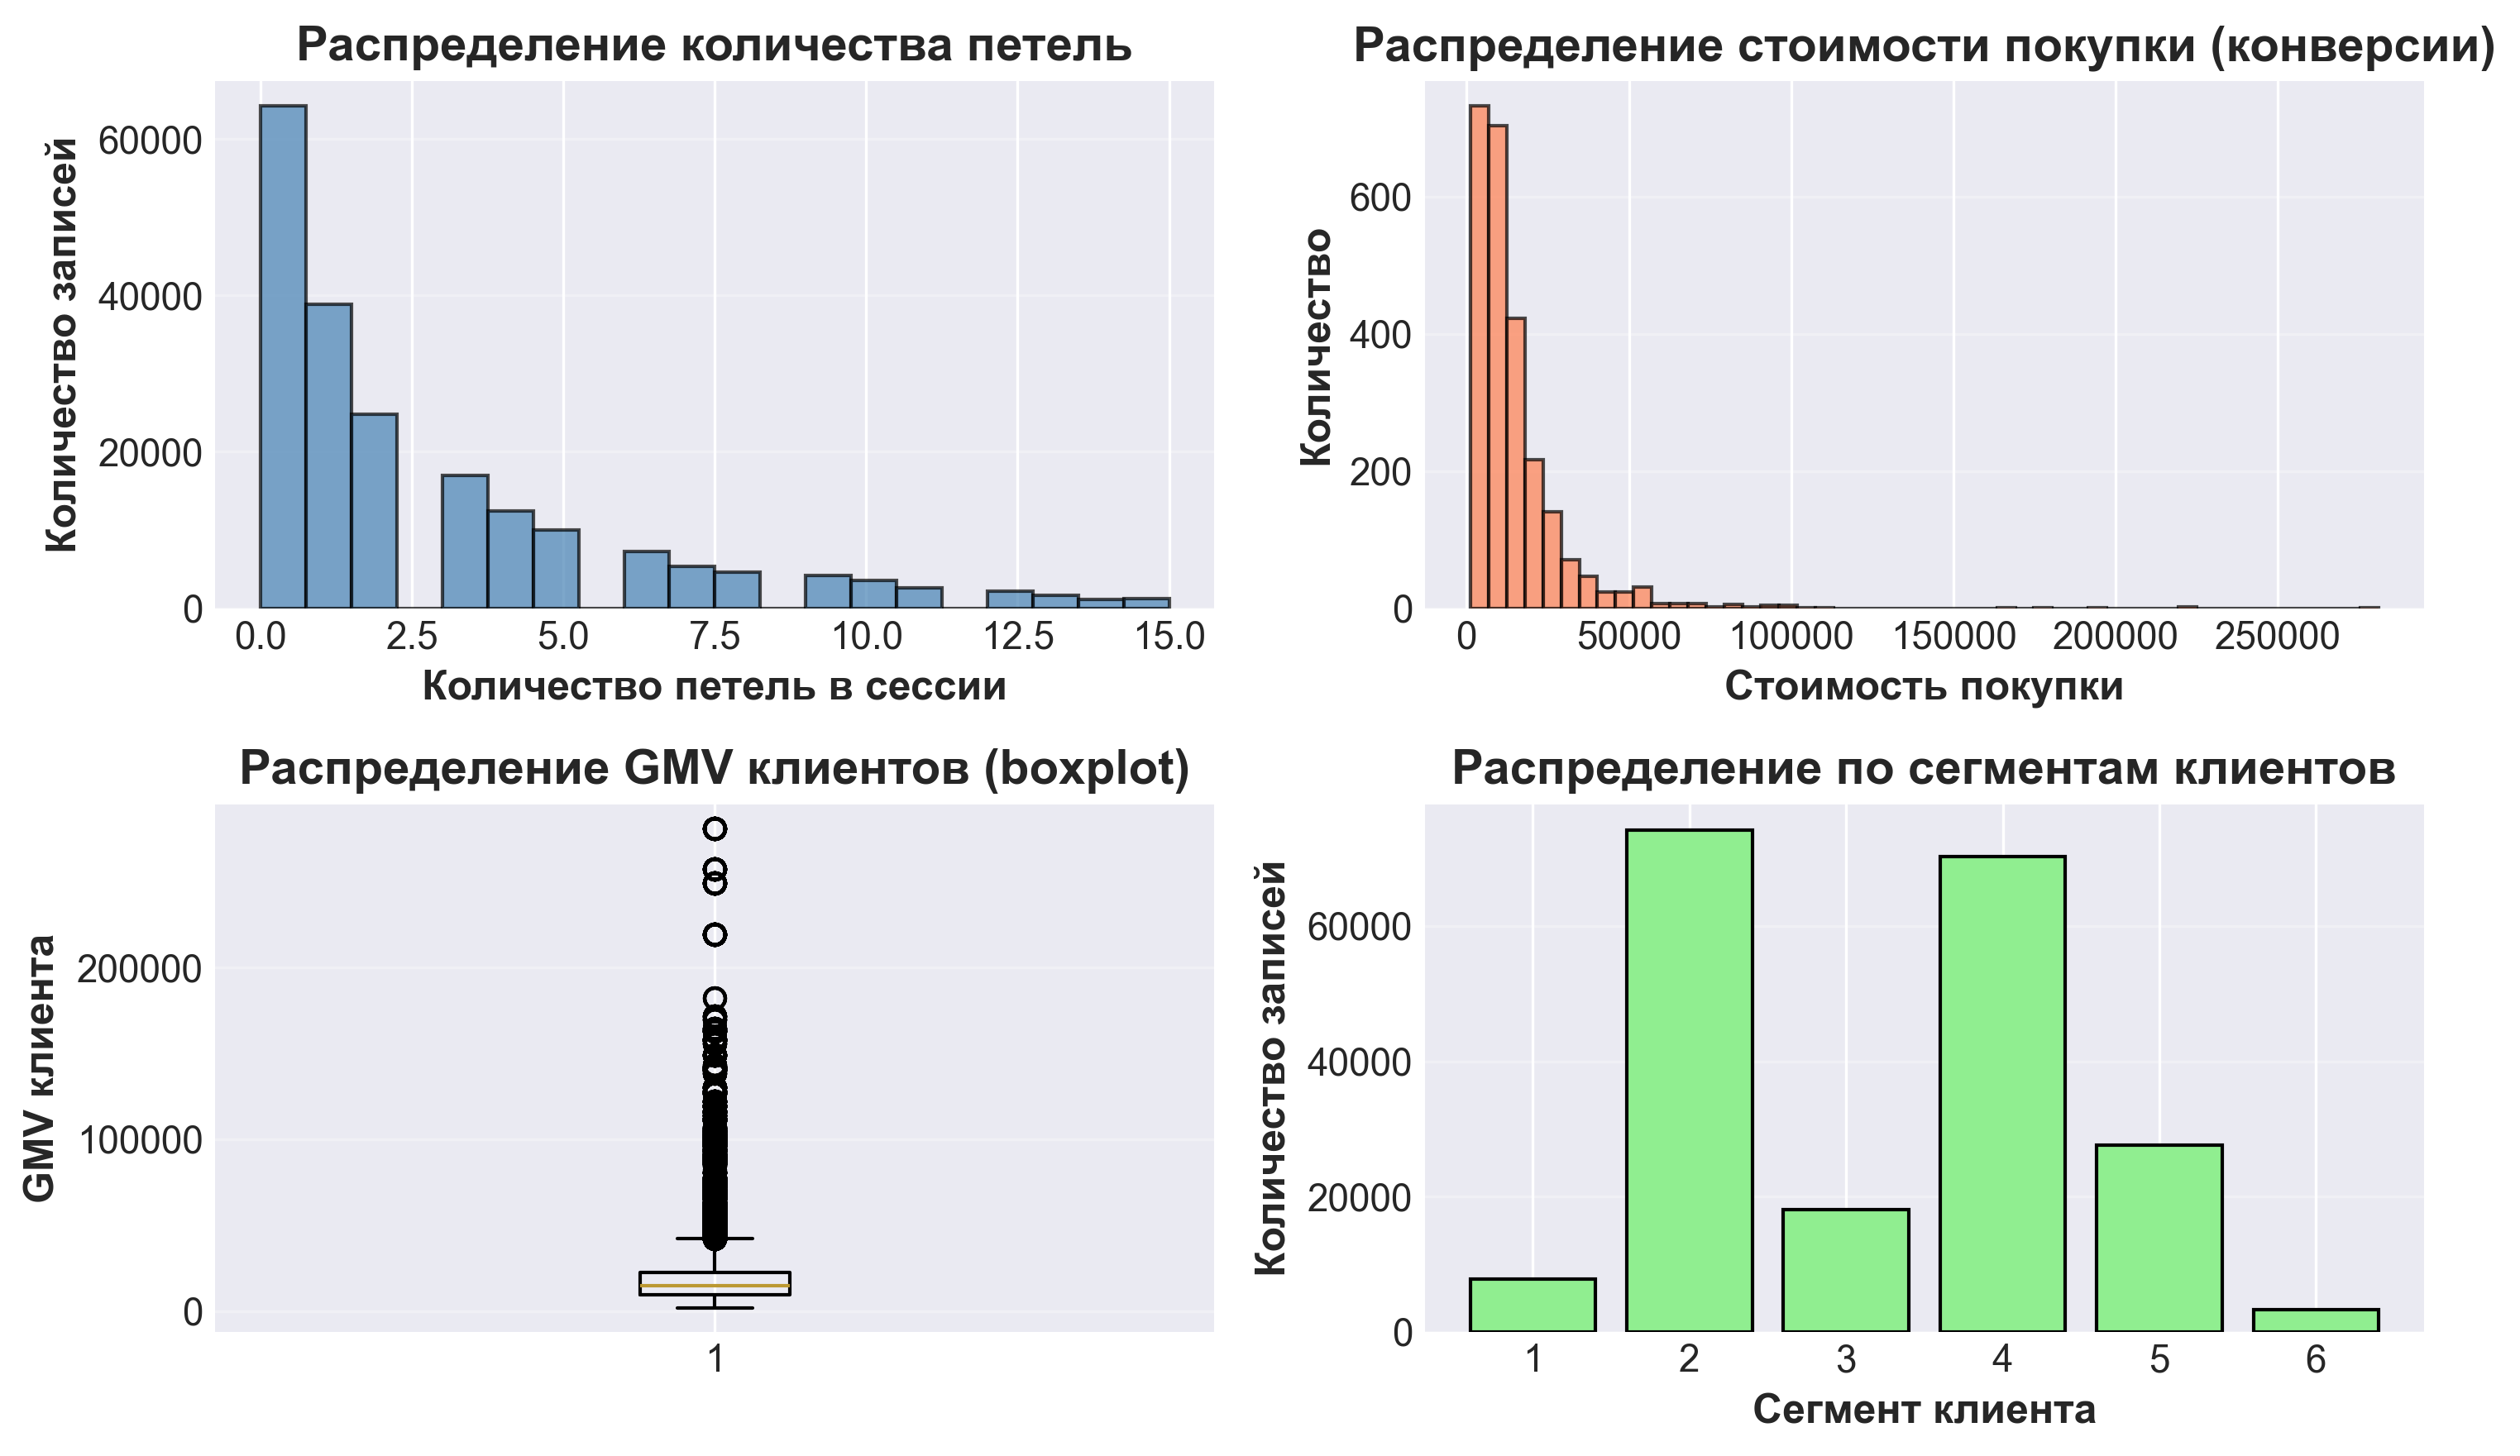

In [12]:
# Распределение количества петель
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# График 1: Гистограмма количества петель
axes[0, 0].hist(df['loops_count'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Количество петель в сессии', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Количество записей', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Распределение количества петель', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='both', labelsize=11)

# График 2: Распределение стоимости покупки (только для конверсий)
converted_data = df[df['conversion'] == 1]
if len(converted_data) > 0:
    axes[0, 1].hist(converted_data['session_purchase_price'], bins=50, edgecolor='black', alpha=0.7, color='coral')
    axes[0, 1].set_xlabel('Стоимость покупки', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Количество', fontsize=12, fontweight='bold')
    axes[0, 1].set_title('Распределение стоимости покупки (конверсии)', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    axes[0, 1].tick_params(axis='both', labelsize=11)

# График 3: Распределение GMV клиентов
axes[1, 0].boxplot(df['client_gmv'].dropna())
axes[1, 0].set_ylabel('GMV клиента', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Распределение GMV клиентов (boxplot)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='both', labelsize=11)

# График 4: Распределение сессий по сегментам клиентов
segment_counts = df['client_segment'].value_counts().sort_index()
axes[1, 1].bar(segment_counts.index.astype(str), segment_counts.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_xlabel('Сегмент клиента', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Количество записей', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Распределение по сегментам клиентов', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='both', labelsize=11)

plt.tight_layout()
plt.show()


## 8. Анализ конверсий


In [13]:
# Агрегация по сессиям
session_level = df.groupby('session_id').agg({
    'loops_count': 'first',
    'conversion': 'max',
    'session_purchase_status': lambda x: (x == 'Успешные').any(),
    'session_purchase_price': 'max',
    'client_segment': 'first',
    'client_gmv': 'first',
    'device_platform': 'first',
    'session_start_dt': 'first'
}).reset_index()

session_level['converted'] = session_level['conversion'].astype(int)

print("="*70)
print("АНАЛИЗ КОНВЕРСИЙ")
print("="*70)
print(f"\nОбщая конверсия: {session_level['converted'].mean()*100:.2f}%")
print(f"Количество сессий с конверсией: {session_level['converted'].sum():,}")
print(f"Всего сессий: {len(session_level):,}")

# Конверсия по количеству петель
print("\n" + "="*70)
print("КОНВЕРСИЯ ПО КОЛИЧЕСТВУ ПЕТЕЛЬ")
print("="*70)
conversion_by_loops = session_level.groupby('loops_count')['converted'].agg(['mean', 'count']).reset_index()
conversion_by_loops.columns = ['loops_count', 'conversion_rate', 'count']
conversion_by_loops['conversion_pct'] = conversion_by_loops['conversion_rate'] * 100

print(conversion_by_loops.to_string(index=False))


АНАЛИЗ КОНВЕРСИЙ

Общая конверсия: 6.60%
Количество сессий с конверсией: 2,227
Всего сессий: 33,765

КОНВЕРСИЯ ПО КОЛИЧЕСТВУ ПЕТЕЛЬ
 loops_count  conversion_rate  count  conversion_pct
           0            0.016  21970           1.575
           1            0.073   5937           7.293
           2            0.162   2427          16.193
           3            0.219   1217          21.857
           4            0.288    722          28.809
           5            0.363    463          36.285
           6            0.395    296          39.527
           7            0.356    191          35.602
           8            0.432    146          43.151
           9            0.429    119          42.857
          10            0.461     89          46.067
          11            0.413     63          41.270
          12            0.370     46          36.957
          13            0.389     36          38.889
          14            0.350     20          35.000
          15        

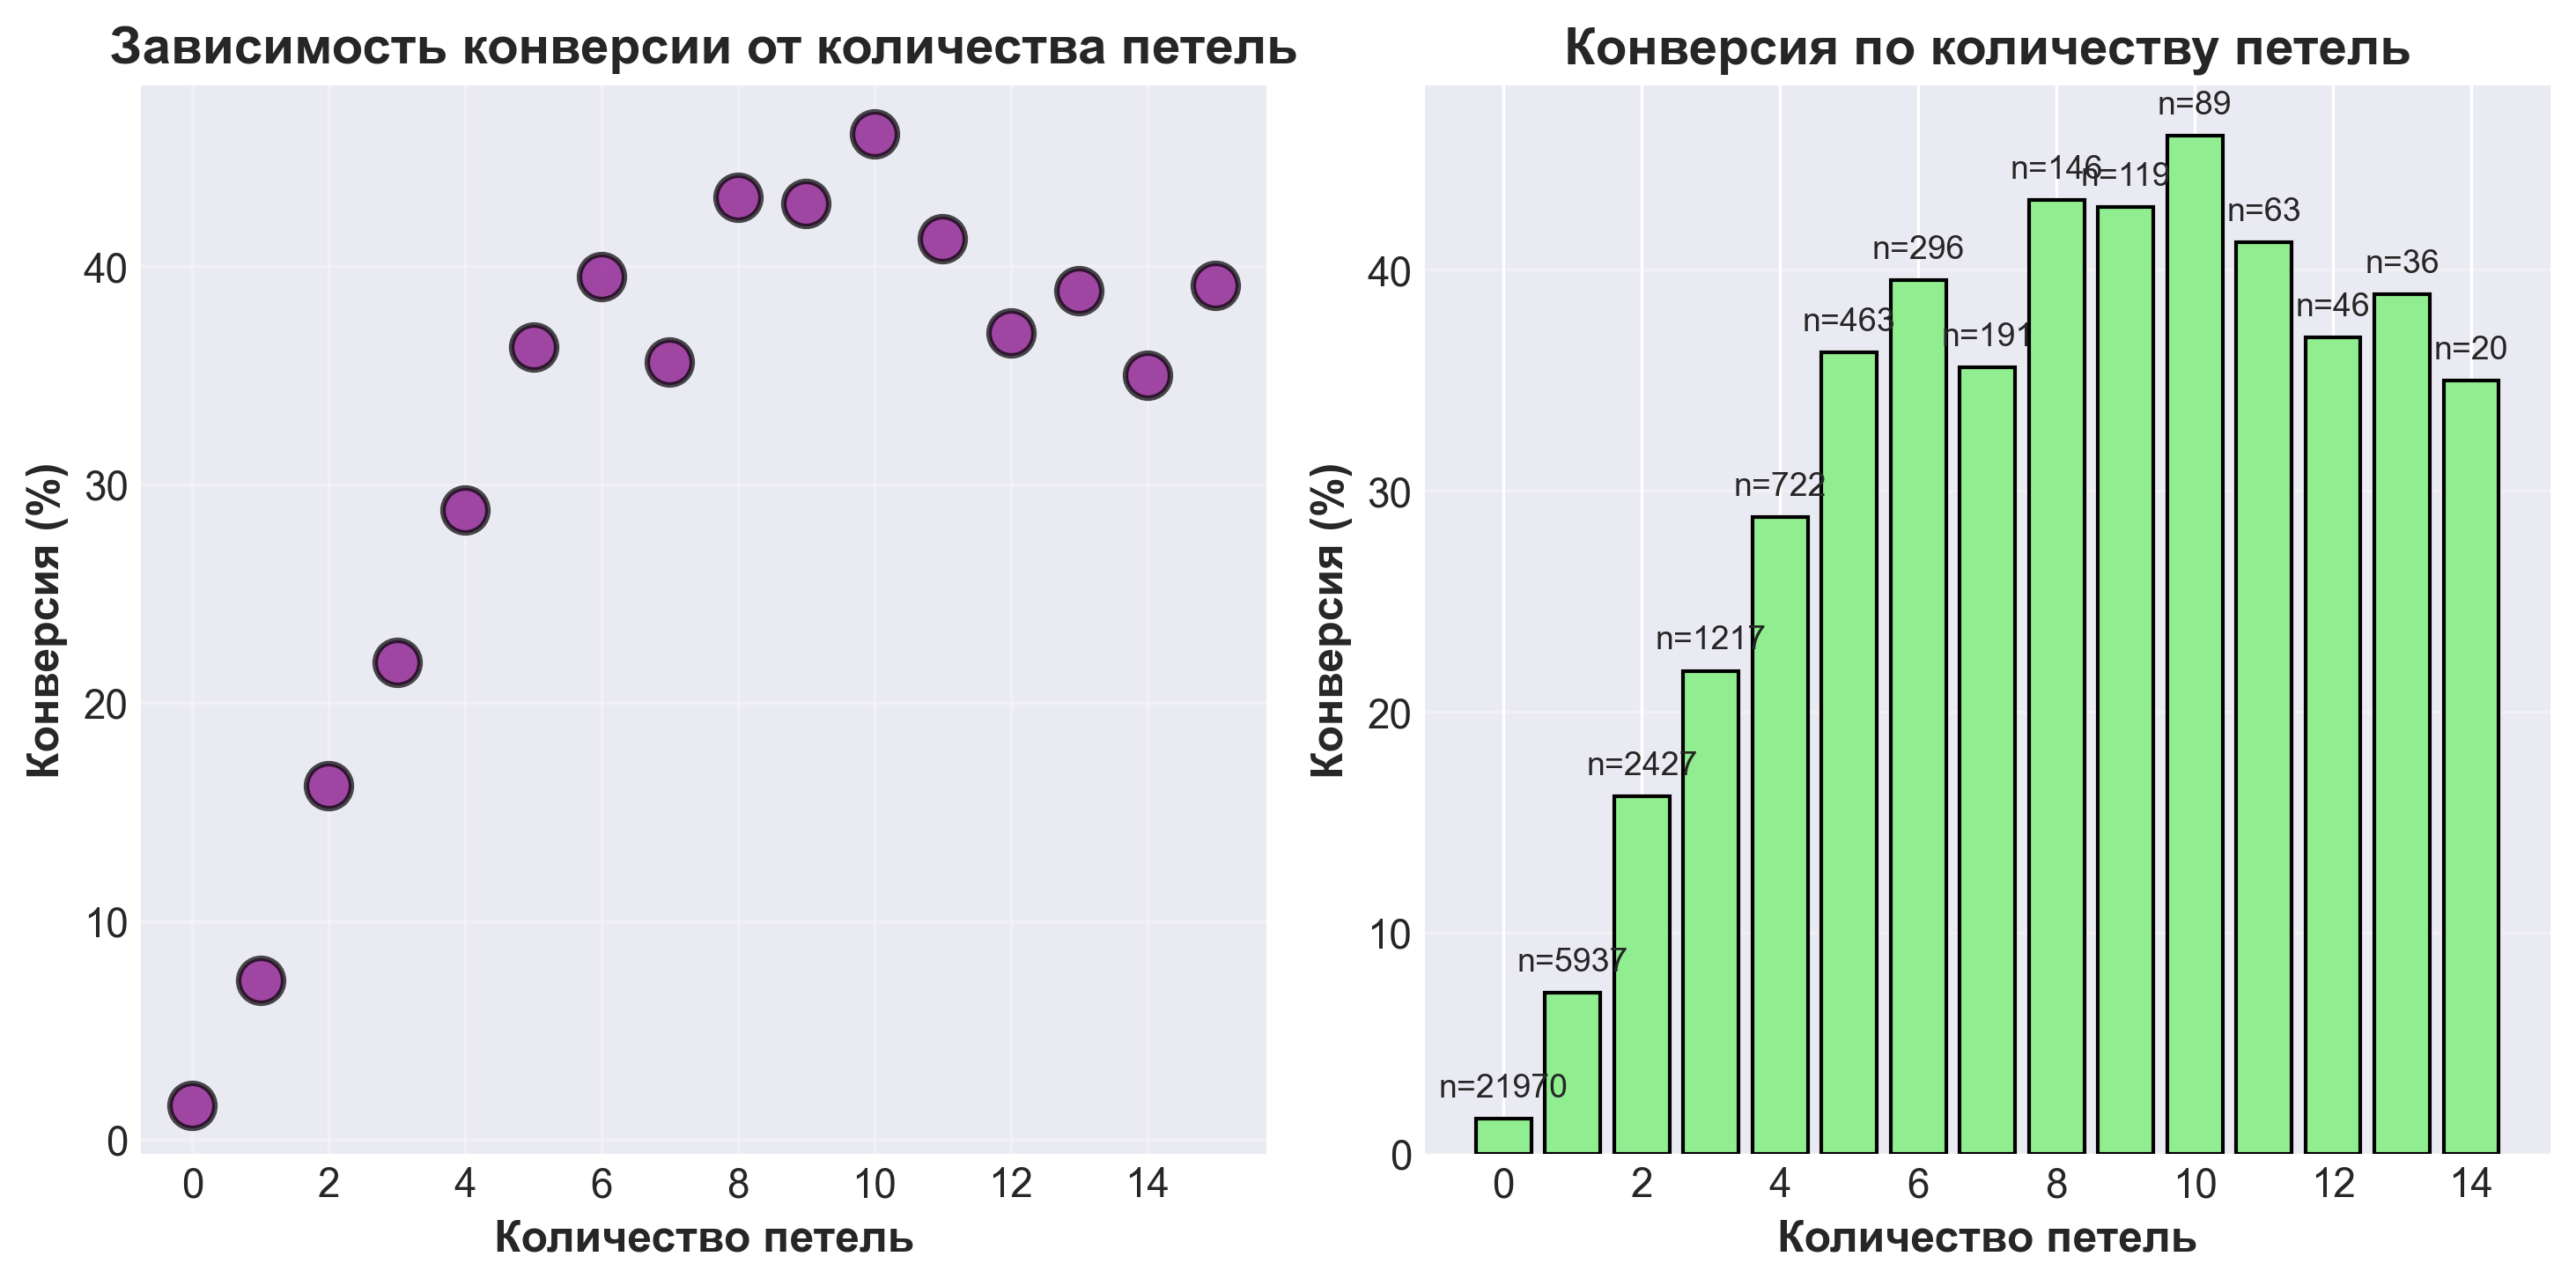

In [14]:
# Визуализация конверсии по количеству петель
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# График 1: Конверсия по количеству петель (scatter)
axes[0].scatter(conversion_by_loops['loops_count'], conversion_by_loops['conversion_pct'], 
               s=150, alpha=0.7, edgecolors='black', linewidth=1.5, color='purple')
axes[0].set_xlabel('Количество петель', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Конверсия (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Зависимость конверсии от количества петель', 
                 fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='both', labelsize=11)

# График 2: Конверсия по количеству петель (bar chart)
if len(conversion_by_loops) > 0:
    top_loops = conversion_by_loops.head(15)
    bars = axes[1].bar(top_loops['loops_count'], top_loops['conversion_pct'], 
                      color='lightgreen', edgecolor='black')
    axes[1].set_xlabel('Количество петель', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Конверсия (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Конверсия по количеству петель', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    axes[1].tick_params(axis='both', labelsize=11)
    
    # Добавляем подписи n над столбцами
    for i, row in top_loops.iterrows():
        axes[1].text(row['loops_count'], row['conversion_pct'] + 1, 
                    f"n={int(row['count'])}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## 9. Анализ временных трендов


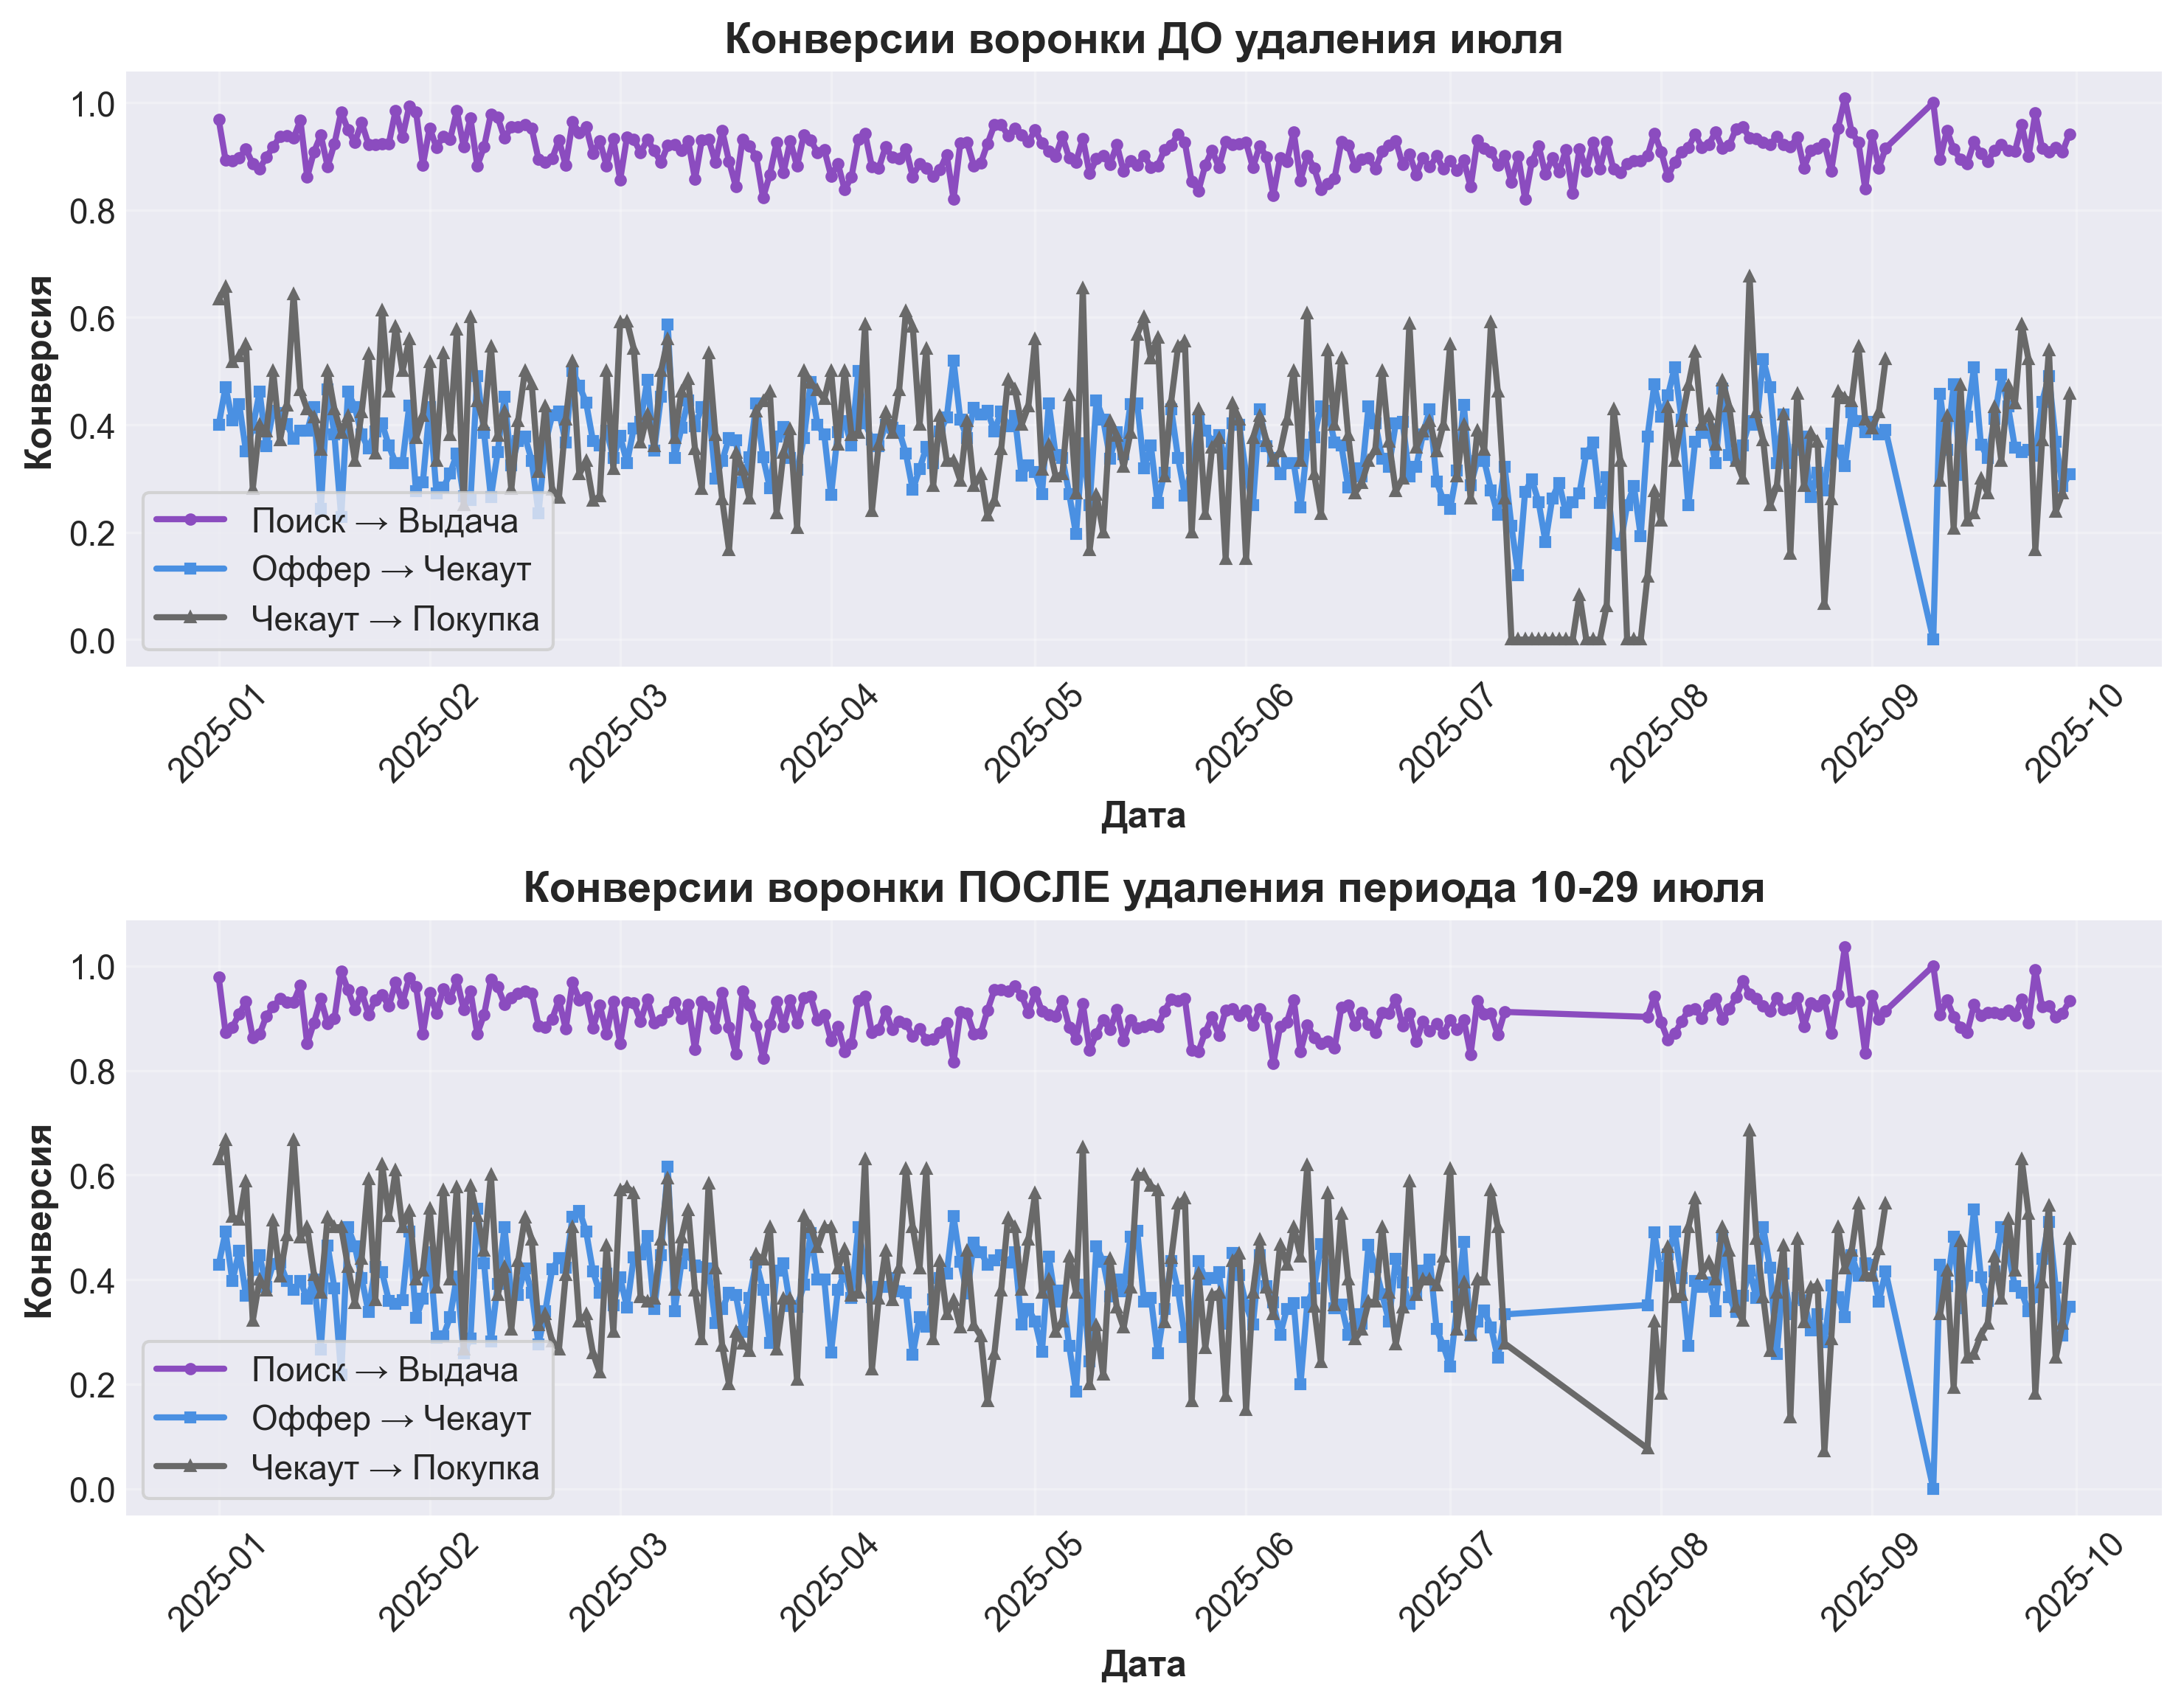

СТАТИСТИКА КОНВЕРСИЙ

ДО удаления июля:
  Средняя конверсия Поиск → Выдача: 0.909
  Средняя конверсия Оффер → Чекаут: 0.361
  Средняя конверсия Чекаут → Покупка: 0.372

ПОСЛЕ удаления периода 10-29 июля:
  Средняя конверсия Поиск → Выдача: 0.908
  Средняя конверсия Оффер → Чекаут: 0.384
  Средняя конверсия Чекаут → Покупка: 0.413

ТЕСТ НА СТАЦИОНАРНОСТЬ: ДИКИ-ФУЛЛЕР ДЛЯ КОНВЕРСИИ В ПОКУПКУ

ДО удаления июля:
----------------------------------------------------------------------
ADF статистика: -5.141908
P-value: 0.000012
Критические значения:
  1%: -3.455461
  5%: -2.872593
  10%: -2.572660

✓ Результат: Ряд СТАЦИОНАРЕН (p=0.000012 <= 0.05)
  → Отклоняем H0: ряд не имеет единичного корня

ПОСЛЕ удаления периода 10-29 июля:
----------------------------------------------------------------------
ADF статистика: -13.473785
P-value: 0.000000
Критические значения:
  1%: -3.457326
  5%: -2.873410
  10%: -2.573096

✓ Результат: Ряд СТАЦИОНАРЕН (p=0.000000 <= 0.05)
  → Отклоняем H0: ряд не имее

In [15]:
# ============================================================================
# КОНВЕРСИИ ВОРОНКИ ДО УДАЛЕНИЯ ИЮЛЯ
# ============================================================================

# Факт прохождения этапов воронки (до удаления июля)
fact_of_actions_before = df_before_july_removal.groupby('session_id', as_index=False).agg(
    session_start_dt=('session_start_dt', 'first'), 
    delivery_fact=('screen_nm', lambda x: sum(x == 'Выдача') > 0),
    search_fact=('screen_nm', lambda x: sum(x == 'Поиск') > 0),
    offer_fact=('screen_nm', lambda x: sum(x == 'Оффер') > 0),
    checkout_fact=('screen_nm', lambda x: sum(x == 'Чекаут') > 0),
    purchase_back_fact=('screen_nm', lambda x: sum(x == 'Покупка бэк') > 0),
    purchase_front_fact=('screen_nm', lambda x: sum(x == 'Покупка фронт') > 0),
)

# Агрегация по дням (до удаления июля)
fact_of_actions_before['date'] = pd.to_datetime(fact_of_actions_before['session_start_dt']).dt.date
daily_before = fact_of_actions_before.groupby('date', as_index=False).agg(
    search_sum=('search_fact', 'sum'),
    delivery_sum=('delivery_fact', 'sum'),
    offer_sum=('offer_fact', 'sum'),
    checkout_sum=('checkout_fact', 'sum'),
    purchase_back_sum=('purchase_back_fact', 'sum'),
)

# Пересчёт конверсий (до удаления июля)
daily_before['date'] = pd.to_datetime(daily_before['date'])
daily_before['поиск_выдача'] = daily_before['delivery_sum'] / daily_before['search_sum']
daily_before['оффер_чекаут'] = daily_before['checkout_sum'] / daily_before['offer_sum']
daily_before['чекаут_покупка'] = daily_before['purchase_back_sum'] / daily_before['checkout_sum']

# ============================================================================
# КОНВЕРСИИ ВОРОНКИ ПОСЛЕ УДАЛЕНИЯ ПЕРИОДА 10-29 ИЮЛЯ
# ============================================================================

# Удаляем период с 10 по 29 июля для анализа "после удаления"
df_after_july_removal = df[~((df['session_start_dt'].dt.date >= pd.Timestamp('2025-07-10').date()) &
                              (df['session_start_dt'].dt.date <= pd.Timestamp('2025-07-29').date()))].copy()

# Факт прохождения этапов воронки (после удаления июля)
fact_of_actions = df_after_july_removal.groupby('session_id', as_index=False).agg(
    session_start_dt=('session_start_dt', 'first'), 
    delivery_fact=('screen_nm', lambda x: sum(x == 'Выдача') > 0),
    search_fact=('screen_nm', lambda x: sum(x == 'Поиск') > 0),
    offer_fact=('screen_nm', lambda x: sum(x == 'Оффер') > 0),
    checkout_fact=('screen_nm', lambda x: sum(x == 'Чекаут') > 0),
    purchase_back_fact=('screen_nm', lambda x: sum(x == 'Покупка бэк') > 0),
    purchase_front_fact=('screen_nm', lambda x: sum(x == 'Покупка фронт') > 0),
)

# Агрегация по дням (после удаления июля)
fact_of_actions['date'] = pd.to_datetime(fact_of_actions['session_start_dt']).dt.date
daily = fact_of_actions.groupby('date', as_index=False).agg(
    search_sum=('search_fact', 'sum'),
    delivery_sum=('delivery_fact', 'sum'),
    offer_sum=('offer_fact', 'sum'),
    checkout_sum=('checkout_fact', 'sum'),
    purchase_back_sum=('purchase_back_fact', 'sum'),
)

# Пересчёт конверсий (после удаления июля)
daily['date'] = pd.to_datetime(daily['date'])
daily['поиск_выдача'] = daily['delivery_sum'] / daily['search_sum']
daily['оффер_чекаут'] = daily['checkout_sum'] / daily['offer_sum']
daily['чекаут_покупка'] = daily['purchase_back_sum'] / daily['checkout_sum']

# ============================================================================
# ВИЗУАЛИЗАЦИЯ: СРАВНЕНИЕ ДО И ПОСЛЕ УДАЛЕНИЯ ИЮЛЯ
# ============================================================================

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# График 1: Конверсии до удаления июля
axes[0].plot(daily_before['date'], daily_before['поиск_выдача'], label='Поиск → Выдача', linewidth=2, marker='o', markersize=3, color='#8B4CBF')  # Фиолетовый
axes[0].plot(daily_before['date'], daily_before['оффер_чекаут'], label='Оффер → Чекаут', linewidth=2, marker='s', markersize=3, color='#4A90E2')  # Голубой
axes[0].plot(daily_before['date'], daily_before['чекаут_покупка'], label='Чекаут → Покупка', linewidth=2, marker='^', markersize=3, color='#696969')  # Серый

axes[0].set_title("Конверсии воронки ДО удаления июля", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Дата", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Конверсия", fontsize=12, fontweight='bold')
axes[0].legend(fontsize=11, loc='best', frameon=True)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45, labelsize=11)
axes[0].tick_params(axis='y', labelsize=11)

# График 2: Конверсии после удаления июля
axes[1].plot(daily['date'], daily['поиск_выдача'], label='Поиск → Выдача', linewidth=2, marker='o', markersize=3, color='#8B4CBF')  # Фиолетовый
axes[1].plot(daily['date'], daily['оффер_чекаут'], label='Оффер → Чекаут', linewidth=2, marker='s', markersize=3, color='#4A90E2')  # Голубой
axes[1].plot(daily['date'], daily['чекаут_покупка'], label='Чекаут → Покупка', linewidth=2, marker='^', markersize=3, color='#696969')  # Серый

axes[1].set_title("Конверсии воронки ПОСЛЕ удаления периода 10-29 июля", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Дата", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Конверсия", fontsize=12, fontweight='bold')
axes[1].legend(fontsize=11, loc='best', frameon=True)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Вывод статистики
print("="*70)
print("СТАТИСТИКА КОНВЕРСИЙ")
print("="*70)
print("\nДО удаления июля:")
print(f"  Средняя конверсия Поиск → Выдача: {daily_before['поиск_выдача'].mean():.3f}")
print(f"  Средняя конверсия Оффер → Чекаут: {daily_before['оффер_чекаут'].mean():.3f}")
print(f"  Средняя конверсия Чекаут → Покупка: {daily_before['чекаут_покупка'].mean():.3f}")

print("\nПОСЛЕ удаления периода 10-29 июля:")
print(f"  Средняя конверсия Поиск → Выдача: {daily['поиск_выдача'].mean():.3f}")
print(f"  Средняя конверсия Оффер → Чекаут: {daily['оффер_чекаут'].mean():.3f}")
print(f"  Средняя конверсия Чекаут → Покупка: {daily['чекаут_покупка'].mean():.3f}")

# ============================================================================
# ТЕСТ НА СТАЦИОНАРНОСТЬ: ТЕСТ ДИКИ-ФУЛЛЕРА ДЛЯ КОНВЕРСИИ В ПОКУПКУ
# ============================================================================

from statsmodels.tsa.stattools import adfuller

print("\n" + "="*70)
print("ТЕСТ НА СТАЦИОНАРНОСТЬ: ДИКИ-ФУЛЛЕР ДЛЯ КОНВЕРСИИ В ПОКУПКУ")
print("="*70)

# Тест для данных ДО удаления июля
print("\nДО удаления июля:")
print("-" * 70)
# Удаляем NaN значения для теста
chekout_purchase_before = daily_before['чекаут_покупка'].dropna()
if len(chekout_purchase_before) > 0:
    adf_result_before = adfuller(chekout_purchase_before, autolag='AIC')
    adf_stat_before = adf_result_before[0]
    p_value_before = adf_result_before[1]
    critical_values_before = adf_result_before[4]
    
    print(f"ADF статистика: {adf_stat_before:.6f}")
    print(f"P-value: {p_value_before:.6f}")
    print("Критические значения:")
    for key, value in critical_values_before.items():
        print(f"  {key}: {value:.6f}")
    
    if p_value_before <= 0.05:
        print(f"\n✓ Результат: Ряд СТАЦИОНАРЕН (p={p_value_before:.6f} <= 0.05)")
        print("  → Отклоняем H0: ряд не имеет единичного корня")
    else:
        print(f"\n✗ Результат: Ряд НЕ СТАЦИОНАРЕН (p={p_value_before:.6f} > 0.05)")
        print("  → Не отклоняем H0: ряд имеет единичный корень")
else:
    print("Недостаточно данных для теста")

# Тест для данных ПОСЛЕ удаления июля
print("\nПОСЛЕ удаления периода 10-29 июля:")
print("-" * 70)
# Удаляем NaN значения для теста
chekout_purchase_after = daily['чекаут_покупка'].dropna()
if len(chekout_purchase_after) > 0:
    adf_result_after = adfuller(chekout_purchase_after, autolag='AIC')
    adf_stat_after = adf_result_after[0]
    p_value_after = adf_result_after[1]
    critical_values_after = adf_result_after[4]
    
    print(f"ADF статистика: {adf_stat_after:.6f}")
    print(f"P-value: {p_value_after:.6f}")
    print("Критические значения:")
    for key, value in critical_values_after.items():
        print(f"  {key}: {value:.6f}")
    
    if p_value_after <= 0.05:
        print(f"\n✓ Результат: Ряд СТАЦИОНАРЕН (p={p_value_after:.6f} <= 0.05)")
        print("  → Отклоняем H0: ряд не имеет единичного корня")
    else:
        print(f"\n✗ Результат: Ряд НЕ СТАЦИОНАРЕН (p={p_value_after:.6f} > 0.05)")
        print("  → Не отклоняем H0: ряд имеет единичный корень")
else:
    print("Недостаточно данных для теста")

print("\n" + "="*70)


## 10. Анализ корреляций


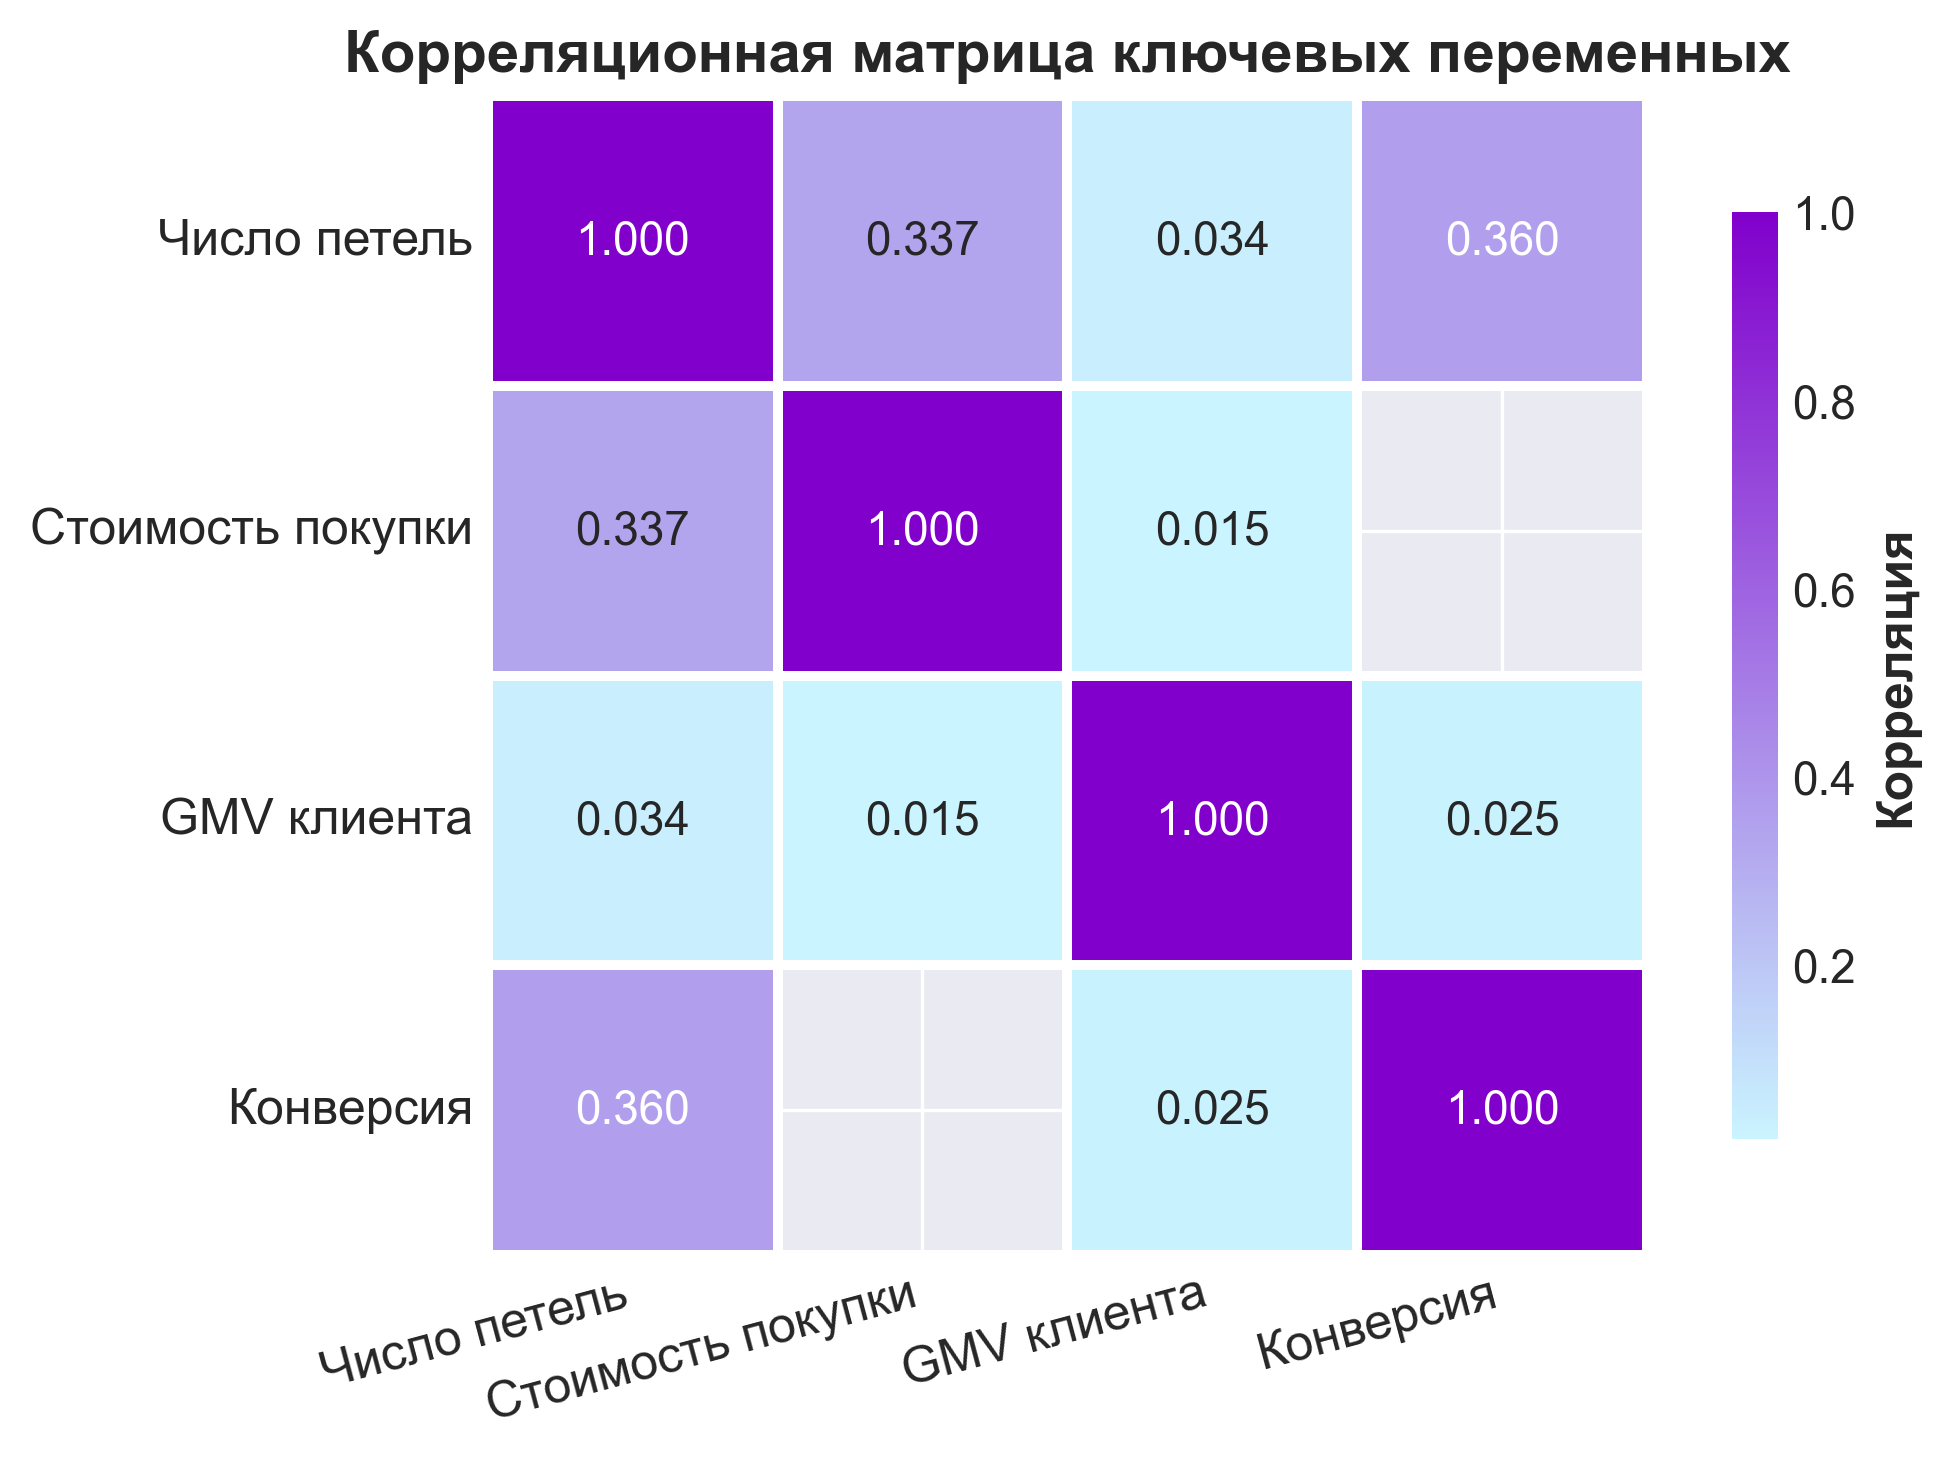

In [16]:
# Выбор ключевых переменных для корреляционного анализа
cols = ['loops_count', 'session_purchase_price', 'client_gmv', 'conversion']
labels = ['Число петель', 'Стоимость покупки', 'GMV клиента', 'Конверсия']

# Корреляция Спирмена для количественных переменных (по сессиям)
quant_cols = cols[:-1]  # все кроме бинарного
corr = session_level[quant_cols].corr(numeric_only=True, method='spearman').abs()

# Расширяем матрицу до всех колонок
corr_matrix = np.zeros((len(cols), len(cols)))

# Копируем корреляцию количественных
corr_matrix[:-1, :-1] = corr.values

# Point-biserial корреляция с бинарным признаком (по сессиям)
for i, col in enumerate(quant_cols):
    r, _ = pointbiserialr(session_level['conversion'], session_level[col])
    corr_matrix[i, -1] = round(abs(r), 3)
    corr_matrix[-1, i] = round(abs(r), 3)

# Корреляция бинарного с самим собой = 1
corr_matrix[-1, -1] = 1.0

# Обнуляем корреляцию между стоимостью покупки и конверсией
corr_matrix[1, 3] = None
corr_matrix[3, 1] = None

# Визуализация корреляционной матрицы
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("custom", ["#CAF4FF", "#8100cc"])

plt.figure(figsize=(7, 5))
sns.heatmap(
    data=corr_matrix,
    cmap=cmap,
    annot=True,
    fmt='.3f',
    xticklabels=labels,
    yticklabels=labels,
    square=True,
    linewidths=2,
    cbar_kws={"shrink": 0.8, "label": "Корреляция"},
    annot_kws={"size": 11}
)

plt.title("Корреляционная матрица ключевых переменных", fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel("", fontsize=13)
plt.ylabel("", fontsize=13)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.set_label("Корреляция", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## 10.1. Анализ по RFM сегментам


АНАЛИЗ ПО RFM СЕГМЕНТАМ

RFM    Средний GMV     Среднее время сессии (мин) Конверсия (%)   Кол-во сессий  
----------------------------------------------------------------------
1      50,187          25.99                     5.68            1,250          
2      25,631          25.93                     7.09            11,664         
3      23,472          23.72                     3.59            3,375          
4      8,870           25.45                     7.74            12,343         
5      17,625          30.81                     5.57            4,456          
6      15,698          19.68                     0.74            677            


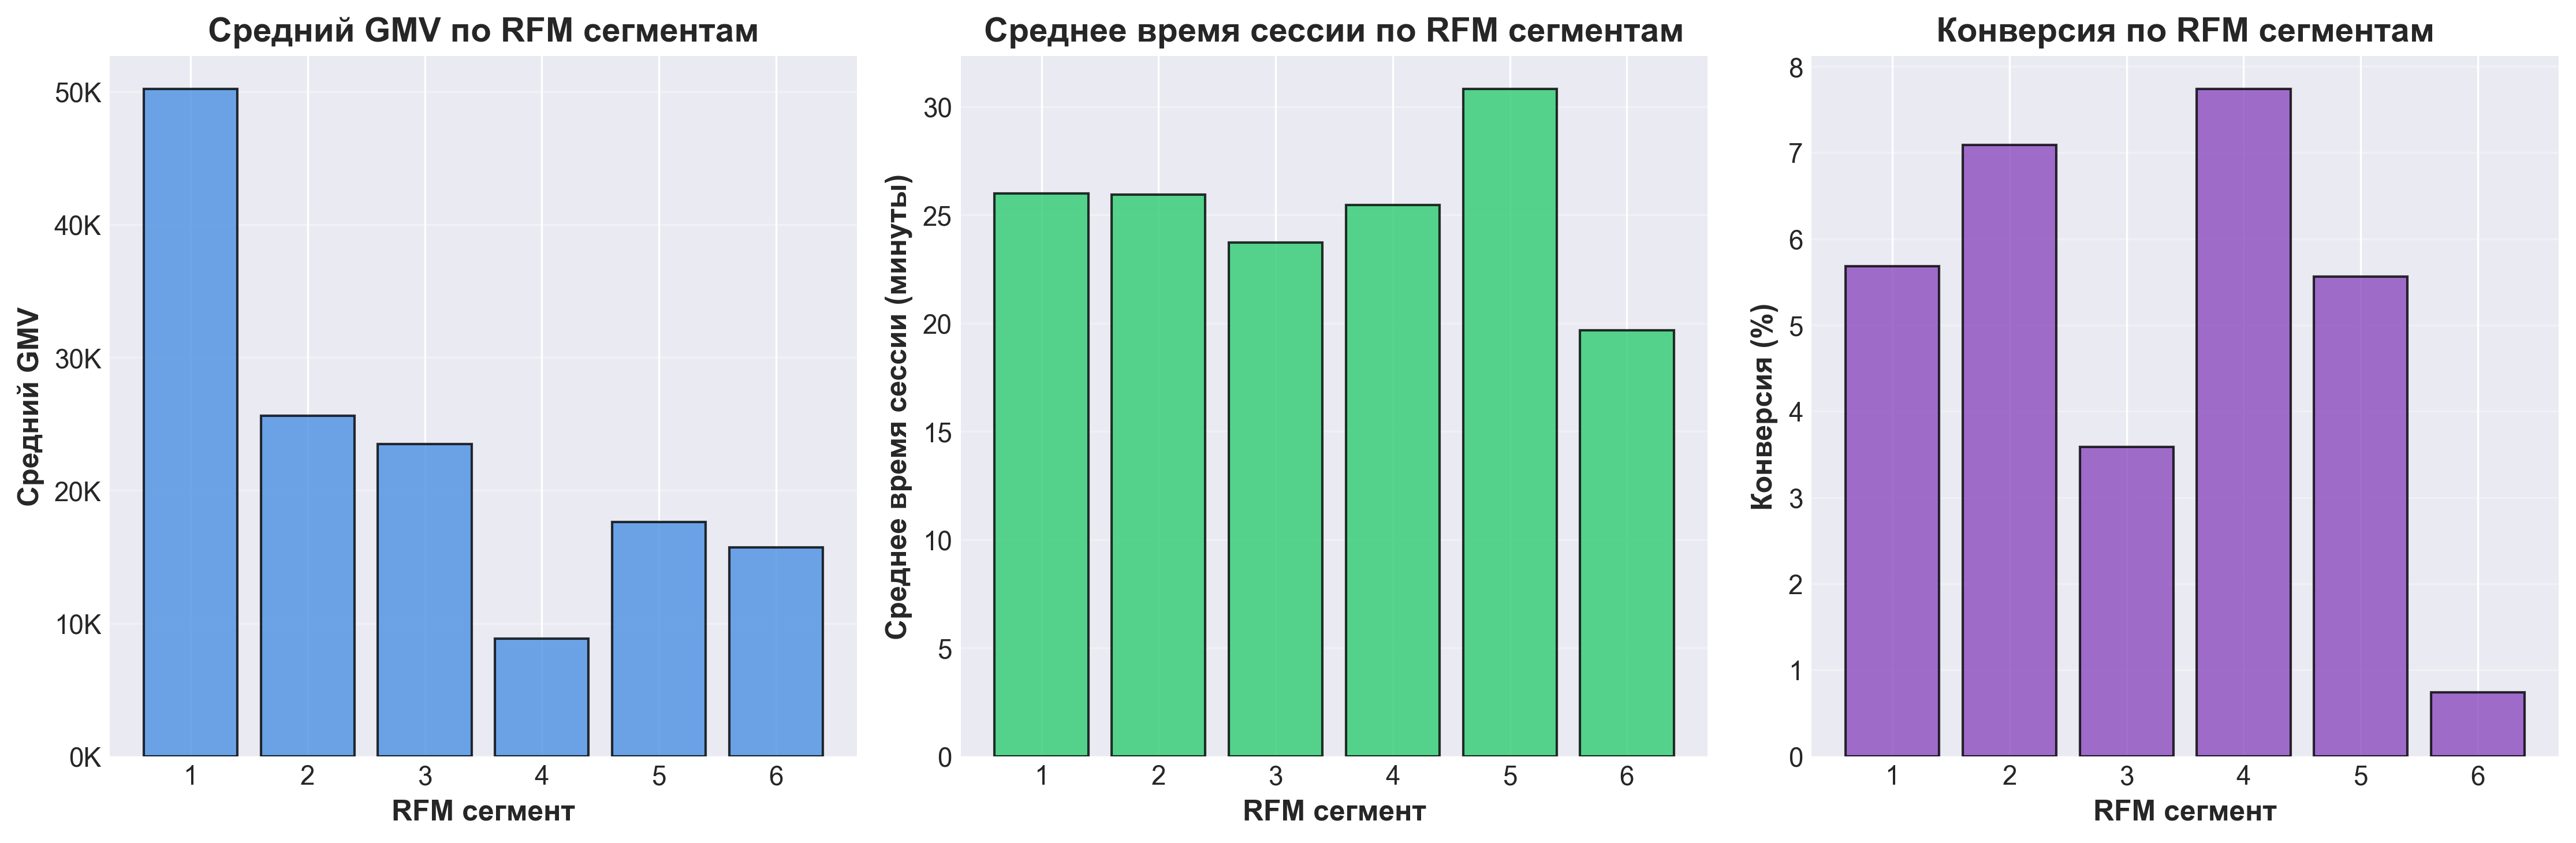

In [17]:
# ============================================================================
# АНАЛИЗ ПО RFM СЕГМЕНТАМ
# ============================================================================

# Вычисление времени сессии (разница между последним и первым screen_dttm)
session_duration = df.groupby('session_id')['screen_dttm'].agg(['min', 'max']).reset_index()
session_duration['session_duration_seconds'] = (session_duration['max'] - session_duration['min']).dt.total_seconds()
session_duration['session_duration_minutes'] = session_duration['session_duration_seconds'] / 60

# Добавляем время сессии к session_level
session_level = session_level.merge(
    session_duration[['session_id', 'session_duration_minutes']], 
    on='session_id', 
    how='left'
)

# Агрегация по RFM сегментам
rfm_analysis = session_level.groupby('client_segment').agg({
    'client_gmv': 'mean',
    'session_duration_minutes': 'mean',
    'converted': 'mean',
    'session_id': 'count'
}).reset_index()

rfm_analysis.columns = ['rfm_segment', 'avg_gmv', 'avg_session_duration_min', 'conversion_rate', 'session_count']
rfm_analysis['conversion_pct'] = rfm_analysis['conversion_rate'] * 100
rfm_analysis = rfm_analysis.sort_values('rfm_segment')

# Вывод статистики
print("="*70)
print("АНАЛИЗ ПО RFM СЕГМЕНТАМ")
print("="*70)
print(f"\n{'RFM':<6} {'Средний GMV':<15} {'Среднее время сессии (мин)':<25} {'Конверсия (%)':<15} {'Кол-во сессий':<15}")
print("-" * 70)
for _, row in rfm_analysis.iterrows():
    print(f"{int(row['rfm_segment']):<6} {row['avg_gmv']:<15,.0f} {row['avg_session_duration_min']:<25.2f} {row['conversion_pct']:<15.2f} {int(row['session_count']):<15,}")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# График 1: Средний GMV по RFM сегментам
axes[0].bar(rfm_analysis['rfm_segment'].astype(str), rfm_analysis['avg_gmv'], 
            color='#4A90E2', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('RFM сегмент', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Средний GMV', fontsize=12, fontweight='bold')
axes[0].set_title('Средний GMV по RFM сегментам', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='both', labelsize=11)
# Форматирование оси Y для больших чисел
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# График 2: Среднее время сессии по RFM сегментам
axes[1].bar(rfm_analysis['rfm_segment'].astype(str), rfm_analysis['avg_session_duration_min'], 
            color='#2ECC71', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('RFM сегмент', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Среднее время сессии (минуты)', fontsize=12, fontweight='bold')
axes[1].set_title('Среднее время сессии по RFM сегментам', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='both', labelsize=11)

# График 3: Конверсия по RFM сегментам
axes[2].bar(rfm_analysis['rfm_segment'].astype(str), rfm_analysis['conversion_pct'], 
            color='#8B4CBF', edgecolor='black', alpha=0.8)
axes[2].set_xlabel('RFM сегмент', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Конверсия (%)', fontsize=12, fontweight='bold')
axes[2].set_title('Конверсия по RFM сегментам', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].tick_params(axis='both', labelsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*70)


## 11. Итоговая сводка


In [18]:
print("="*70)
print("ИТОГОВАЯ СВОДКА EDA")
print("="*70)

print(f"\n1. РАЗМЕР ДАННЫХ:")
print(f"   - Всего записей: {len(df):,}")
print(f"   - Уникальных сессий: {df['session_id'].nunique():,}")
print(f"   - Уникальных клиентов: {df['client_id'].nunique():,}")

print(f"\n2. КОНВЕРСИЯ:")
print(f"   - Общая конверсия: {session_level['converted'].mean()*100:.2f}%")
print(f"   - Сессий с конверсией: {session_level['converted'].sum():,}")

print(f"\n3. КОЛИЧЕСТВО ПЕТЕЛЬ:")
print(f"   - Среднее: {session_level['loops_count'].mean():.2f}")
print(f"   - Медиана: {session_level['loops_count'].median():.2f}")
print(f"   - Максимум: {session_level['loops_count'].max()}")

print(f"\n4. КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:")
max_conv_idx = conversion_by_loops['conversion_rate'].idxmax()
optimal_loops = conversion_by_loops.loc[max_conv_idx, 'loops_count']
max_conv_rate = conversion_by_loops.loc[max_conv_idx, 'conversion_rate'] * 100
print(f"   - Максимальная конверсия ({max_conv_rate:.1f}%) наблюдается при {optimal_loops:.0f} петлях")
print(f"   - Наблюдается зависимость между количеством петель и конверсией")

print("\n" + "="*70)
print("УДАЛЕНИЕ ДАННЫХ ЗА ПЕРИОД 10-29 ИЮЛЯ И СОХРАНЕНИЕ ИТОГОВОГО ДАТАСЕТА")
print("="*70)

# Удаление данных за период 10-29 июля 2025 (если были проблемы с данными в этом периоде)
initial_count = len(df)
df_clean = df[~((df['session_start_dt'].dt.date >= pd.Timestamp('2025-07-10').date()) &
                (df['session_start_dt'].dt.date <= pd.Timestamp('2025-07-29').date()))].copy()
removed_july = initial_count - len(df_clean)

if removed_july > 0:
    print(f"\nУдалено записей за период 10-29 июля: {removed_july} ({removed_july/initial_count*100:.2f}%)")
    print(f"Осталось записей: {len(df_clean):,}")
else:
    print("\nДанных за июль не найдено")
    df_clean = df.copy()

# Сохранение итогового датасета
df_clean.to_csv('data_clean.csv', index=False, encoding='utf-8-sig')
print(f"\n✓ Итоговый датасет сохранён в data_clean.csv")
print(f"   - Записей в файле: {len(df_clean):,}")
print(f"   - Столбцов: {len(df_clean.columns)}")

print("\n" + "="*70)
print("EDA ЗАВЕРШЁН")
print("="*70)


ИТОГОВАЯ СВОДКА EDA

1. РАЗМЕР ДАННЫХ:
   - Всего записей: 201,165
   - Уникальных сессий: 33,765
   - Уникальных клиентов: 1,845

2. КОНВЕРСИЯ:
   - Общая конверсия: 6.60%
   - Сессий с конверсией: 2,227

3. КОЛИЧЕСТВО ПЕТЕЛЬ:
   - Среднее: 0.84
   - Медиана: 0.00
   - Максимум: 15

4. КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
   - Максимальная конверсия (46.1%) наблюдается при 10 петлях
   - Наблюдается зависимость между количеством петель и конверсией

УДАЛЕНИЕ ДАННЫХ ЗА ПЕРИОД 10-29 ИЮЛЯ И СОХРАНЕНИЕ ИТОГОВОГО ДАТАСЕТА

Удалено записей за период 10-29 июля: 10124 (5.03%)
Осталось записей: 191,041

✓ Итоговый датасет сохранён в data_clean.csv
   - Записей в файле: 191,041
   - Столбцов: 26

EDA ЗАВЕРШЁН


---

# БЛОК 2: Линейная регрессия

Данный блок содержит статистический анализ для проверки гипотез о связи между сложностью сессий и количеством петель.

## Импорт библиотек


## Загрузка и подготовка данных


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
# Загрузка данных
df = pd.read_csv(r'data_clean.csv')
df = df.sort_values(["session_id", "screen_dttm"]) 

# Создание колонки is_loop: 1 если loops_count > 0, иначе 0
if "is_loop" not in df.columns:
    df["is_loop"] = (df["loops_count"] > 0).astype(int)

# Подготовка данных для предварительного анализа
loopers = df[df["is_loop"] == 1].groupby("session_id")["session_purchase_status"].apply(
    lambda x: (x == "Успешные").any()
).astype(int)

unloopers = df[df["is_loop"] == 0].groupby("session_id")["session_purchase_status"].apply(
    lambda x: (x == "Успешные").any()
).astype(int)

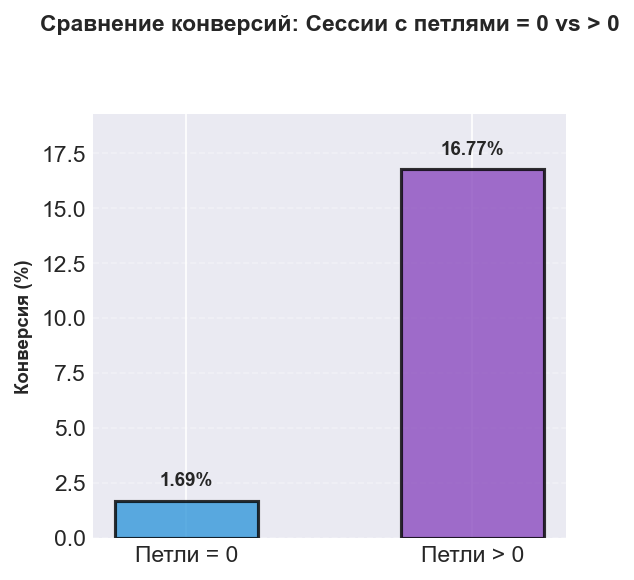

In [21]:
# ============================================================================
# СРАВНЕНИЕ КОНВЕРСИЙ: Сессии с петлями = 0 vs > 0
# ============================================================================

# Расчет конверсий
conversion_loopers = loopers.mean()
conversion_unloopers = unloopers.mean()

# Количество успешных и общее количество сессий
success_loopers = loopers.sum()
total_loopers = len(loopers)
success_unloopers = unloopers.sum()
total_unloopers = len(unloopers)

# График сравнения конверсий
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Данные для графика
categories = ['Петли = 0', 'Петли > 0']
conversions = [conversion_unloopers * 100, conversion_loopers * 100]
colors = ['#3498db', '#8B4CBF']  # Голубой и фиолетовый

# Позиции для баров с отступом
x_pos = np.arange(len(categories))
bar_width = 0.5  # Уменьшенная ширина для раздвижения

# Столбчатый график
bars = ax.bar(x_pos, conversions, width=bar_width, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xticks(x_pos)
ax.set_xticklabels(categories)

# Добавление значений на столбцы
for i, (bar, conv) in enumerate(zip(bars, conversions)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{conv:.2f}%',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Настройка графика
ax.set_ylabel('Конверсия (%)', fontsize=9, fontweight='bold')
ax.set_title('Сравнение конверсий: Сессии с петлями = 0 vs > 0', 
             fontsize=11, fontweight='bold', pad=40)
ax.set_ylim(0, max(conversions) * 1.15)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()


## Часть 1: Доказательство сравнения средних - Сложные сессии имеют больше петель

### Подготовка данных для доказательства сравнения средних


In [22]:
# Подготовка данных: преобразование колонки багажа в бинарную переменную
df["session_purchase_tickets_luggage_flg"] = df["session_purchase_tickets_luggage_flg"].replace({
    "Без багажа": 0, 
    "С багажом": 1
})

In [23]:
# ============================================================================
# ДОКАЗАТЕЛЬСТВО СРАВНЕНИЯ СРЕДНИХ: Сложные сессии имеют больше петель
# ============================================================================

# Настройка цветовой схемы (пурпурно-голубая палитра)
PURPLE = '#8B4CBF'  # Пурпурный
BLUE = '#4A90E2'    # Голубой
COLORS = [PURPLE, BLUE]

# Агрегация данных по сессиям
looped_analysis = df.groupby(["session_id"])[
    ["loops_count", "session_purchase_status", "session_purchase_tickets_num", "session_purchase_tickets_luggage_flg", "session_start_dt"]
].agg(
    status=("session_purchase_status", lambda x: int((x == "Успешные").any())),
    loops=("loops_count", lambda x: max(x)),
    tickets=("session_purchase_tickets_num", "max"),
    baggage=("session_purchase_tickets_luggage_flg", "max"),
    session_start_dt=("session_start_dt", "first")
).reset_index()

# Преобразуем дату в datetime если нужно
if not pd.api.types.is_datetime64_any_dtype(looped_analysis['session_start_dt']):
    looped_analysis['session_start_dt'] = pd.to_datetime(looped_analysis['session_start_dt'])

# Определение сложных сессий:
# - более 1 билета (групповая покупка) ИЛИ
# - покупка с багажом
looped_analysis["multi_tickets"] = (looped_analysis["tickets"] > 1).astype(int)
looped_analysis["complex_session"] = (
    (looped_analysis["multi_tickets"] == 1) | (looped_analysis["baggage"] == 1)
).astype(int)

# Оставляем только успешные покупки
sessions_analysis = looped_analysis[looped_analysis["status"] == 1].copy()

# Группировка по типу сессии
session_groups = sessions_analysis.groupby("complex_session")["loops"].agg(
    mean_loops="mean",
    median_loops="median",
    std_loops="std",
    count="count"
).reset_index()

session_groups["session_type"] = session_groups["complex_session"].map({
    0: "Простая сессия\n(1 билет, без багажа)",
    1: "Сложная сессия\n(>1 билета или с багажом)"
})

print("=" * 70)
print("ДОКАЗАТЕЛЬСТВО: Сравнение средних количества петель")
print("=" * 70)
print(f"\nПростая сессия:")
print(f"  Среднее число петель: {session_groups.loc[0, 'mean_loops']:.2f}")
print(f"  Медиана: {session_groups.loc[0, 'median_loops']:.2f}")
print(f"  Стандартное отклонение: {session_groups.loc[0, 'std_loops']:.2f}")
print(f"  Количество: {int(session_groups.loc[0, 'count'])}")

print(f"\nСложная сессия:")
print(f"  Среднее число петель: {session_groups.loc[1, 'mean_loops']:.2f}")
print(f"  Медиана: {session_groups.loc[1, 'median_loops']:.2f}")
print(f"  Стандартное отклонение: {session_groups.loc[1, 'std_loops']:.2f}")
print(f"  Количество: {int(session_groups.loc[1, 'count'])}")

# Робастная линейная регрессия
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Подготовка данных для регрессии
regression_data_robust = sessions_analysis[['loops', 'complex_session', 'session_id']].copy()

# Определяем переменную для кластеризации (для cluster-robust стандартных ошибок)
cluster_var = None
if 'client_id' in sessions_analysis.columns:
    cluster_var = 'client_id'
elif 'session_id' in regression_data_robust.columns:
    cluster_var = 'session_id'

# Удаляем пропуски в переменной кластеризации если она есть
if cluster_var is not None:
    regression_data_robust = regression_data_robust.dropna(subset=[cluster_var]).copy()
    if len(regression_data_robust) < len(sessions_analysis):
        print(f"\n⚠️  Удалено {len(sessions_analysis) - len(regression_data_robust)} наблюдений с пропусками в {cluster_var}")

# Строим робастную линейную регрессию с cluster-robust стандартными ошибками
if cluster_var is not None:
    model_robust = ols(
        'loops ~ complex_session', 
        data=regression_data_robust
    ).fit(
        cov_type='cluster',
        cov_kwds={'groups': regression_data_robust[cluster_var]},
        disp=0
    )
else:
    # Если нет переменной для кластеризации, используем обычную модель
    model_robust = ols('loops ~ complex_session', data=regression_data_robust).fit(disp=0)

# Извлекаем результаты
coef_complex = model_robust.params['complex_session']
p_value_complex = model_robust.pvalues['complex_session']
conf_int_complex = model_robust.conf_int().loc['complex_session']
se_complex = model_robust.bse['complex_session']

# Вычисляем разницу средних для проверки
mean_simple = session_groups.loc[0, 'mean_loops']
mean_complex = session_groups.loc[1, 'mean_loops']
diff_means = mean_complex - mean_simple

print(f"\nРобастная линейная регрессия (loops ~ complex_session):")
print(f"  Коэффициент при complex_session (β): {coef_complex:.6f}")
print(f"  Стандартная ошибка: {se_complex:.6f}")
print(f"  P-value: {p_value_complex:.6f}")
print(f"  95% доверительный интервал: [{conf_int_complex[0]:.6f}, {conf_int_complex[1]:.6f}]")

print(f"\nПроверка соответствия коэффициента разнице средних:")
print(f"  Среднее (простая сессия): {mean_simple:.6f}")
print(f"  Среднее (сложная сессия): {mean_complex:.6f}")
print(f"  Разница средних: {diff_means:.6f}")
print(f"  Коэффициент регрессии: {coef_complex:.6f}")
print(f"  Разница: {abs(diff_means - coef_complex):.10f}")
if abs(diff_means - coef_complex) < 1e-6:
    print(f"  ✓ Коэффициент точно совпадает с разницей средних")
else:
    print(f"  ⚠ Небольшое расхождение (возможно из-за кластеризации или пропусков)")

# ============================================================================
# ПРОВЕРКА УСЛОВИЙ ЛИНЕЙНОЙ РЕГРЕССИИ
# ============================================================================

print(f"\n" + "="*70)
print("ПРОВЕРКА УСЛОВИЙ ЛИНЕЙНОЙ РЕГРЕССИИ")
print("="*70)

# 1. Проверка мультиколлинеарности (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

print(f"\n1. Проверка мультиколлинеарности (VIF):")
try:
    # Подготовка данных для VIF (только регрессоры)
    X_vif = regression_data_robust[['complex_session']].copy()
    X_vif_const = add_constant(X_vif)
    
    # Вычисляем VIF для каждой переменной
    vif_data = pd.DataFrame()
    vif_data["Переменная"] = X_vif_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) 
                        for i in range(X_vif_const.shape[1])]
    
    # Фильтруем только регрессоры (без константы)
    vif_regressors = vif_data[vif_data["Переменная"] != "const"]
    
    for _, row in vif_regressors.iterrows():
        vif_val = row["VIF"]
        status = "✓ Низкая" if vif_val < 5 else "⚠ Умеренная" if vif_val < 10 else "✗ Высокая"
        print(f"   {row['Переменная']}: VIF = {vif_val:.4f} ({status})")
    
    max_vif = vif_regressors["VIF"].max()
    if max_vif < 5:
        print(f"   ✓ Мультиколлинеарность отсутствует (VIF < 5)")
    elif max_vif < 10:
        print(f"   ⚠ Умеренная мультиколлинеарность (5 ≤ VIF < 10)")
    else:
        print(f"   ✗ Высокая мультиколлинеарность (VIF ≥ 10)")
        
except Exception as e:
    print(f"   ⚠ Ошибка при вычислении VIF: {e}")

# 2. Проверка гомоскедастичности (тест Бройша-Пагана)
from statsmodels.stats.diagnostic import het_breuschpagan

# Получаем остатки и предсказанные значения (нужны для проверок)
residuals = model_robust.resid
fitted_values = model_robust.fittedvalues

print(f"\n2. Проверка гомоскедастичности (тест Бройша-Пагана):")
try:
    # Тест Бройша-Пагана
    bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals, model_robust.model.exog)
    
    print(f"   Статистика Бройша-Пагана: {bp_stat:.4f}")
    print(f"   P-value: {bp_pvalue:.6f}")
    
    if bp_pvalue > 0.05:
        print(f"   ✓ Гомоскедастичность выполнена (p={bp_pvalue:.6f} > 0.05)")
        print(f"   → Дисперсия остатков постоянна")
    else:
        print(f"   ✗ Гетероскедастичность обнаружена (p={bp_pvalue:.6f} ≤ 0.05)")
        print(f"   → Дисперсия остатков непостоянна")
        print(f"   → Использование cluster-robust стандартных ошибок корректно")
        
except Exception as e:
    print(f"   ⚠ Ошибка при проверке гомоскедастичности: {e}")

# 3. Дополнительная информация об остатках
print(f"\n3. Дополнительная информация:")
print(f"   Среднее остатков: {residuals.mean():.6f} (должно быть близко к 0)")
print(f"   Стандартное отклонение остатков: {residuals.std():.4f}")

print(f"\n" + "="*70)
if p_value_complex < 0.05:
    print(f"✓ РЕЗУЛЬТАТ: Сложные сессии имеют статистически значимо больше петель (p={p_value_complex:.6f} < 0.05)")
    print(f"  Коэффициент: {coef_complex:.6f} (сложные сессии имеют на {coef_complex:.2f} петель больше)")
else:
    print(f"✗ РЕЗУЛЬТАТ: Различие не статистически значимо (p={p_value_complex:.6f} >= 0.05)")

# ============================================================================
# ПРОВЕРКА ЭКЗОГЕННОСТИ РЕГРЕССОРОВ
# ============================================================================

print("\n" + "="*70)
print("ПРОВЕРКА ЭКЗОГЕННОСТИ РЕГРЕССОРОВ")
print("="*70)

from scipy.stats import pearsonr, chi2

# Получаем остатки модели (для линейной регрессии используем обычные остатки)
residuals_robust = model_robust.resid

# ТЕСТ 1: Корреляция между регрессорами и остатками
print("\n" + "-"*70)
print("ТЕСТ 1: КОРРЕЛЯЦИЯ МЕЖДУ РЕГРЕССОРАМИ И ОСТАТКАМИ")
print("-"*70)

corr_complex_session, p_corr_complex_session = pearsonr(regression_data_robust['complex_session'].values, residuals_robust)

print(f"\nКорреляция complex_session с остатками:")
print(f"  Коэффициент корреляции: {corr_complex_session:.6f}")
print(f"  P-value: {p_corr_complex_session:.6f}")
if p_corr_complex_session < 0.05 and corr_complex_session > 0.05:
    print(f"  ⚠️  Статистически значимая корреляция (p < 0.05) - возможна эндогенность")
elif corr_complex_session < 0.05:
    print(f"  ✓  Статистически значимая малая корреляция (< 0.05) - экзогенность не отвергается")
else:
    print(f"  ✓ Нет значимой корреляции (p >= 0.05) - экзогенность не отвергается")


ДОКАЗАТЕЛЬСТВО: Сравнение средних количества петель

Простая сессия:
  Среднее число петель: 2.91
  Медиана: 2.00
  Стандартное отклонение: 2.90
  Количество: 1044

Сложная сессия:
  Среднее число петель: 3.47
  Медиана: 3.00
  Стандартное отклонение: 3.08
  Количество: 1182

Робастная линейная регрессия (loops ~ complex_session):
  Коэффициент при complex_session (β): 0.554058
  Стандартная ошибка: 0.126884
  P-value: 0.000013
  95% доверительный интервал: [0.305370, 0.802746]

Проверка соответствия коэффициента разнице средних:
  Среднее (простая сессия): 2.913793
  Среднее (сложная сессия): 3.467851
  Разница средних: 0.554058
  Коэффициент регрессии: 0.554058
  Разница: 0.0000000000
  ✓ Коэффициент точно совпадает с разницей средних

ПРОВЕРКА УСЛОВИЙ ЛИНЕЙНОЙ РЕГРЕССИИ

1. Проверка мультиколлинеарности (VIF):
   complex_session: VIF = 1.0000 (✓ Низкая)
   ✓ Мультиколлинеарность отсутствует (VIF < 5)

2. Проверка гомоскедастичности (тест Бройша-Пагана):
   Статистика Бройша-Пагана: 

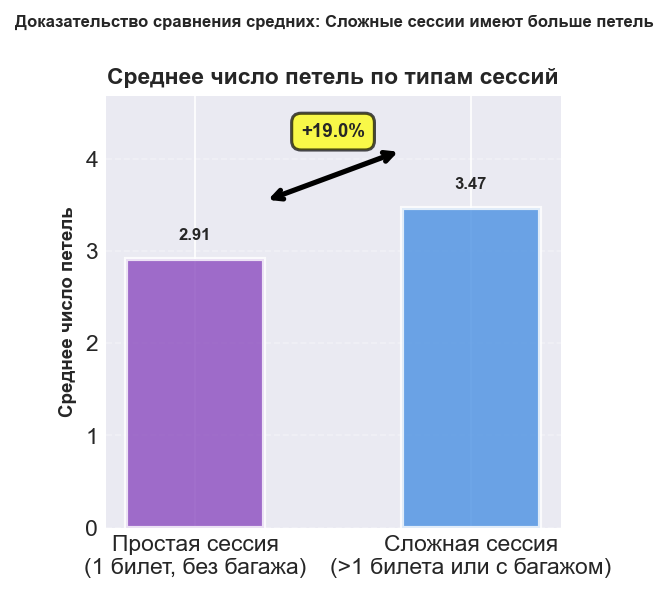


Разница в средних: 0.55 петель
Относительное увеличение: 19.0%


In [24]:
# ============================================================================
# ГРАФИК ДЛЯ ДОКАЗАТЕЛЬСТВА СРАВНЕНИЯ СРЕДНИХ
# ============================================================================

# Создаём фигуру с одним графиком
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
fig.suptitle('Доказательство сравнения средних: Сложные сессии имеют больше петель', 
             fontsize=8, fontweight='bold', y=0.98)

# Столбчатая диаграмма средних значений
# Используем позиции x с отступом для раздвижения баров
x_pos = np.arange(len(session_groups))
bar_width = 0.5  # Уменьшенная ширина для раздвижения
bars = ax.bar(x_pos, session_groups["mean_loops"], width=bar_width,
              color=COLORS, alpha=0.8, edgecolor='white', linewidth=2)
ax.set_xticks(x_pos)
ax.set_xticklabels(session_groups["session_type"])
ax.set_ylabel('Среднее число петель', fontsize=9, fontweight='bold')
ax.set_title('Среднее число петель по типам сессий', fontsize=11, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Устанавливаем отступ сверху, чтобы значения не залезали на заголовок
max_height = session_groups["mean_loops"].max()
ax.set_ylim([0, max_height * 1.35])  # Добавляем 35% отступа сверху для стрелки и процента

# Вычисляем процентное изменение
mean_simple = session_groups.loc[0, 'mean_loops']
mean_complex = session_groups.loc[1, 'mean_loops']
percent_change = ((mean_complex / mean_simple - 1) * 100)

# Добавляем значения на столбцы
for i, (bar, mean_val) in enumerate(zip(bars, session_groups["mean_loops"])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max_height * 0.05,
            f'{mean_val:.2f}',
            ha='center', va='bottom', fontsize=8, fontweight='bold')

# Добавляем стрелку и процентное изменение между столбцами
x1 = bars[0].get_x() + bars[0].get_width()
x2 = bars[1].get_x()
y1 = mean_simple + max_height * 0.18  # Увеличено с 0.12 до 0.18 для более длинной стрелки
y2 = mean_complex + max_height * 0.18  # Увеличено с 0.12 до 0.18 для более длинной стрелки
mid_x = (x1 + x2) / 2
mid_y = max(y1, y2) + max_height * 0.03

# Рисуем стрелку
ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
            arrowprops=dict(arrowstyle='<->', color='black', lw=2.5))

# Добавляем текст с процентным изменением
ax.text(mid_x, mid_y, f'+{percent_change:.1f}%',
        ha='center', va='bottom', fontsize=9, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7, edgecolor='black', linewidth=1.5))

plt.tight_layout()
plt.show()

# Вывод статистики
print(f"\nРазница в средних: {session_groups.loc[1, 'mean_loops'] - session_groups.loc[0, 'mean_loops']:.2f} петель")
print(f"Относительное увеличение: {((session_groups.loc[1, 'mean_loops'] / session_groups.loc[0, 'mean_loops'] - 1) * 100):.1f}%")


In [25]:
# Проверка устойчивости доказательства про сравнение средних по RFM-сегментам
print("="*70)
print("ПРОВЕРКА УСТОЙЧИВОСТИ ДОКАЗАТЕЛЬСТВА ПРО СРАВНЕНИЕ СРЕДНИХ ПО RFM-СЕГМЕНТАМ")
print("="*70)

# Получаем информацию о сегменте из исходных данных
segment_info = df.groupby("session_id")["client_segment"].first().reset_index()
sessions_analysis_rfm = sessions_analysis.merge(segment_info, on="session_id", how="left")

# Определяем группы клиентов на основе RFM-сегмента
# 1-3: Высокий приоритет
# 4-6: Стандартный приоритет
sessions_analysis_rfm["rfm_group"] = sessions_analysis_rfm["client_segment"].apply(
    lambda x: "1-3" if pd.notna(x) and x <= 3 else "4-6" if pd.notna(x) and x >= 4 else "Не определен"
)

# Фильтруем только определенные группы (исключаем "Не определен")
sessions_analysis_rfm_filtered = sessions_analysis_rfm[sessions_analysis_rfm["rfm_group"] != "Не определен"].copy()

print(f"\nРаспределение по RFM-группам:")
print(sessions_analysis_rfm_filtered['rfm_group'].value_counts())

# Создаем список для хранения результатов
robustness_results_1_rfm = []

# Проверяем устойчивость для каждой RFM-группы
rfm_groups = ["1-3", "4-6"]

for rfm_group in rfm_groups:
    # Фильтруем данные по RFM-группе
    rfm_data = sessions_analysis_rfm_filtered[sessions_analysis_rfm_filtered['rfm_group'] == rfm_group].copy()
    
    # Разделяем на простые и сложные сессии
    simple_loops_rfm = rfm_data[rfm_data["complex_session"] == 0]["loops"]
    complex_loops_rfm = rfm_data[rfm_data["complex_session"] == 1]["loops"]
    
    # Проверяем, достаточно ли данных (минимум 30 наблюдений в каждой группе)
    if len(simple_loops_rfm) < 30 or len(complex_loops_rfm) < 30:
        print(f"\n{rfm_group}: недостаточно данных (простая: {len(simple_loops_rfm)}, сложная: {len(complex_loops_rfm)})")
        robustness_results_1_rfm.append({
            'RFM-группа': rfm_group,
            'Значимость различия': 'Недостаточно данных',
            'Среднее (простая)': np.nan,
            'Среднее (сложная)': np.nan,
            'Разница': np.nan,
            'N (простая)': len(simple_loops_rfm),
            'N (сложная)': len(complex_loops_rfm)
        })
        continue
    
    try:
        from statsmodels.formula.api import ols
        
        # Подготовка данных для регрессии
        rfm_regression_data = rfm_data[['loops', 'complex_session', 'session_id']].copy()
        
        # Определяем переменную для кластеризации (для cluster-robust стандартных ошибок)
        cluster_var_rfm = None
        if 'client_id' in rfm_data.columns:
            cluster_var_rfm = 'client_id'
        elif 'session_id' in rfm_regression_data.columns:
            cluster_var_rfm = 'session_id'
        
        # Удаляем пропуски в переменной кластеризации если она есть
        if cluster_var_rfm is not None:
            rfm_regression_data = rfm_regression_data.dropna(subset=[cluster_var_rfm]).copy()
        
        # Строим робастную линейную регрессию с cluster-robust стандартными ошибками
        if cluster_var_rfm is not None:
            model_rfm = ols(
                'loops ~ complex_session', 
                data=rfm_regression_data
            ).fit(
                cov_type='cluster',
                cov_kwds={'groups': rfm_regression_data[cluster_var_rfm]},
                disp=0
            )
        else:
            # Если нет переменной для кластеризации, используем обычную модель
            model_rfm = ols('loops ~ complex_session', data=rfm_regression_data).fit(disp=0)
        
        # Извлекаем результаты
        coef_rfm = model_rfm.params['complex_session']
        p_val_rfm = model_rfm.pvalues['complex_session']
        
        # Используем p-value из регрессии
        sig_diff = 'Да' if p_val_rfm < 0.05 else 'Нет'
        
        # Средние значения
        mean_simple_rfm = simple_loops_rfm.mean()
        mean_complex_rfm = complex_loops_rfm.mean()
        diff_mean_rfm = mean_complex_rfm - mean_simple_rfm
        
        # Проверка соответствия коэффициента разнице средних
        coef_diff_check = abs(diff_mean_rfm - coef_rfm)
        
        robustness_results_1_rfm.append({
            'RFM-группа': rfm_group,
            'Значимость различия': sig_diff,
            'Среднее (простая)': round(mean_simple_rfm, 2),
            'Среднее (сложная)': round(mean_complex_rfm, 2),
            'Разница': round(diff_mean_rfm, 2),
            'N (простая)': len(simple_loops_rfm),
            'N (сложная)': len(complex_loops_rfm)
        })
        
        print(f"\n{rfm_group}:")
        print(f"  N (простая): {len(simple_loops_rfm)}, N (сложная): {len(complex_loops_rfm)}")
        print(f"  Среднее (простая): {mean_simple_rfm:.2f}")
        print(f"  Среднее (сложная): {mean_complex_rfm:.2f}")
        print(f"  Разница средних: {diff_mean_rfm:.2f}")
        print(f"  Коэффициент регрессии: {coef_rfm:.6f}")
        print(f"  Проверка соответствия: разница = {coef_diff_check:.10f} {'✓' if coef_diff_check < 1e-6 else '⚠'}")
        print(f"  Значимость (робастная регрессия): {sig_diff} (p={p_val_rfm:.6f})")
        
    except Exception as e:
        print(f"\n{rfm_group}: ошибка при анализе - {str(e)}")
        robustness_results_1_rfm.append({
            'RFM-группа': rfm_group,
            'Значимость различия': 'Ошибка',
            'Среднее (простая)': np.nan,
            'Среднее (сложная)': np.nan,
            'Разница': np.nan,
            'N (простая)': len(simple_loops_rfm) if 'simple_loops_rfm' in locals() else 0,
            'N (сложная)': len(complex_loops_rfm) if 'complex_loops_rfm' in locals() else 0
        })

# Создаем таблицу результатов
robustness_table_1_rfm = pd.DataFrame(robustness_results_1_rfm)

print("\n" + "="*70)
print("ТАБЛИЦА РЕЗУЛЬТАТОВ ПРОВЕРКИ УСТОЙЧИВОСТИ ДОКАЗАТЕЛЬСТВА ПРО СРАВНЕНИЕ СРЕДНИХ ПО RFM-СЕГМЕНТАМ")
print("="*70)
print(robustness_table_1_rfm.to_string(index=False))

# Сохраняем таблицу
robustness_table_1_rfm.to_csv('robustness_means_comparison_by_rfm.csv', index=False, encoding='utf-8-sig')
print("\nТаблица сохранена в файл: robustness_means_comparison_by_rfm.csv")


ПРОВЕРКА УСТОЙЧИВОСТИ ДОКАЗАТЕЛЬСТВА ПРО СРАВНЕНИЕ СРЕДНИХ ПО RFM-СЕГМЕНТАМ

Распределение по RFM-группам:
rfm_group
4-6    1208
1-3    1018
Name: count, dtype: int64

1-3:
  N (простая): 368, N (сложная): 650
  Среднее (простая): 2.80
  Среднее (сложная): 3.58
  Разница средних: 0.78
  Коэффициент регрессии: 0.782625
  Проверка соответствия: разница = 0.0000000000 ✓
  Значимость (робастная регрессия): Да (p=0.000032)

4-6:
  N (простая): 676, N (сложная): 532
  Среднее (простая): 2.98
  Среднее (сложная): 3.33
  Разница средних: 0.35
  Коэффициент регрессии: 0.352616
  Проверка соответствия: разница = 0.0000000000 ✓
  Значимость (робастная регрессия): Да (p=0.044556)

ТАБЛИЦА РЕЗУЛЬТАТОВ ПРОВЕРКИ УСТОЙЧИВОСТИ ДОКАЗАТЕЛЬСТВА ПРО СРАВНЕНИЕ СРЕДНИХ ПО RFM-СЕГМЕНТАМ
RFM-группа Значимость различия  Среднее (простая)  Среднее (сложная)  Разница  N (простая)  N (сложная)
       1-3                  Да              2.800              3.580    0.780          368          650
       4-6        

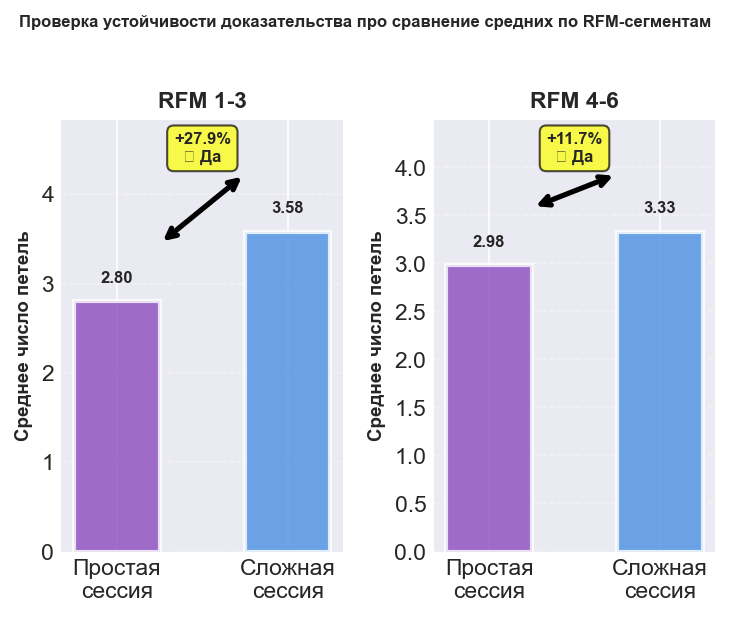

In [26]:
### Визуализация проверки устойчивости доказательства про сравнение средних по RFM-сегментам
fig, axes = plt.subplots(1, 2, figsize=(5, 4), dpi=150)
fig.suptitle('Проверка устойчивости доказательства про сравнение средних по RFM-сегментам', 
             fontsize=8, fontweight='bold', y=1.02)

for idx, rfm_group in enumerate(["1-3", "4-6"]):
    ax = axes[idx]
    
    # Получаем данные для этой RFM-группы
    rfm_row = robustness_table_1_rfm[robustness_table_1_rfm['RFM-группа'] == rfm_group].iloc[0]
    
    # Подготавливаем данные для графика
    session_types = ["Простая\nсессия", "Сложная\nсессия"]
    mean_loops = [rfm_row['Среднее (простая)'], rfm_row['Среднее (сложная)']]
    
    # Создаем столбчатую диаграмму с раздвинутыми барами
    x_pos = np.arange(len(session_types))
    bar_width = 0.5  # Уменьшенная ширина для раздвижения
    bars = ax.bar(x_pos, mean_loops, width=bar_width, color=COLORS, alpha=0.8, edgecolor='white', linewidth=2)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(session_types)
    
    ax.set_ylabel('Среднее число петель', fontsize=9, fontweight='bold')
    ax.set_title(f'RFM {rfm_group}', fontsize=11, fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Устанавливаем отступ сверху
    max_height = max(mean_loops)
    ax.set_ylim([0, max_height * 1.35])
    
    # Вычисляем процентное изменение
    mean_simple = rfm_row['Среднее (простая)']
    mean_complex = rfm_row['Среднее (сложная)']
    diff_mean = rfm_row['Разница']
    percent_change = ((mean_complex / mean_simple - 1) * 100) if mean_simple > 0 else 0
    
    # Добавляем значения на столбцы
    for i, (bar, mean_val) in enumerate(zip(bars, mean_loops)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + max_height * 0.05,
                f'{mean_val:.2f}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # Добавляем стрелку и процентное изменение
    x1 = bars[0].get_x() + bars[0].get_width()
    x2 = bars[1].get_x()
    y1 = mean_simple + max_height * 0.18  # Увеличено с 0.12 до 0.18 для более длинной стрелки
    y2 = mean_complex + max_height * 0.18  # Увеличено с 0.12 до 0.18 для более длинной стрелки
    mid_x = (x1 + x2) / 2
    mid_y = max(y1, y2) + max_height * 0.03
    
    # Рисуем стрелку
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='<->', color='black', lw=2.5))
    
    # Добавляем текст с процентным изменением
    sig_text = f"✓ {rfm_row['Значимость различия']}" if rfm_row['Значимость различия'] == 'Да' else f"✗ {rfm_row['Значимость различия']}"
    ax.text(mid_x, mid_y, f'+{percent_change:.1f}%\n{sig_text}',
            ha='center', va='bottom', fontsize=8, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.7, edgecolor='black', linewidth=1))

plt.tight_layout()
plt.show()

---

# БЛОК 3: ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

Данный блок содержит проверку гипотезы о зависимости конверсии от количества петель с ростом и последующим падением.

## 1. 📦 Импорты и настройки

В этом разделе загружаются необходимые библиотеки и настраиваются параметры визуализации.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import logit, ols
import warnings

warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Настройка pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Библиотеки загружены успешно!")


Библиотеки загружены успешно!


## 2. 📊 Загрузка данных и подготовка переменных

Загружаем данные и выполняем первичную обработку: агрегацию по сессиям и создание целевой переменной.


In [28]:
# ============================================================================
# Загрузка и первичная обработка данных
# ============================================================================

# Загрузка данных
df = pd.read_csv("data_clean.csv")

# Сортировка данных по сессиям и времени
df = df.sort_values(["session_id", "screen_dttm"])

# Преобразование дат
df['session_start_dt'] = pd.to_datetime(df['session_start_dt'])
df['screen_dttm'] = pd.to_datetime(df['screen_dttm'])

print(f"Размер датасета: {df.shape}")
print(f"Период данных: {df['session_start_dt'].min()} - {df['session_start_dt'].max()}")
print(f"Количество уникальных сессий: {df['session_id'].nunique():,}")


Размер датасета: (191041, 26)
Период данных: 2025-01-01 00:00:00 - 2025-09-30 00:00:00
Количество уникальных сессий: 31,697


In [29]:
# ============================================================================
# Агрегация данных по сессиям
# ============================================================================

# Удаление выбросов по количеству петель (верхний 0.5%)
looped = df.groupby(["session_id"])[["loops_count", "session_purchase_status"]].agg(
    status=("session_purchase_status", lambda x: int((x == "Успешные").any())),
    loops=("loops_count", lambda x: max(x))
)

# Агрегация данных по сессиям
session_level = df.groupby('session_id').agg({
    'loops_count': 'first',
    'conversion': 'max',
    'session_purchase_status': lambda x: (x == 'Успешные').any(),
    'client_segment': 'first',
    'client_gmv': 'first',
    'device_platform': 'first',
    'session_start_dt': 'first'
}).reset_index()

# Создание бинарной переменной конверсии
session_level['converted'] = session_level['conversion'].astype(int)

print(f"\nКоличество уникальных сессий после агрегации: {len(session_level):,}")
print(f"Общая конверсия: {session_level['converted'].mean()*100:.2f}%")



Количество уникальных сессий после агрегации: 31,697
Общая конверсия: 7.02%


In [30]:
# ============================================================================
# Анализ распределения количества петель
# ============================================================================

print("="*70)
print("ПРЕДАНАЛИЗ: РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ПЕТЕЛЬ")
print("="*70)

# Описательная статистика
print(f"\nСтатистика по количеству петель:")
print(session_level['loops_count'].describe())

# Распределение по количеству петель
print(f"\nРаспределение по количеству петель:")
loop_dist = session_level['loops_count'].value_counts().sort_index()
print(loop_dist.head(20))

# Конверсия по количеству петель
print(f"\nКонверсия по количеству петель:")
conversion_by_loops = session_level.groupby('loops_count')['converted'].agg(['mean', 'count']).reset_index()
conversion_by_loops.columns = ['loops_count', 'conversion_rate', 'count']
conversion_by_loops['conversion_pct'] = conversion_by_loops['conversion_rate'] * 100

print(conversion_by_loops)

# Точка перегиба
BREAKPOINT = 10

# Количество данных за точкой перегиба (loops_count > 10)
data_after_breakpoint = len(session_level[session_level['loops_count'] > BREAKPOINT])
total_data = len(session_level)
pct_data_after_breakpoint = round((data_after_breakpoint / total_data) * 100)
print(f"\nОколо {pct_data_after_breakpoint}% данных находится за точкой перегиба")

# Количество покупок за точкой перегиба (10 сессий включительно, т.е. >= 10)
purchases_after_breakpoint = session_level[(session_level['loops_count'] >= BREAKPOINT) & (session_level['converted'] == 1)]
num_purchases_after_breakpoint = len(purchases_after_breakpoint)
total_purchases = session_level['converted'].sum()
pct_purchases_after_breakpoint = round((num_purchases_after_breakpoint / total_purchases) * 100) if total_purchases > 0 else 0
print(f"Около {pct_purchases_after_breakpoint}% покупок находятся за точкой перегиба (10 сессий включительно)")


ПРЕДАНАЛИЗ: РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ПЕТЕЛЬ

Статистика по количеству петель:
count   31697.000
mean        0.851
std         1.769
min         0.000
25%         0.000
50%         0.000
75%         1.000
max        15.000
Name: loops_count, dtype: float64

Распределение по количеству петель:
loops_count
0     20488
1      5621
2      2301
3      1164
4       682
5       446
6       289
7       181
8       141
9       115
10       88
11       60
12       45
13       34
14       19
15       23
Name: count, dtype: int64

Конверсия по количеству петель:
    loops_count  conversion_rate  count  conversion_pct
0             0            0.017  20488           1.689
1             1            0.077   5621           7.703
2             2            0.171   2301          17.080
3             3            0.229   1164          22.852
4             4            0.304    682          30.352
5             5            0.377    446          37.668
6             6            0.405    289          40.

### График конверсии от количества петель


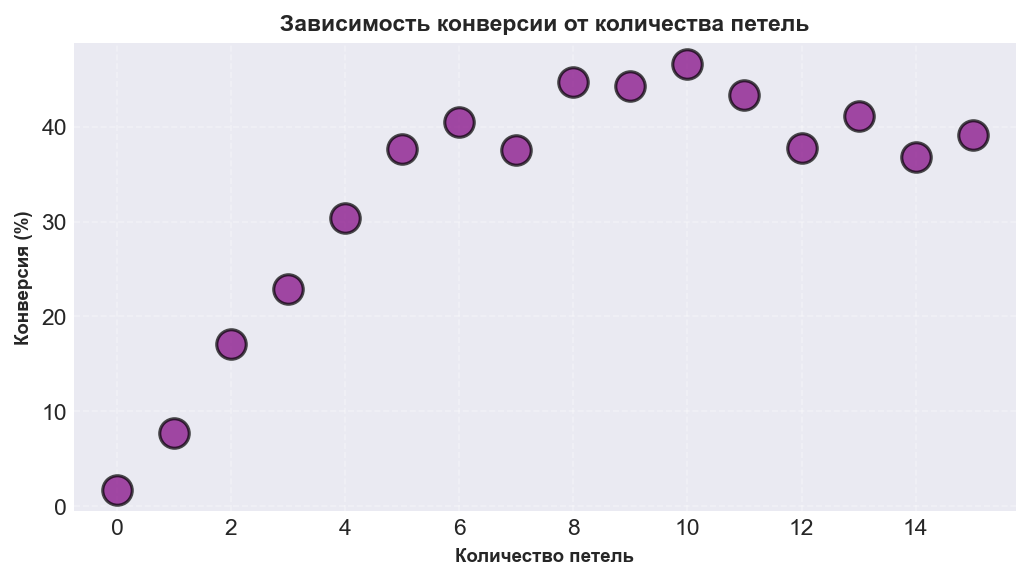

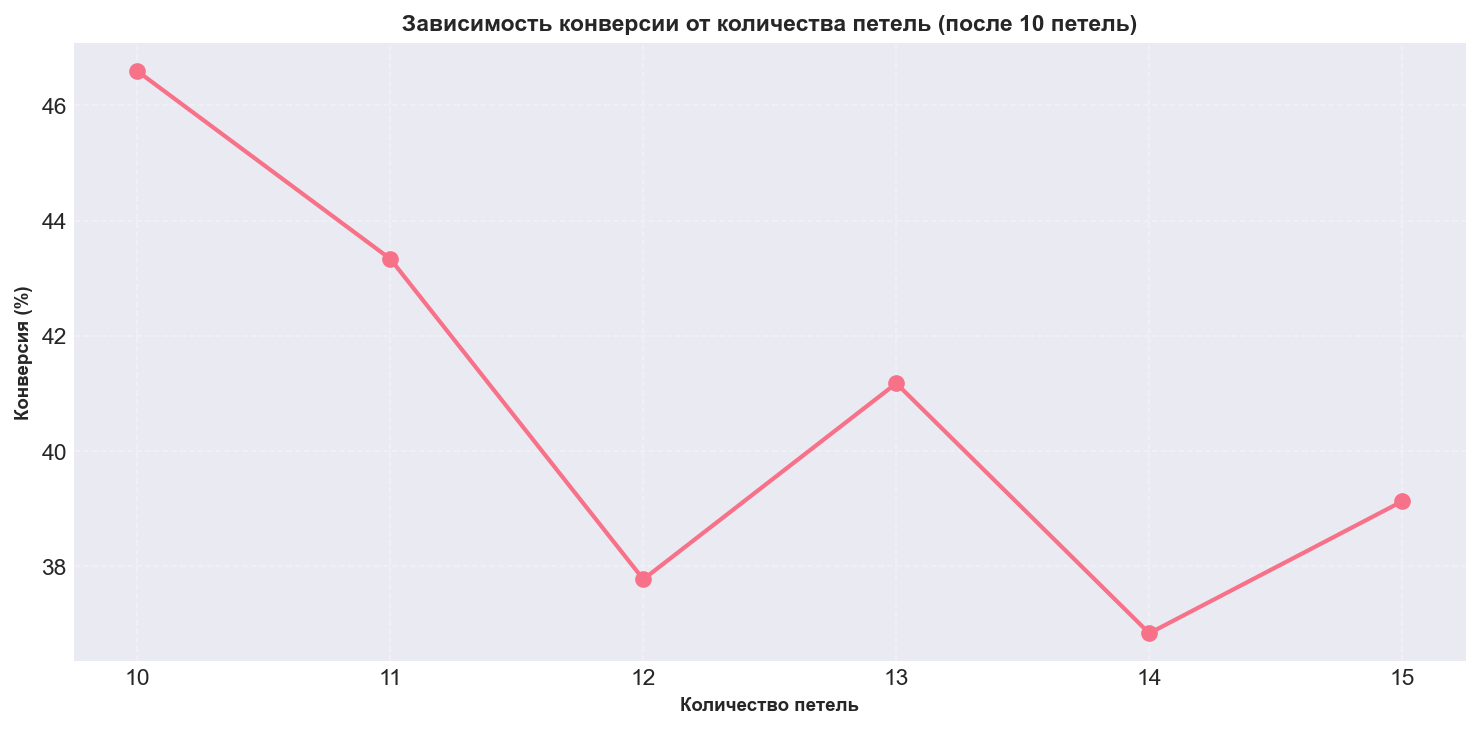

In [31]:
# ============================================================================
# График конверсии от количества петель (отдельный график)
# ============================================================================

fig, ax = plt.subplots(figsize=(7, 4), dpi=150)

# Scatter plot конверсии по количеству петель
ax.scatter(conversion_by_loops['loops_count'], conversion_by_loops['conversion_pct'], 
          s=200, alpha=0.7, edgecolors='black', linewidth=1.5, color='purple')

ax.set_xlabel('Количество петель', fontsize=9, fontweight='bold')
ax.set_ylabel('Конверсия (%)', fontsize=9, fontweight='bold')
ax.set_title('Зависимость конверсии от количества петель', 
            fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# График конверсии от количества петель (только после 10 петель)
# ============================================================================

# Фильтруем данные только после 10 петель
conversion_after_10 = conversion_by_loops[conversion_by_loops['loops_count'] >= 10]

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)

# Line plot с маркерами
ax.plot(
    conversion_after_10['loops_count'],
    conversion_after_10['conversion_pct'],
    marker='o',
    markersize=7,
    linewidth=2
)

ax.set_xlabel('Количество петель', fontsize=9, fontweight='bold')
ax.set_ylabel('Конверсия (%)', fontsize=9, fontweight='bold')
ax.set_title(
    'Зависимость конверсии от количества петель (после 10 петель)',
    fontsize=11,
    fontweight='bold'
)

ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## 3. 💡 Формулировка гипотезы и механизма

Формулируем основную гипотезу и теоретический механизм, объясняющий зависимость с ростом и последующим падением.

**Основная модель:** Кусочно-линейная логистическая регрессия с точкой перелома при 10 петлях.

### 3.1 📐 Математическая спецификация основной модели

**Кусочно-линейная логистическая регрессия** является основной моделью для проверки гипотезы о зависимости с ростом и последующим падением. Модель позволяет формально проверить наличие точки перелома и изменение наклона зависимости конверсии от количества петель.

**Математическая формулировка:**

$$
\text{logit}(P(\text{converted} = 1 | \text{loops})) = \beta_0 + \beta_1 \cdot \text{segment}_1 + \beta_2 \cdot \text{segment}_2
$$

где:
- $\text{segment}_1 = \min(\text{loops}, 10)$ — количество петель до точки перелома (включительно, диапазон [0, 10])
- $\text{segment}_2 = \max(0, \text{loops} - 10)$ — количество петель после точки перелома (диапазон [0, 5] для данных)

**Интерпретация коэффициентов:**
- $\beta_0$ — базовый log-odds конверсии при нулевом количестве петель
- $\beta_1$ — наклон зависимости до точки перелома (0-10 петель): изменение log-odds конверсии при увеличении количества петель на 1 в диапазоне [0, 10]
- $\beta_2$ — наклон зависимости после точки перелома (>10 петель): изменение log-odds конверсии при увеличении количества петель на 1 после 10 петель

**Гипотезы:**
- **H₁ (основная гипотеза):** $\beta_1 > 0$ и $\beta_2 < 0$ — зависимость имеет рост с последующим падением
- **H₀ (нулевая гипотеза):** $\beta_1 = \beta_2$ или $\beta_2 = 0$ — зависимость линейная или отсутствует

**Проверка падения после 10 петель:**
- Если $\beta_2 < 0$ и статистически значим (p < 0.05), то конверсия статистически значимо падает после 10 петель


## 4. 📊 ОСНОВНАЯ МОДЕЛЬ: Кусочно-линейная логистическая регрессия

**Кусочно-линейная логистическая регрессия** является основной моделью для проверки гипотезы о зависимости с ростом и последующим падением. Модель позволяет формально проверить наличие точки перелома при 10 петлях и изменение наклона зависимости конверсии от количества петель.

### 4.1 📐 Подробное описание модели

**Структура модели:**

Модель разделяет зависимость конверсии от количества петель на два линейных сегмента:

1. **Сегмент 1 (0-10 петель):** Рост конверсии с увеличением количества петель
   - Переменная: `segment1 = min(loops, 10)`
   - Коэффициент: $\beta_1$ — ожидается положительный (рост конверсии)
   - Интерпретация: каждый дополнительный цикл исследования в диапазоне [0, 10] увеличивает log-odds конверсии на $\beta_1$

2. **Сегмент 2 (>10 петель):** Падение конверсии с увеличением количества петель
   - Переменная: `segment2 = max(0, loops - 10)`
   - Коэффициент: $\beta_2$ — ожидается отрицательный (падение конверсии)
   - Интерпретация: каждый дополнительный цикл исследования после 10 петель уменьшает log-odds конверсии на $\beta_2$

**Преимущества кусочно-линейной модели:**
- Позволяет формально проверить наличие точки перелома
- Обеспечивает интерпретируемость коэффициентов
- Позволяет проверить статистическую значимость изменения наклона
- Более гибкая, чем полиномиальная модель, и не требует предположений о форме кривой


### 4.2 🔧 Подготовка данных для модели


In [32]:
# ============================================================================
# Подготовка данных для кусочно-линейной модели
# ============================================================================

# Проверка наличия необходимых переменных
if 'session_level' not in globals():
    raise NameError(
        "Переменная 'session_level' не определена. "
        "Пожалуйста, выполните предыдущие ячейки ноутбука, "
        "особенно ячейку, где создается session_level (обычно это ячейка с агрегацией данных по сессиям)."
    )

# Выбор переменных для модели
regression_data = session_level[['converted', 'loops_count', 'client_segment', 
                                  'client_gmv', 'device_platform']].copy()

# Удаление пропусков
regression_data = regression_data.dropna()

# Логарифм GMV для нормализации распределения
regression_data['log_gmv'] = np.log1p(regression_data['client_gmv'])

# Определяем точку перелома (10 петель)
BREAKPOINT = 10

print("="*70)
print("ПОДГОТОВКА ДАННЫХ ДЛЯ КУСОЧНО-ЛИНЕЙНОЙ МОДЕЛИ")
print("="*70)
print(f"\nТочка перелома: {BREAKPOINT} петель")
print(f"Количество наблюдений: {len(regression_data):,}")
print(f"Среднее количество петель: {regression_data['loops_count'].mean():.2f}")
print(f"Конверсия: {regression_data['converted'].mean()*100:.2f}%")

# Создаем переменные для кусочно-линейной регрессии
# Сегмент 1: до точки перелома (включительно)
# Сегмент 2: после точки перелома
regression_data['segment1'] = np.minimum(regression_data['loops_count'], BREAKPOINT)
regression_data['segment2'] = np.maximum(0, regression_data['loops_count'] - BREAKPOINT)

# Данные после точки перелома для дополнительных тестов
regression_data_after_breakpoint = regression_data[regression_data['loops_count'] >= BREAKPOINT].copy()

print(f"\nСтатистика по сегментам:")
print(f"  Сегмент 1 (до {BREAKPOINT}): min={regression_data['segment1'].min()}, max={regression_data['segment1'].max()}, mean={regression_data['segment1'].mean():.2f}")
print(f"  Сегмент 2 (после {BREAKPOINT}): min={regression_data['segment2'].min()}, max={regression_data['segment2'].max()}, mean={regression_data['segment2'].mean():.2f}")
print(f"  Наблюдений с segment2 > 0: {(regression_data['segment2'] > 0).sum():,}")
if len(regression_data_after_breakpoint) > 0:
    print(f"  Конверсия после точки перелома (>= {BREAKPOINT}): {regression_data_after_breakpoint['converted'].mean()*100:.2f}%")

# ============================================================================
# Проверка мультиколлинеарности (VIF)
# ============================================================================
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Подготовка данных для VIF (только числовые переменные)
# Проверяем VIF для переменных, которые будут использоваться в модели
vif_vars = ['segment1', 'segment2']
if 'log_gmv' in regression_data.columns:
    vif_vars.append('log_gmv')

# Создаем DataFrame с переменными для VIF
vif_data = regression_data[vif_vars].copy()

# Добавляем константу для расчета VIF
vif_data_with_const = add_constant(vif_data)

# Вычисляем VIF для каждой переменной
vif_results = []
for i, var in enumerate(vif_vars):
    vif_value = variance_inflation_factor(vif_data_with_const.values, i + 1)  # +1 из-за константы
    vif_results.append({
        'Переменная': var,
        'VIF': vif_value,
        'Мультиколлинеарность': 'Высокая (VIF > 10)' if vif_value > 10 else 'Умеренная (5 < VIF ≤ 10)' if vif_value > 5 else 'Низкая (VIF ≤ 5)'
    })

vif_df = pd.DataFrame(vif_results)

print("\n" + "="*70)
print("ПРОВЕРКА МУЛЬТИКОЛЛИНЕАРНОСТИ (VIF)")
print("="*70)
print("\nИнтерпретация VIF:")
print("  • VIF ≤ 5: низкая мультиколлинеарность")
print("  • 5 < VIF ≤ 10: умеренная мультиколлинеарность")
print("  • VIF > 10: высокая мультиколлинеарность (требует внимания)")
print("\nРезультаты:")
print(vif_df.to_string(index=False))

# Проверка на наличие проблем
high_vif = vif_df[vif_df['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\n⚠️  ВНИМАНИЕ: Обнаружена высокая мультиколлинеарность для переменных:")
    for _, row in high_vif.iterrows():
        print(f"   • {row['Переменная']}: VIF = {row['VIF']:.2f}")
else:
    print("\n✓ Мультиколлинеарность в допустимых пределах")


ПОДГОТОВКА ДАННЫХ ДЛЯ КУСОЧНО-ЛИНЕЙНОЙ МОДЕЛИ

Точка перелома: 10 петель
Количество наблюдений: 31,671
Среднее количество петель: 0.85
Конверсия: 7.03%

Статистика по сегментам:
  Сегмент 1 (до 10): min=0, max=10, mean=0.84
  Сегмент 2 (после 10): min=0, max=5, mean=0.01
  Наблюдений с segment2 > 0: 181
  Конверсия после точки перелома (>= 10): 42.38%

ПРОВЕРКА МУЛЬТИКОЛЛИНЕАРНОСТИ (VIF)

Интерпретация VIF:
  • VIF ≤ 5: низкая мультиколлинеарность
  • 5 < VIF ≤ 10: умеренная мультиколлинеарность
  • VIF > 10: высокая мультиколлинеарность (требует внимания)

Результаты:
Переменная   VIF Мультиколлинеарность
  segment1 1.150     Низкая (VIF ≤ 5)
  segment2 1.149     Низкая (VIF ≤ 5)
   log_gmv 1.001     Низкая (VIF ≤ 5)

✓ Мультиколлинеарность в допустимых пределах


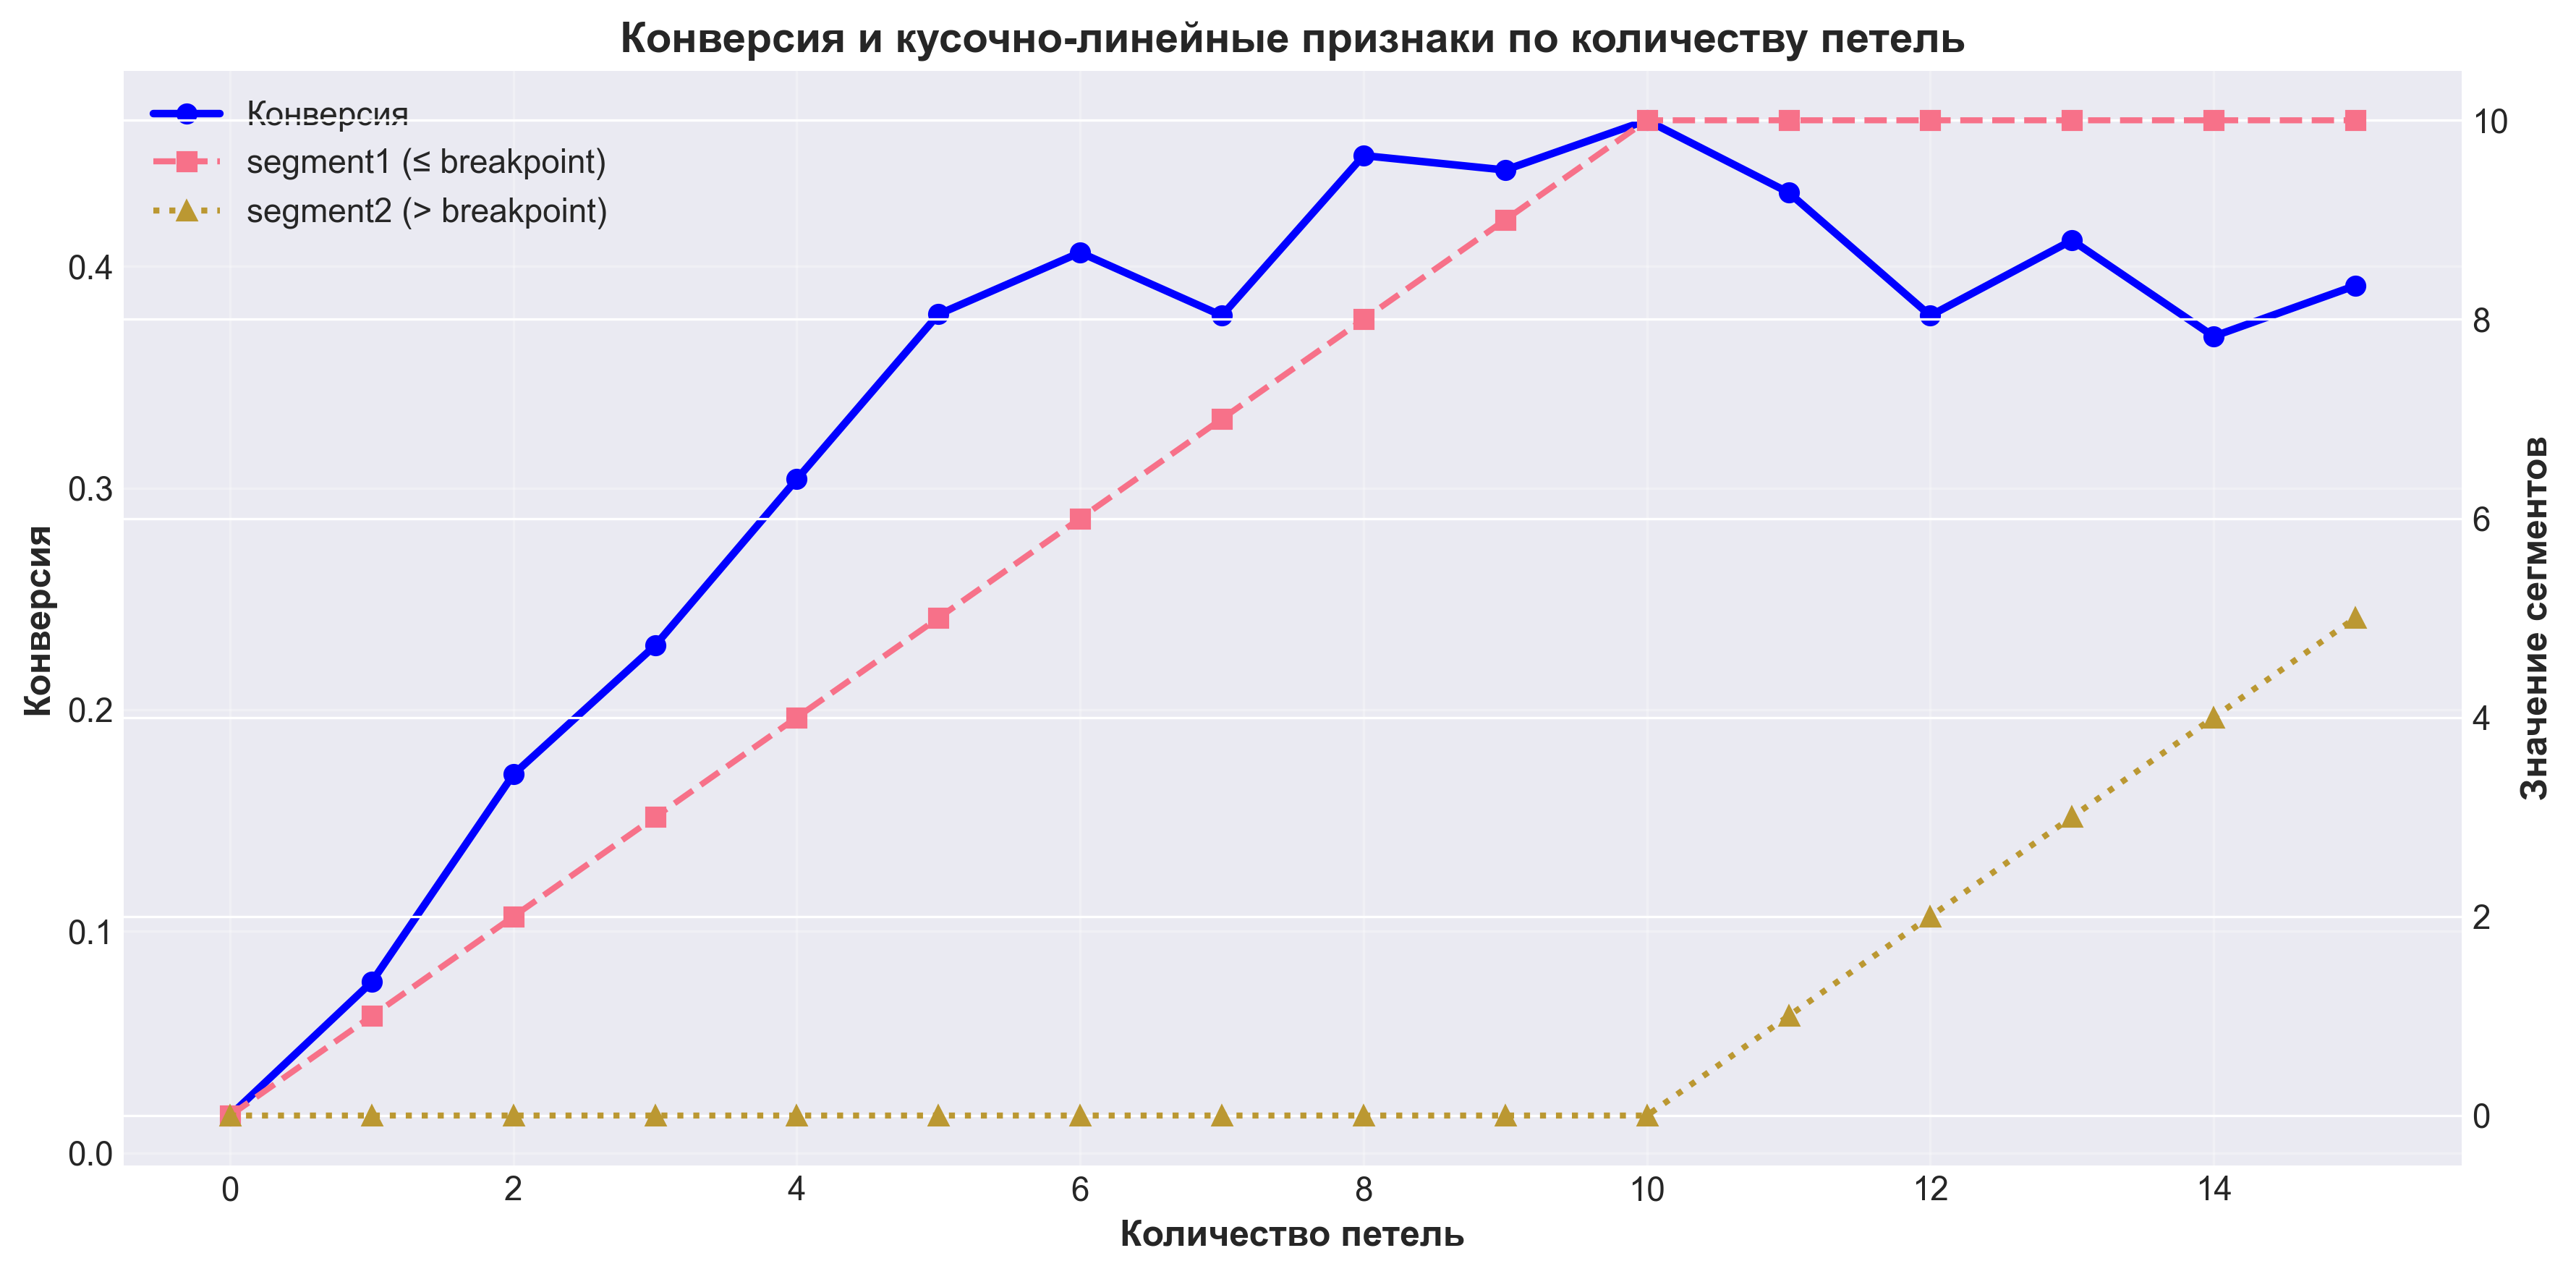

In [33]:
import matplotlib.pyplot as plt

# Агрегация по количеству петель
plot_data = (
    regression_data
    .groupby('loops_count')
    .agg({
        'converted': 'mean',
        'segment1': 'mean',
        'segment2': 'mean'
    })
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Левая ось Y: конверсия ---
ax1.plot(
    plot_data['loops_count'],
    plot_data['converted'],
    marker='o',
    linewidth=2.5,
    label='Конверсия',
    color='blue'
)
ax1.set_xlabel('Количество петель', fontsize=12, fontweight='bold')
ax1.set_ylabel('Конверсия', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# --- Правая ось Y: segment1 и segment2 ---
ax2 = ax1.twinx()
ax2.plot(
    plot_data['loops_count'],
    plot_data['segment1'],
    linestyle='--',
    marker='s',
    linewidth=2,
    label='segment1 (≤ breakpoint)'
)
ax2.plot(
    plot_data['loops_count'],
    plot_data['segment2'],
    linestyle=':',
    marker='^',
    linewidth=2,
    label='segment2 (> breakpoint)'
)

ax2.set_ylabel('Значение сегментов', fontsize=12, fontweight='bold')

# Общая легенда
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title(
    'Конверсия и кусочно-линейные признаки по количеству петель',
    fontsize=14,
    fontweight='bold'
)
plt.tight_layout()
plt.show()


### 4.3 🔬 Оценка кусочно-линейной модели

Оцениваем параметры кусочно-линейной модели и проверяем статистическую значимость коэффициентов.


In [34]:
# ============================================================================
# Оценка кусочно-линейной модели с cluster-robust стандартными ошибками
# ============================================================================

print("="*70)
print("ОСНОВНАЯ МОДЕЛЬ: КУСОЧНО-ЛИНЕЙНАЯ РЕГРЕССИЯ")
print("="*70)

# Проверяем наличие переменных для кластеризации
# Обычно кластеризация делается по client_id (если у одного клиента несколько сессий)
# или по session_id (если данные не полностью агрегированы)

# Создаем копию данных для работы с cluster-robust стандартными ошибками
regression_data_robust = regression_data.copy()

cluster_var = None
if 'client_id' in regression_data_robust.columns:
    cluster_var = 'client_id'
    print(f"\nКластеризация по: client_id")
    print(f"Количество уникальных кластеров: {regression_data_robust['client_id'].nunique():,}")
elif 'session_id' in regression_data_robust.columns:
    cluster_var = 'session_id'
    print(f"\nКластеризация по: session_id")
    print(f"Количество уникальных кластеров: {regression_data_robust['session_id'].nunique():,}")
else:
    # Пытаемся получить client_id или session_id из session_level
    if 'session_level' in globals():
        if 'client_id' in session_level.columns:
            # Объединяем client_id из session_level
            regression_data_robust = regression_data_robust.reset_index()
            if 'session_id' in regression_data_robust.columns:
                regression_data_robust = regression_data_robust.merge(
                    session_level[['session_id', 'client_id']].reset_index(),
                    on='session_id',
                    how='left'
                )
            else:
                # Используем индекс для объединения
                regression_data_robust = regression_data_robust.merge(
                    session_level[['client_id']].reset_index(),
                    left_index=True,
                    right_index=True,
                    how='left'
                )
            cluster_var = 'client_id'
            print(f"\nКластеризация по: client_id (получено из session_level)")
            print(f"Количество уникальных кластеров: {regression_data_robust['client_id'].nunique():,}")
        elif 'session_id' in session_level.index.names or 'session_id' in session_level.columns:
            # Используем session_id
            regression_data_robust = regression_data_robust.reset_index()
            if 'session_id' not in regression_data_robust.columns:
                regression_data_robust['session_id'] = regression_data_robust.index
            cluster_var = 'session_id'
            print(f"\nКластеризация по: session_id")
            print(f"Количество уникальных кластеров: {regression_data_robust['session_id'].nunique():,}")

if cluster_var is None:
    print("\n⚠️  ВНИМАНИЕ: Не найдена переменная для кластеризации (client_id или session_id)")
    print("   Используется обычная модель без cluster-robust стандартных ошибок")
    # Строим обычную модель
    model_piecewise = logit('converted ~ segment1 + segment2', data=regression_data).fit()
else:
    # Удаляем пропуски в переменной кластеризации
    regression_data_robust = regression_data_robust.dropna(subset=[cluster_var]).copy()
    
    if len(regression_data_robust) < len(regression_data):
        print(f"\n⚠️  Удалено {len(regression_data) - len(regression_data_robust)} наблюдений с пропусками в {cluster_var}")
    
    # Строим модель с cluster-robust стандартными ошибками
    model_piecewise = logit(
        'converted ~ segment1 + segment2', 
        data=regression_data_robust
    ).fit(
        cov_type='cluster',
        cov_kwds={'groups': regression_data_robust[cluster_var]},
        disp=0
    )

print(f"\n{'='*70}")
print("РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ")
print(f"{'='*70}")
print(model_piecewise.summary())

# Извлекаем коэффициенты и их значимость
coef_segment1 = model_piecewise.params['segment1']
coef_segment2 = model_piecewise.params['segment2']
coef_intercept = model_piecewise.params['Intercept']
p_value_segment1 = model_piecewise.pvalues['segment1']
p_value_segment2 = model_piecewise.pvalues['segment2']
conf_int_segment1 = model_piecewise.conf_int().loc['segment1']
conf_int_segment2 = model_piecewise.conf_int().loc['segment2']

print(f"\n{'='*70}")
print("ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ")
print(f"{'='*70}")
print(f"\nТочка перелома: {BREAKPOINT} петель")
print(f"\nСЕГМЕНТ 1 (до {BREAKPOINT} петель включительно):")
print(f"  β₁ (segment1) = {coef_segment1:.6f}")
print(f"  P-value: {p_value_segment1:.6f}")
print(f"  95% доверительный интервал: [{conf_int_segment1[0]:.6f}, {conf_int_segment1[1]:.6f}]")
if p_value_segment1 < 0.05:
    print(f"  ✓ Статистически значим (p < 0.05)")
    print(f"  → При увеличении количества петель на 1 в диапазоне [0, {BREAKPOINT}],")
    print(f"    log-odds конверсии увеличивается на {coef_segment1:.4f}")
    print(f"  → Конверсия РАСТЕТ до точки перелома")
else:
    print(f"  ✗ Не значим (p >= 0.05)")

print(f"\nСЕГМЕНТ 2 (после {BREAKPOINT} петель):")
print(f"  β₂ (segment2) = {coef_segment2:.6f}")
print(f"  P-value: {p_value_segment2:.6f}")
print(f"  95% доверительный интервал: [{conf_int_segment2[0]:.6f}, {conf_int_segment2[1]:.6f}]")
if p_value_segment2 < 0.05:
    print(f"  ✓ Статистически значим (p < 0.05)")
    if coef_segment2 < 0:
        print(f"  → При увеличении количества петель на 1 после {BREAKPOINT},")
        print(f"    log-odds конверсии УМЕНЬШАЕТСЯ на {abs(coef_segment2):.4f}")
        print(f"  → Конверсия ПАДАЕТ после точки перелома ✓")
    else:
        print(f"  → Конверсия увеличивается после точки перелома (противоречит гипотезе)")
else:
    print(f"  ✗ Не значим (p >= 0.05)")

print(f"\n{'='*70}")


ОСНОВНАЯ МОДЕЛЬ: КУСОЧНО-ЛИНЕЙНАЯ РЕГРЕССИЯ

Кластеризация по: session_id
Количество уникальных кластеров: 31,671

РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                31671
Model:                          Logit   Df Residuals:                    31668
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jan 2026   Pseudo R-squ.:                  0.1663
Time:                        22:32:45   Log-Likelihood:                -6714.6
converged:                       True   LL-Null:                       -8053.8
Covariance Type:              cluster   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3164      0.029   -116.311      0.000      -3.372    

In [35]:
# ============================================================================
# ПРОВЕРКА ЭКЗОГЕННОСТИ РЕГРЕССОРОВ
# ============================================================================

print("\n" + "="*70)
print("ПРОВЕРКА ЭКЗОГЕННОСТИ РЕГРЕССОРОВ")
print("="*70)

from scipy.stats import pearsonr, chi2

# Получаем предсказанные значения и остатки
y_pred = model_piecewise.predict(regression_data_robust[['segment1', 'segment2']])
y_actual = regression_data_robust['converted'].values

# Для логистической регрессии используем остатки Пирсона
# Остатки Пирсона: (y - y_pred) / sqrt(y_pred * (1 - y_pred))
pearson_residuals = (y_actual - y_pred) / np.sqrt(np.maximum(y_pred * (1 - y_pred), 1e-10))

# ТЕСТ 1: Корреляция между регрессорами и остатками
print("\n" + "-"*70)
print("ТЕСТ 1: КОРРЕЛЯЦИЯ МЕЖДУ РЕГРЕССОРАМИ И ОСТАТКАМИ")
print("-"*70)

corr_segment1, p_corr_segment1 = pearsonr(regression_data_robust['segment1'].values, pearson_residuals)
corr_segment2, p_corr_segment2 = pearsonr(regression_data_robust['segment2'].values, pearson_residuals)

print(f"\nКорреляция segment1 с остатками:")
print(f"  Коэффициент корреляции: {corr_segment1:.6f}")
print(f"  P-value: {p_corr_segment1:.6f}")
if p_corr_segment1 < 0.05 and corr_segment1 > 0.05:
    print(f"  ⚠️  Статистически значимая корреляция (p < 0.05) - возможна эндогенность")
elif corr_segment1 < 0.05:
    print(f"  ✓  Статистически значимая малая корреляция (< 0.05) - экзогенность не отвергается")
else:
    print(f"  ✓ Нет значимой корреляции (p >= 0.05) - экзогенность не отвергается")

print(f"\nКорреляция segment2 с остатками:")
print(f"  Коэффициент корреляции: {corr_segment2:.6f}")
print(f"  P-value: {p_corr_segment2:.6f}")
if p_corr_segment2 < 0.05 and corr_segment2 > 0.05:
    print(f"  ⚠️  Статистически значимая корреляция (p < 0.05) - возможна эндогенность")
elif corr_segment2 < 0.05 and p_corr_segment2 < 0.05:
    print(f"  ✓  Статистически значимая малая корреляция (< 0.05) - экзогенность не отвергается")
else:
    print(f"  ✓ Нет значимой корреляции (p >= 0.05) - экзогенность не отвергается")




ПРОВЕРКА ЭКЗОГЕННОСТИ РЕГРЕССОРОВ

----------------------------------------------------------------------
ТЕСТ 1: КОРРЕЛЯЦИЯ МЕЖДУ РЕГРЕССОРАМИ И ОСТАТКАМИ
----------------------------------------------------------------------

Корреляция segment1 с остатками:
  Коэффициент корреляции: 0.030137
  P-value: 0.000000
  ✓  Статистически значимая малая корреляция (< 0.05) - экзогенность не отвергается

Корреляция segment2 с остатками:
  Коэффициент корреляции: 0.004284
  P-value: 0.445825
  ✓ Нет значимой корреляции (p >= 0.05) - экзогенность не отвергается


### 4.4 📉 ДОКАЗАТЕЛЬСТВО ПАДЕНИЯ КОНВЕРСИИ ПОСЛЕ 10 ПЕТЕЛЬ

Проводим комплексную проверку гипотезы о падении конверсии после 10 петель с использованием различных статистических тестов. Доказательство состоит из двух независимых тестов, которые проверяют гипотезу с разных сторон.

**Структура доказательства:**

1. **ТЕСТ 1:** Проверка отрицательного коэффициента $\beta_2$ (segment2)
   - Гипотеза: H₀: $\beta_2 = 0$ vs H₁: $\beta_2 < 0$
   - Если $\beta_2 < 0$ и статистически значим, то конверсия падает после точки перелома

2. **ТЕСТ 2:** Проверка смены наклона (перелом в точке 10)
   - Гипотеза: H₀: $\beta_2 = \beta_1$ vs H₁: $\beta_2 \neq \beta_1$
   - Wald-тест и LR-тест для проверки изменения наклона


In [36]:
# ============================================================================
# ДОКАЗАТЕЛЬСТВО ПАДЕНИЯ ПОСЛЕ 10 ПЕТЕЛЬ: Комплексная проверка
# ============================================================================

print("="*70)
print("ДОКАЗАТЕЛЬСТВО ПАДЕНИЯ КОНВЕРСИИ ПОСЛЕ 10 ПЕТЕЛЬ")
print("="*70)

from scipy.stats import chi2

# ============================================================================
# ТЕСТ 1: Проверка отрицательного коэффициента β₂
# ============================================================================

print(f"\n{'='*70}")
print("ТЕСТ 1: ОТРИЦАТЕЛЬНЫЙ КОЭФФИЦИЕНТ β₂ (segment2)")
print(f"{'='*70}")
print(f"\nГипотеза:")
print(f"  H₀: β₂ = 0  (нет эффекта после точки перелома)")
print(f"  H₁: β₂ < 0  (конверсия падает после точки перелома)")

print(f"\nРезультаты:")
print(f"  β₂ = {coef_segment2:.6f}")
print(f"  P-value (двусторонний): {p_value_segment2:.6f}")
print(f"  P-value (односторонний): {p_value_segment2/2:.6f}")
print(f"  95% доверительный интервал: [{conf_int_segment2[0]:.6f}, {conf_int_segment2[1]:.6f}]")

if p_value_segment2 < 0.05:
    if coef_segment2 < 0:
        print(f"\n✓ ТЕСТ 1 ПРОЙДЕН: β₂ < 0 и статистически значим (p={p_value_segment2:.6f} < 0.05)")
        print(f"  → Конверсия статистически значимо падает после {BREAKPOINT} петель")
    else:
        print(f"\n✗ ТЕСТ 1 НЕ ПРОЙДЕН: β₂ > 0 (противоречит гипотезе)")
else:
    print(f"\n✗ ТЕСТ 1 НЕ ПРОЙДЕН: β₂ не значим (p={p_value_segment2:.6f} >= 0.05)")

# ============================================================================
# ТЕСТ 2: Проверка смены наклона (β₂ ≠ β₁)
# ============================================================================

print(f"\n{'='*70}")
print("ТЕСТ 2: СМЕНА НАКЛОНА (β₂ ≠ β₁)")
print(f"{'='*70}")
print(f"\nГипотеза:")
print(f"  H₀: β₂ = β₁  (наклон не изменился, нет перелома)")
print(f"  H₁: β₂ ≠ β₁  (наклон изменился, есть перелом)")

# Разница коэффициентов
coef_diff = coef_segment2 - coef_segment1
print(f"\nРазница коэффициентов: β₂ - β₁ = {coef_segment2:.6f} - {coef_segment1:.6f} = {coef_diff:.6f}")

# Wald-тест на равенство коэффициентов
wald_test_result = model_piecewise.wald_test("segment1 = segment2")
wald_stat = float(wald_test_result.statistic)
p_value_wald = float(wald_test_result.pvalue)

# Стандартная ошибка разности
cov_matrix = model_piecewise.cov_params()
var_diff = cov_matrix.loc['segment2', 'segment2'] + cov_matrix.loc['segment1', 'segment1'] - 2 * cov_matrix.loc['segment2', 'segment1']
se_diff = np.sqrt(var_diff)

print(f"\nWald-тест:")
print(f"  Статистика: {wald_stat:.6f}")
print(f"  P-value: {p_value_wald:.6f}")
print(f"  Стандартная ошибка разности: {se_diff:.6f}")
print(f"  95% доверительный интервал для (β₂ - β₁): [{coef_diff - 1.96*se_diff:.6f}, {coef_diff + 1.96*se_diff:.6f}]")

# LR-тест (сравнение с ограниченной моделью)
model_restricted = logit('converted ~ loops_count', data=regression_data).fit(disp=0)
lr_stat = 2 * (model_piecewise.llf - model_restricted.llf)
p_value_lr = 1 - chi2.cdf(lr_stat, df=1)

print(f"\nLR-тест (Likelihood Ratio):")
print(f"  Log-Likelihood неограниченной модели: {model_piecewise.llf:.4f}")
print(f"  Log-Likelihood ограниченной модели: {model_restricted.llf:.4f}")
print(f"  LR-статистика: {lr_stat:.6f}")
print(f"  P-value: {p_value_lr:.6f}")

if p_value_wald < 0.05:
    print(f"\n✓ ТЕСТ 2 ПРОЙДЕН: Наклон статистически значимо изменился (p={p_value_wald:.6f} < 0.05)")
    if coef_diff < 0:
        print(f"  → Наклон снизился: β₂ ({coef_segment2:.4f}) < β₁ ({coef_segment1:.4f})")
    else:
        print(f"  → Наклон увеличился: β₂ ({coef_segment2:.4f}) > β₁ ({coef_segment1:.4f})")
else:
    print(f"\n✗ ТЕСТ 2 НЕ ПРОЙДЕН: Наклон не изменился (p={p_value_wald:.6f} >= 0.05)")

# ============================================================================
# ИТОГОВЫЕ ВЫВОДЫ
# ============================================================================

print(f"\n{'='*70}")
print("ИТОГОВЫЕ ВЫВОДЫ ПО ДОКАЗАТЕЛЬСТВУ ПАДЕНИЯ ПОСЛЕ 10 ПЕТЕЛЬ")
print(f"{'='*70}")

tests_passed = 0
tests_total = 2

if p_value_segment2 < 0.05 and coef_segment2 < 0:
    tests_passed += 1
if p_value_wald < 0.05:
    tests_passed += 1

print(f"\nПройдено тестов: {tests_passed} из {tests_total}")

if tests_passed >= 2:
    print(f"\n✓✓✓ ГИПОТЕЗА ПОДТВЕРЖДЕНА: Конверсия статистически значимо падает после {BREAKPOINT} петель")
    print(f"   Доказательства:")
    if p_value_segment2 < 0.05 and coef_segment2 < 0:
        print(f"   ✓ Отрицательный коэффициент β₂ (p={p_value_segment2:.6f})")
    if p_value_wald < 0.05:
        print(f"   ✓ Смена наклона в точке перелома (p={p_value_wald:.6f})")
elif tests_passed == 1:
    print(f"\n⚠️  ГИПОТЕЗА ЧАСТИЧНО ПОДТВЕРЖДЕНА: {tests_passed} из {tests_total} тестов пройдено")
else:
    print(f"\n✗ ГИПОТЕЗА НЕ ПОДТВЕРЖДЕНА: {tests_passed} из {tests_total} тестов пройдено")

print(f"{'='*70}")


ДОКАЗАТЕЛЬСТВО ПАДЕНИЯ КОНВЕРСИИ ПОСЛЕ 10 ПЕТЕЛЬ

ТЕСТ 1: ОТРИЦАТЕЛЬНЫЙ КОЭФФИЦИЕНТ β₂ (segment2)

Гипотеза:
  H₀: β₂ = 0  (нет эффекта после точки перелома)
  H₁: β₂ < 0  (конверсия падает после точки перелома)

Результаты:
  β₂ = -0.657086
  P-value (двусторонний): 0.000000
  P-value (односторонний): 0.000000
  95% доверительный интервал: [-0.816671, -0.497501]

✓ ТЕСТ 1 ПРОЙДЕН: β₂ < 0 и статистически значим (p=0.000000 < 0.05)
  → Конверсия статистически значимо падает после 10 петель

ТЕСТ 2: СМЕНА НАКЛОНА (β₂ ≠ β₁)

Гипотеза:
  H₀: β₂ = β₁  (наклон не изменился, нет перелома)
  H₁: β₂ ≠ β₁  (наклон изменился, есть перелом)

Разница коэффициентов: β₂ - β₁ = -0.657086 - 0.492531 = -1.149616

Wald-тест:
  Статистика: 176.949471
  P-value: 0.000000
  Стандартная ошибка разности: 0.086423
  95% доверительный интервал для (β₂ - β₁): [-1.319005, -0.980228]

LR-тест (Likelihood Ratio):
  Log-Likelihood неограниченной модели: -6714.5552
  Log-Likelihood ограниченной модели: -6857.8337
  L

### 📊 Важное замечание о визуализации коэффициентов

**Почему отрицательный коэффициент β₂ больше по модулю, хотя подъем выглядит круче?**

В логистической регрессии коэффициенты β₁ и β₂ измеряют изменение в **log-odds** (логарифм шансов), а не напрямую в вероятности. На графике мы видим **предсказанные вероятности**, которые получаются через нелинейное логит-преобразование:

$$P = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot segment_1 + \beta_2 \cdot segment_2)}}$$

**Из-за нелинейности логит-преобразования:**
- В области **низких вероятностей** (0.05-0.10): одинаковое изменение в log-odds приводит к более заметному визуальному изменению вероятности
- В области **средних вероятностей** (0.10-0.15): то же изменение в log-odds приводит к менее заметному изменению вероятности

**Пример:**
- При базовой вероятности ~0.05: увеличение log-odds на 0.49 (β₁) может увеличить вероятность до ~0.10 (визуально крутой подъем)
- При базовой вероятности ~0.10: уменьшение log-odds на 0.66 (|β₂|) может уменьшить вероятность до ~0.05 (визуально более пологий спад)

**Вывод:** Визуальный угол на графике вероятностей не равен углу на графике log-odds. Коэффициенты β₁ и β₂ корректно измеряют изменение в log-odds. Хотя |β₂| > |β₁| (падение в log-odds сильнее, чем был рост), визуально подъем выглядит круче из-за нелинейности логит-преобразования: в области низких вероятностей одинаковое изменение в log-odds приводит к более заметному изменению вероятности, чем в области средних вероятностей.


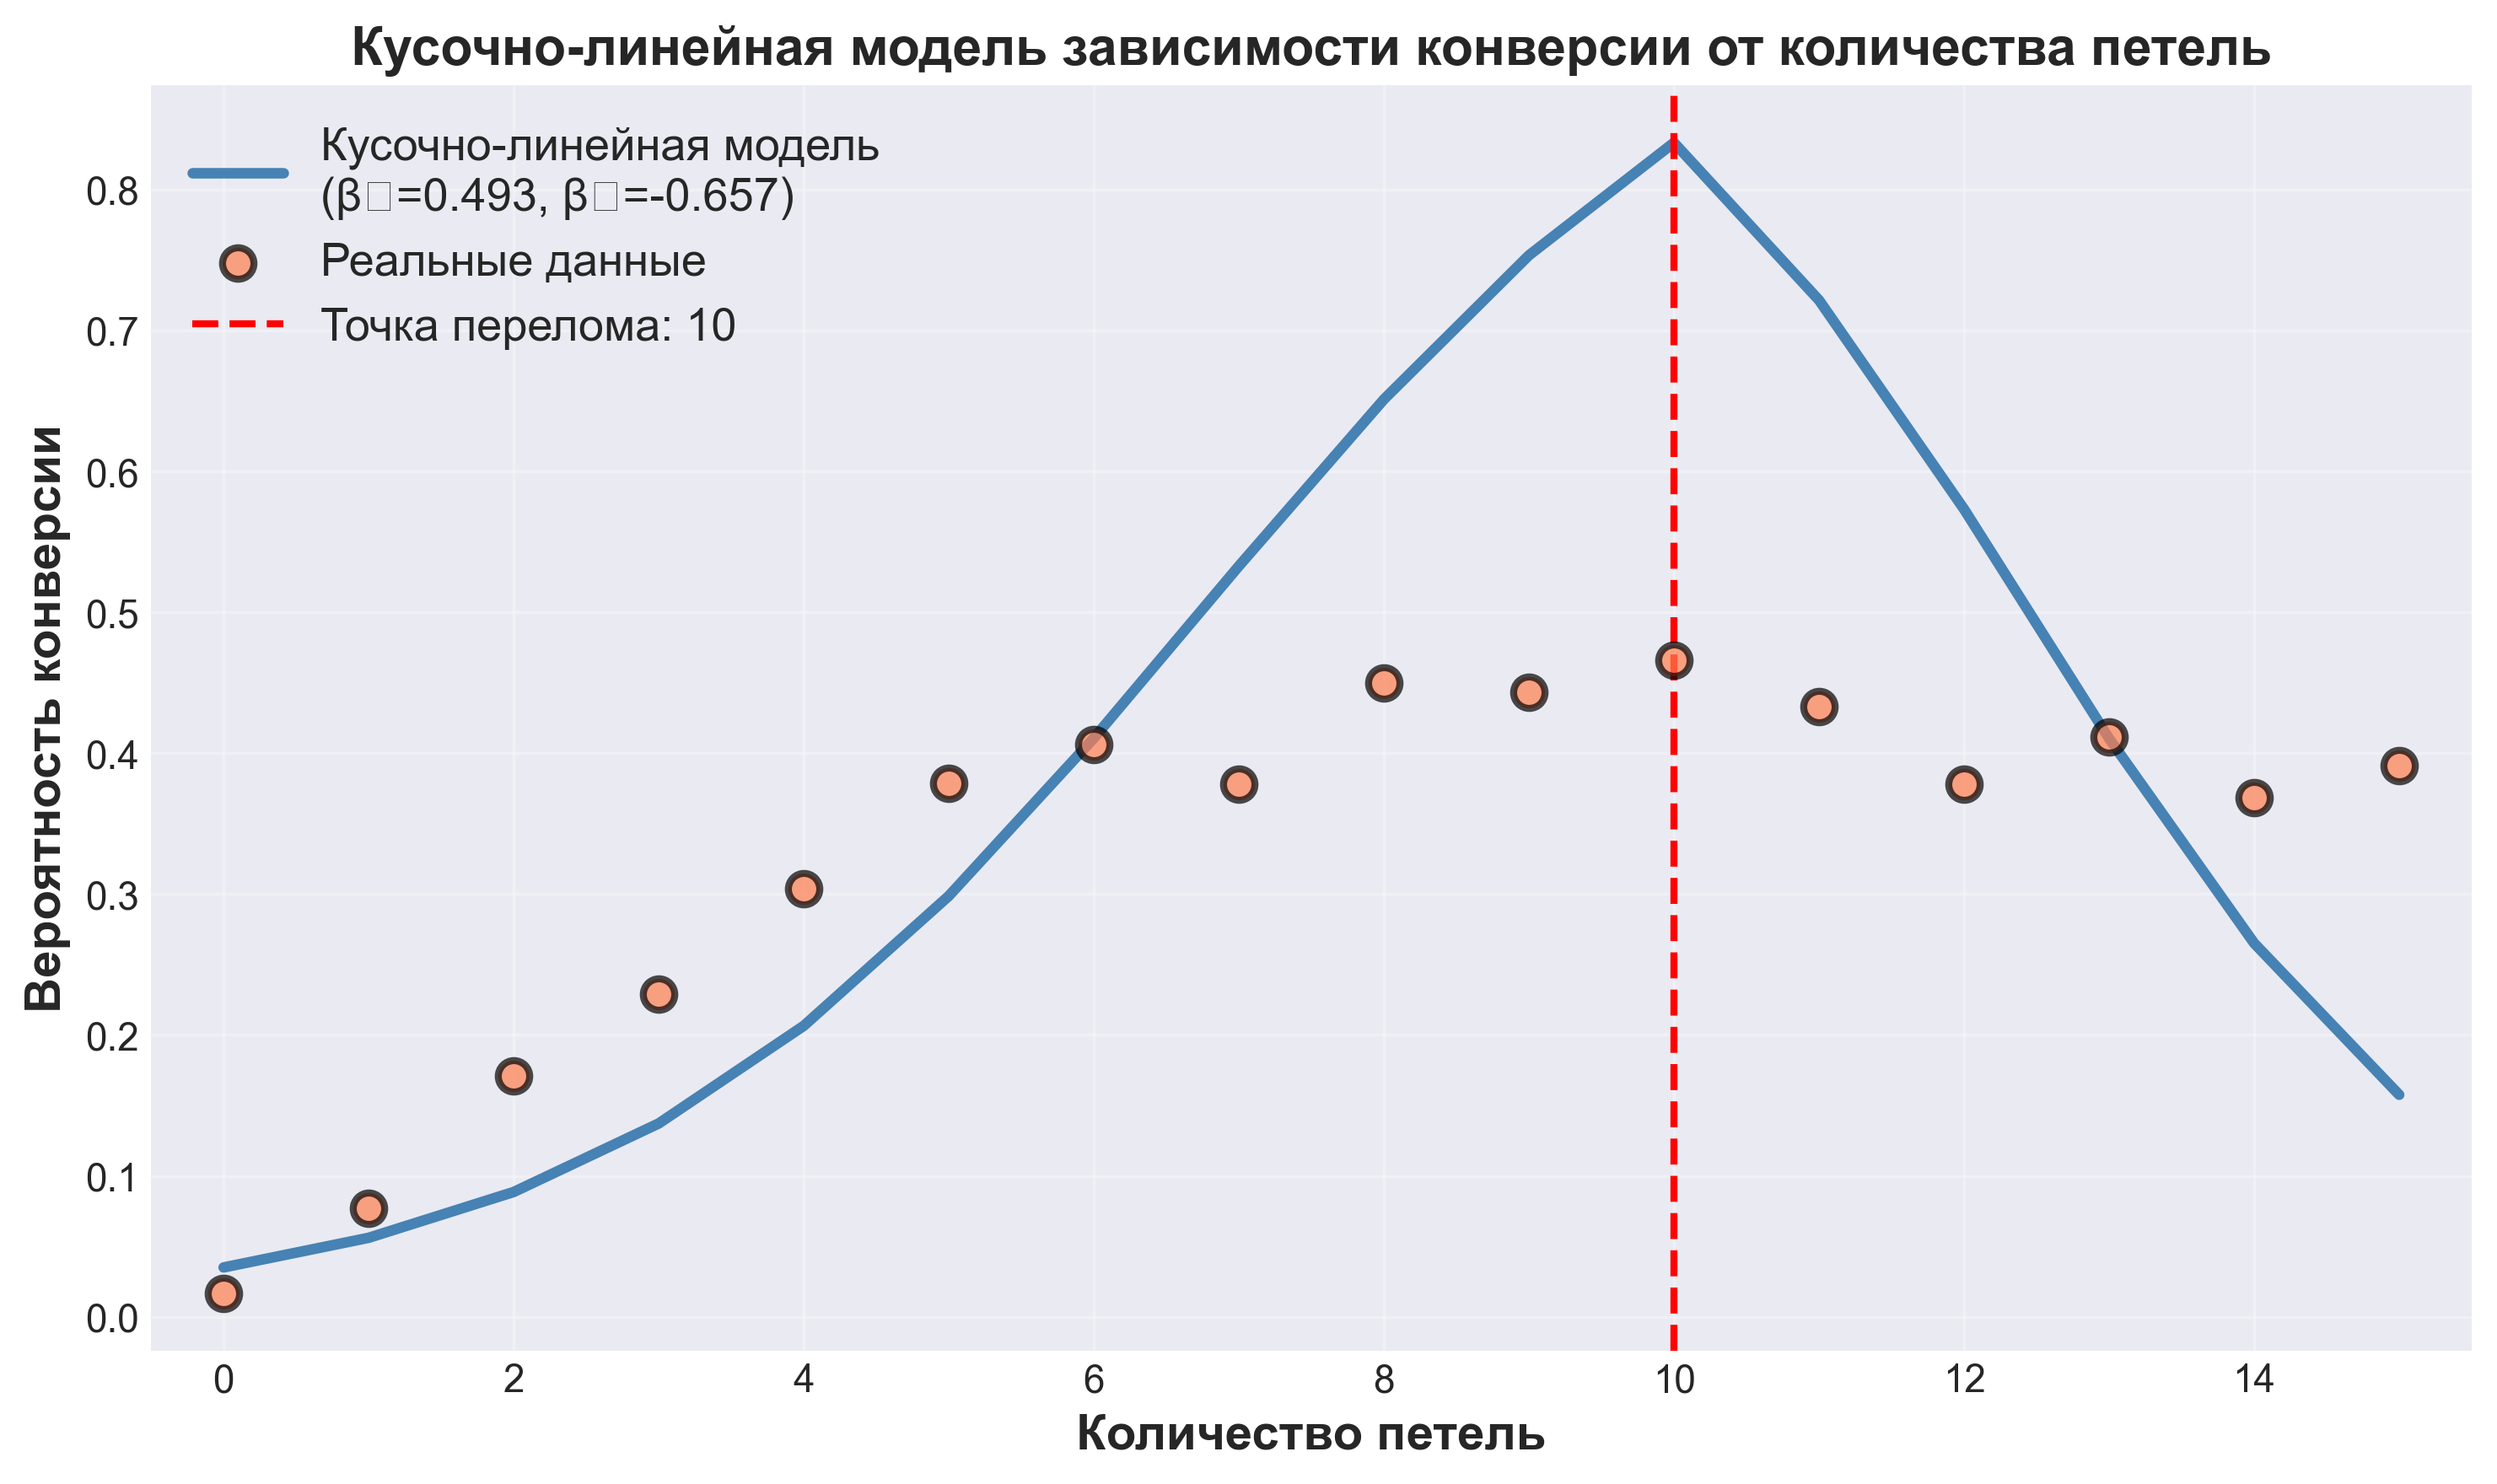

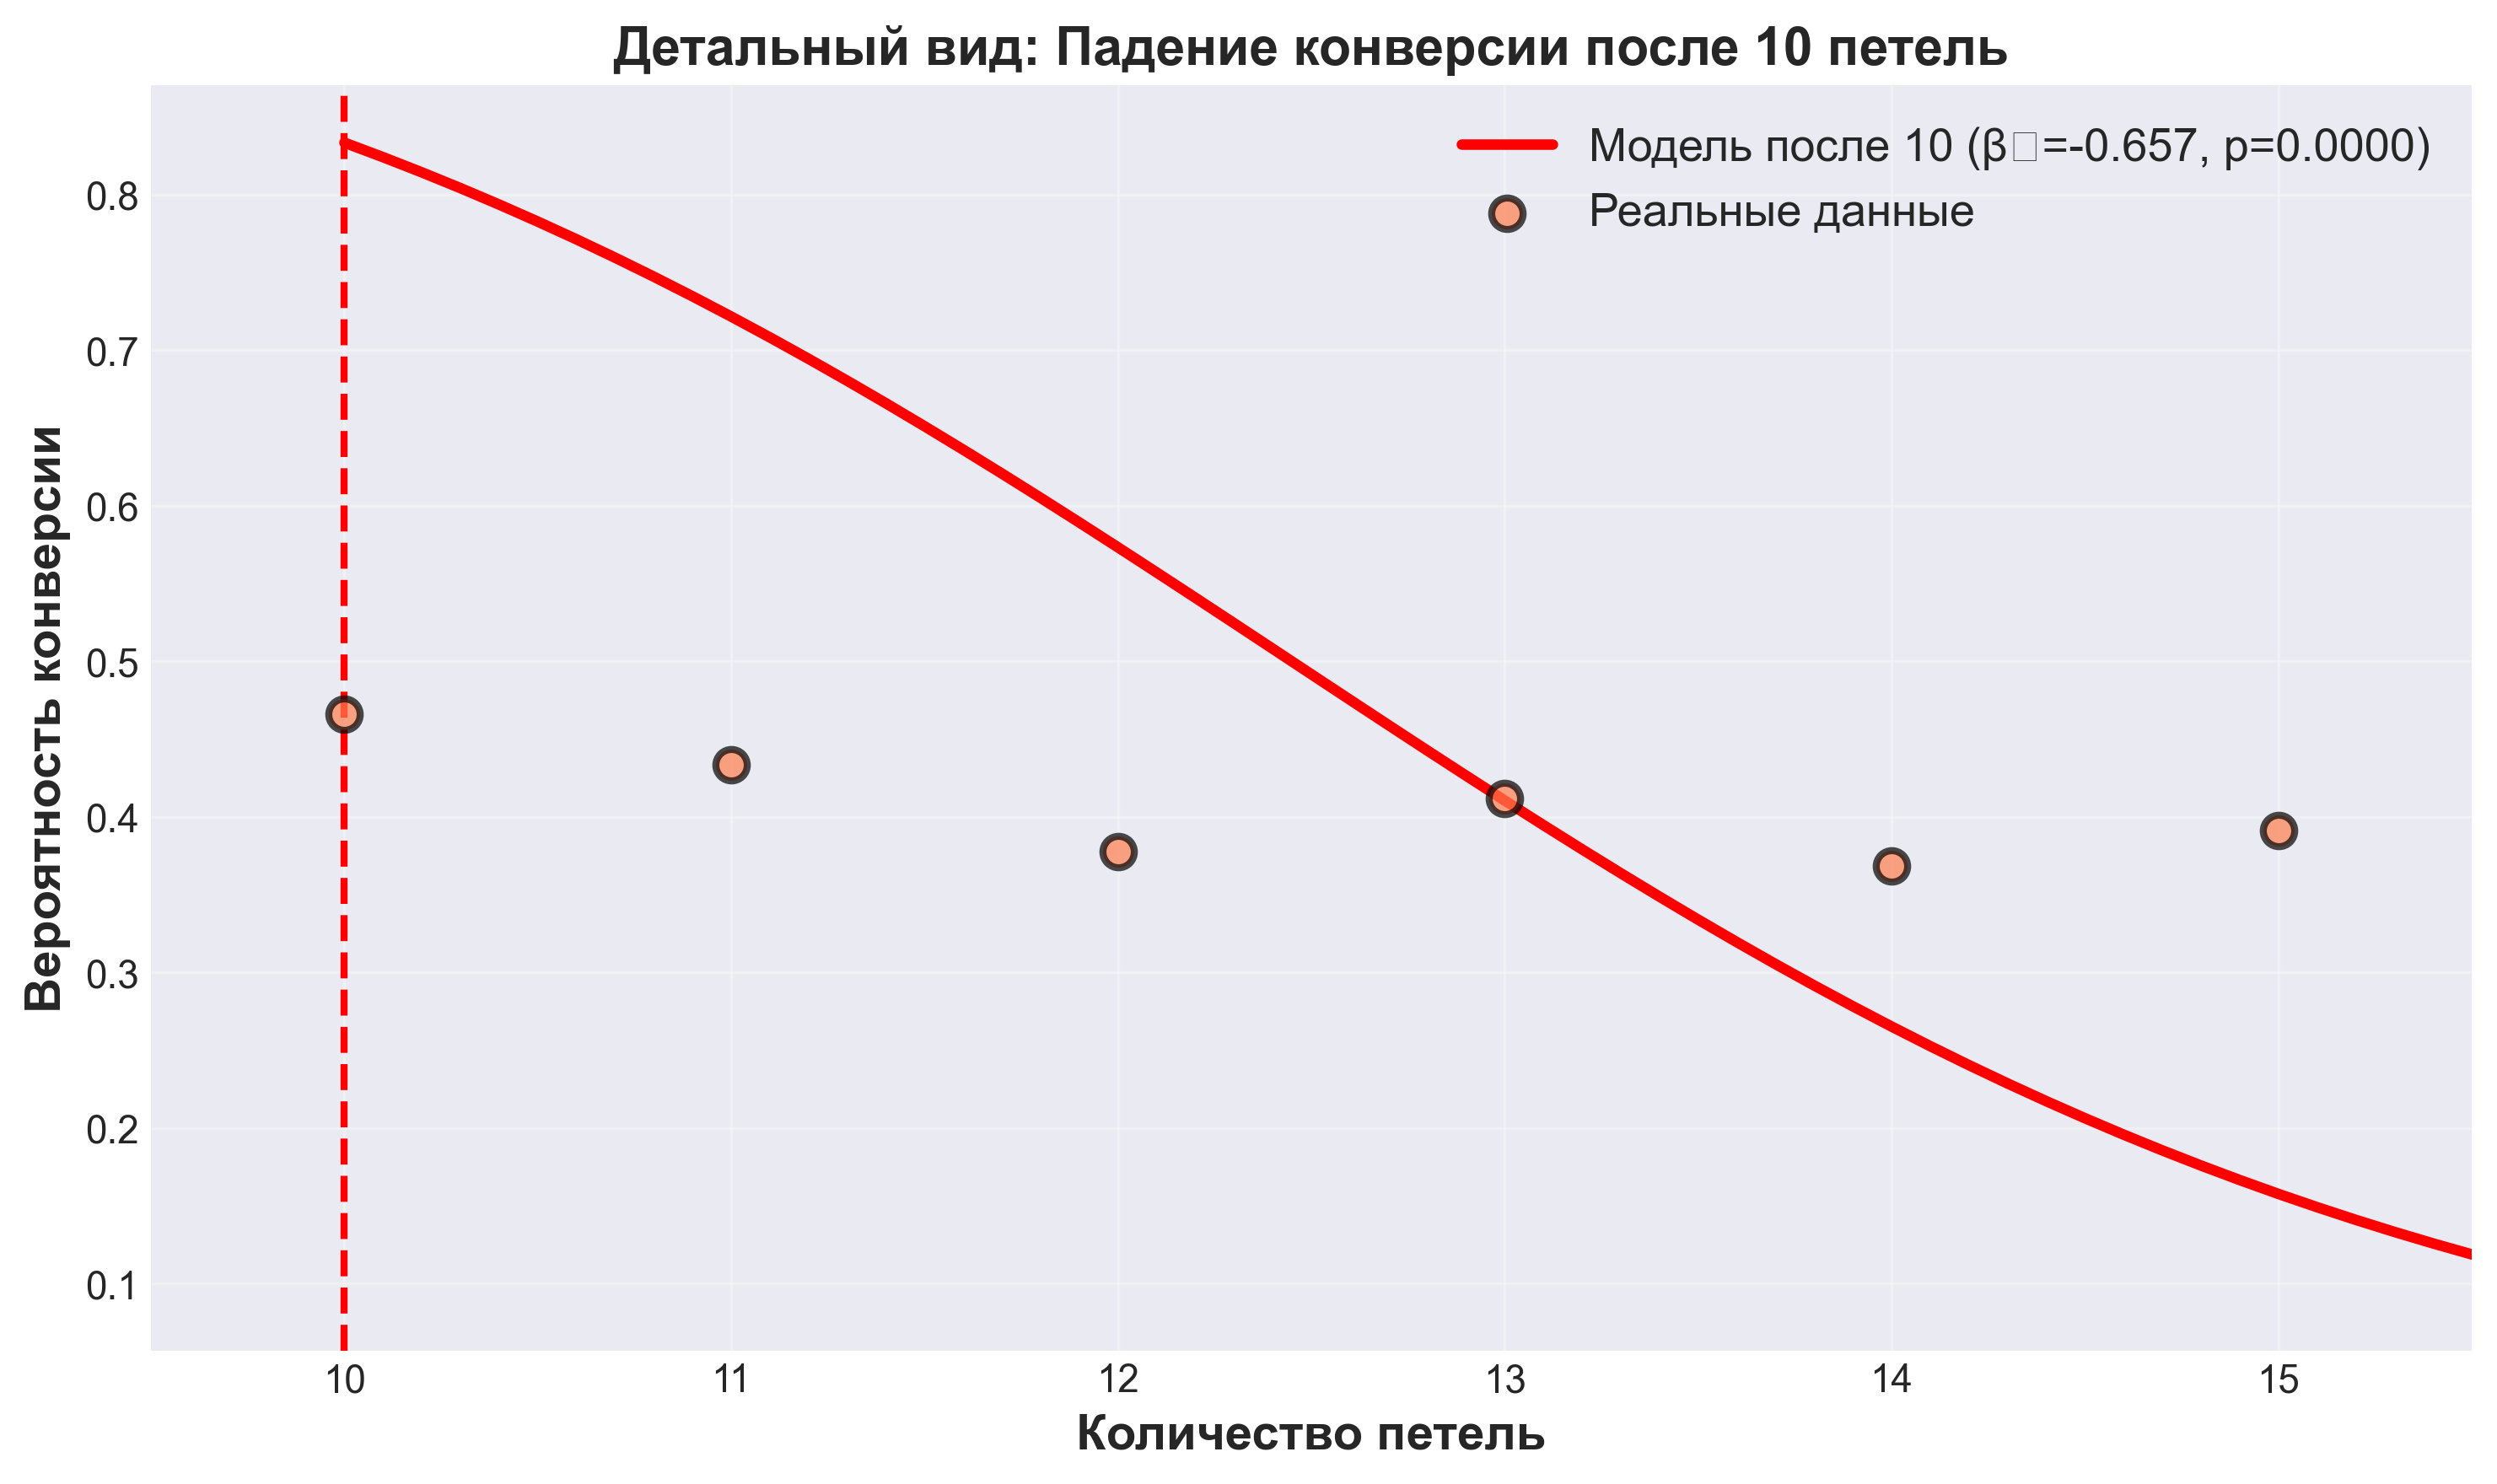

In [37]:
# ============================================================================
# Визуализация кусочно-линейной модели и доказательства падения
# ============================================================================

# График 1: Кусочно-линейная модель с данными
loops_range = np.arange(0, 16)
X_pred = pd.DataFrame({
    'loops_count': loops_range,
    'segment1': np.minimum(loops_range, BREAKPOINT),
    'segment2': np.maximum(0, loops_range - BREAKPOINT)
})
predicted = model_piecewise.predict(X_pred)

# Агрегированные данные
agg_data = regression_data.groupby('loops_count')['converted'].agg(['mean', 'count']).reset_index()
agg_data = agg_data[agg_data['count'] >= 5]  # Минимум 5 наблюдений

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(loops_range, predicted, linewidth=3, color='steelblue', 
                label=f'Кусочно-линейная модель\n(β₁={coef_segment1:.3f}, β₂={coef_segment2:.3f})')
ax1.scatter(agg_data['loops_count'], agg_data['mean'], 
                   s=80, alpha=0.7, edgecolors='black', linewidth=2,
                   label='Реальные данные', color='coral', zorder=5)
ax1.axvline(x=BREAKPOINT, color='red', linestyle='--', linewidth=2, 
                   label=f'Точка перелома: {BREAKPOINT}')
ax1.set_xlabel('Количество петель', fontsize=14, fontweight='bold')
ax1.set_ylabel('Вероятность конверсии', fontsize=14, fontweight='bold')
ax1.set_title('Кусочно-линейная модель зависимости конверсии от количества петель', 
                     fontsize=15, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=13, loc='best')
ax1.set_xlim([-0.5, 15.5])  # Сжатие по оси X
plt.tight_layout()
plt.show()

# График 2: Детальный вид после точки перелома
loops_range_after = np.arange(BREAKPOINT, 16, 0.1)
X_pred_after = pd.DataFrame({
    'loops_count': loops_range_after,
    'segment1': np.minimum(loops_range_after, BREAKPOINT),
    'segment2': np.maximum(0, loops_range_after - BREAKPOINT)
})
predicted_after = model_piecewise.predict(X_pred_after)

agg_after = regression_data[regression_data['loops_count'] >= BREAKPOINT].groupby('loops_count')['converted'].agg(['mean', 'count']).reset_index()
agg_after = agg_after[agg_after['count'] >= 3]

fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(loops_range_after, predicted_after, linewidth=3, color='red', 
                label=f'Модель после {BREAKPOINT} (β₂={coef_segment2:.3f}, p={p_value_segment2:.4f})')
ax2.scatter(agg_after['loops_count'], agg_after['mean'], 
                   s=80, alpha=0.7, edgecolors='black', linewidth=2,
                   label='Реальные данные', color='coral', zorder=5)
ax2.axvline(x=BREAKPOINT, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Количество петель', fontsize=14, fontweight='bold')
ax2.set_ylabel('Вероятность конверсии', fontsize=14, fontweight='bold')
ax2.set_title(f'Детальный вид: Падение конверсии после {BREAKPOINT} петель', 
                    fontsize=15, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=13, loc='best')
ax2.set_xlim([BREAKPOINT - 0.5, 15.5])  # Сжатие по оси X
plt.tight_layout()
plt.show()


## 5. 🛡️ ПРОВЕРКА УСТОЙЧИВОСТИ ПО ПОДВЫБОРКАМ

Проверяем устойчивость основной модели (кусочно-линейной регрессии с точкой перелома при 10 петлях) на подвыборках RFM-сегментов. Устойчивость модели означает, что основные выводы (рост конверсии до 10 петель и падение после 10 петель) сохраняются в разных подгруппах клиентов.

Проверка выполняется на двух подвыборках:
- **Подвыборка 1-3:** объединенные RFM-сегменты 1, 2, 3
- **Подвыборка 4-6:** объединенные RFM-сегменты 4, 5, 6

### 5.1 📊 Описание проверки устойчивости

**Методология:**

Для каждой подвыборки с достаточным количеством наблюдений (минимум 20 наблюдений после точки перелома) мы:

1. **Оцениваем кусочно-линейную модель** для данной подвыборки (объединенные сегменты)
2. **Проверяем статистическую значимость** коэффициентов $\beta_1$ и $\beta_2$
3. **Проверяем гипотезу о падении после 10 петель:**
   - Отрицательный и значимый $\beta_2$
   - Смена наклона (Wald-тест: $\beta_2 \neq \beta_1$)

**Критерии устойчивости:**
- Модель считается устойчивой для подвыборки, если хотя бы 2 из 3 тестов подтверждают падение после 10 петель
- Если для большинства подвыборок модель устойчива, то основной вывод считается робастным

**Ожидаемые результаты:**
- Для подвыборок с достаточным количеством данных после 10 петель ожидается подтверждение падения конверсии
- Для подвыборок с малым количеством данных после 10 петель проверка может быть нестатистически значимой из-за недостаточной мощности теста


In [38]:
# ============================================================================
# ПРОВЕРКА УСТОЙЧИВОСТИ КУСОЧНО-ЛИНЕЙНОЙ МОДЕЛИ ПО RFM-СЕГМЕНТАМ
# ============================================================================

print("="*70)
print("ПРОВЕРКА УСТОЙЧИВОСТИ КУСОЧНО-ЛИНЕЙНОЙ МОДЕЛИ ПО ПОДВЫБОРКАМ")
print("="*70)

# Убеждаемся, что client_segment есть в regression_data
if 'client_segment' not in regression_data.columns:
    # Используем индекс session_level для merge
    regression_data = regression_data.reset_index()
    if 'session_id' in regression_data.columns:
        regression_data = regression_data.merge(
            session_level[['session_id', 'client_segment']].reset_index(), 
            on='session_id', 
            how='left'
        )
    else:
        # Если нет session_id, используем индекс
        regression_data = regression_data.merge(
            session_level[['client_segment']].reset_index(), 
            left_index=True, 
            right_index=True, 
            how='left'
        )

# Фильтруем данные с известными RFM-сегментами
regression_data_rfm = regression_data[regression_data['client_segment'].notna()].copy()

# Точка перелома (та же, что в основной модели)
BREAKPOINT_RFM = BREAKPOINT

print(f"\nТочка перелома: {BREAKPOINT_RFM} петель")

# Распределение по сегментам
print(f"\nРаспределение по RFM-сегментам:")
segment_counts = regression_data_rfm['client_segment'].value_counts().sort_index()
print(segment_counts)

# Создаем список для хранения результатов
robustness_results = []

# Определяем переменную для кластеризации (для cluster-robust стандартных ошибок)
cluster_var = None
if 'client_id' in regression_data_rfm.columns:
    cluster_var = 'client_id'
    print(f"\nКластеризация по: client_id")
    print(f"Количество уникальных кластеров: {regression_data_rfm['client_id'].nunique():,}")
elif 'session_id' in regression_data_rfm.columns:
    cluster_var = 'session_id'
    print(f"\nКластеризация по: session_id")
    print(f"Количество уникальных кластеров: {regression_data_rfm['session_id'].nunique():,}")
else:
    # Пытаемся получить client_id или session_id из session_level
    if 'session_level' in globals():
        if 'client_id' in session_level.index.names or 'client_id' in session_level.columns:
            regression_data_rfm = regression_data_rfm.reset_index()
            if 'session_id' in regression_data_rfm.columns:
                regression_data_rfm = regression_data_rfm.merge(
                    session_level[['client_id']].reset_index(),
                    on='session_id',
                    how='left'
                )
            else:
                regression_data_rfm = regression_data_rfm.merge(
                    session_level[['client_id']].reset_index(),
                    left_index=True,
                    right_index=True,
                    how='left'
                )
            cluster_var = 'client_id'
            print(f"\nКластеризация по: client_id (получено из session_level)")
            print(f"Количество уникальных кластеров: {regression_data_rfm['client_id'].nunique():,}")
        elif 'session_id' in session_level.index.names or 'session_id' in session_level.columns:
            regression_data_rfm = regression_data_rfm.reset_index()
            if 'session_id' not in regression_data_rfm.columns:
                regression_data_rfm['session_id'] = regression_data_rfm.index
            cluster_var = 'session_id'
            print(f"\nКластеризация по: session_id")
            print(f"Количество уникальных кластеров: {regression_data_rfm['session_id'].nunique():,}")

if cluster_var is None:
    print("\n⚠️  ВНИМАНИЕ: Не найдена переменная для кластеризации (client_id или session_id)")
    print("   Используется обычная модель без cluster-robust стандартных ошибок")

# Определяем подвыборки для проверки: 1-3 и 4-6
subsamples = [
    {'name': '1-3', 'segments': [1, 2, 3]},
    {'name': '4-6', 'segments': [4, 5, 6]}
]

# Проверяем устойчивость кусочно-линейной модели для каждой подвыборки
for subsample in subsamples:
    subsample_name = subsample['name']
    subsample_segments = subsample['segments']
    
    # Фильтруем данные по подвыборке (объединяем сегменты)
    segment_data = regression_data_rfm[
        regression_data_rfm['client_segment'].isin(subsample_segments)
    ].copy()
    
    # Проверяем, достаточно ли данных (минимум 50 наблюдений для кусочно-линейной модели)
    if len(segment_data) < 50:
        print(f"\nПодвыборка {subsample_name}: недостаточно данных (n={len(segment_data)})")
        robustness_results.append({
            'Подвыборка': f'{subsample_name}',
            'β₁ (segment1)': np.nan,
            'β₁ p-value': np.nan,
            'β₂ (segment2)': np.nan,
            'β₂ p-value': np.nan,
            'Wald тест (β₂≠β₁)': np.nan,
            'Wald p-value': np.nan
        })
        continue
    
    # Данные после точки перелома для данной подвыборки
    segment_data_after_breakpoint = segment_data[segment_data['loops_count'] > BREAKPOINT_RFM].copy()
    
    # Проверяем, достаточно ли данных после точки перелома (минимум 20 наблюдений)
    if len(segment_data_after_breakpoint) < 20:
        print(f"\nПодвыборка {subsample_name}: недостаточно данных после точки перелома (n={len(segment_data_after_breakpoint)})")
        robustness_results.append({
            'Подвыборка': f'{subsample_name}',
            'β₁ (segment1)': np.nan,
            'β₁ p-value': np.nan,
            'β₂ (segment2)': np.nan,
            'β₂ p-value': np.nan,
            'Wald тест (β₂≠β₁)': np.nan,
            'Wald p-value': np.nan
        })
        continue
    
    try:
        # Создаем переменные для кусочно-линейной регрессии
        segment_data['segment1'] = np.minimum(segment_data['loops_count'], BREAKPOINT_RFM)
        segment_data['segment2'] = np.maximum(0, segment_data['loops_count'] - BREAKPOINT_RFM)
        
        # Строим кусочно-линейную логистическую регрессию с cluster-robust стандартными ошибками
        if cluster_var is not None and cluster_var in segment_data.columns:
            # Удаляем пропуски в переменной кластеризации
            segment_data_robust = segment_data.dropna(subset=[cluster_var]).copy()
            
            if len(segment_data_robust) < len(segment_data):
                print(f"\n⚠️  Подвыборка {subsample_name}: удалено {len(segment_data) - len(segment_data_robust)} наблюдений с пропусками в {cluster_var}")
            
            # Строим модель с cluster-robust стандартными ошибками
            model_piecewise_segment = logit(
                'converted ~ segment1 + segment2', 
                data=segment_data_robust
            ).fit(
                cov_type='cluster',
                cov_kwds={'groups': segment_data_robust[cluster_var]},
                disp=0
            )
        else:
            # Строим обычную модель (если нет переменной для кластеризации)
            model_piecewise_segment = logit('converted ~ segment1 + segment2', data=segment_data).fit(disp=0)
        
        # Извлекаем коэффициенты и их значимость
        coef_segment1 = model_piecewise_segment.params['segment1']
        coef_segment2 = model_piecewise_segment.params['segment2']
        p_value_segment1 = model_piecewise_segment.pvalues['segment1']
        p_value_segment2 = model_piecewise_segment.pvalues['segment2']
        conf_int_segment1 = model_piecewise_segment.conf_int().loc['segment1']
        conf_int_segment2 = model_piecewise_segment.conf_int().loc['segment2']
        
        # ТЕСТ 1: Проверка отрицательного коэффициента β₂
        test1_passed = (p_value_segment2 < 0.05) and (coef_segment2 < 0)
        
        # ТЕСТ 2: Wald-тест на смену наклона (β₂ ≠ β₁)
        wald_test_result = model_piecewise_segment.wald_test("segment1 = segment2")
        wald_stat = float(wald_test_result.statistic)
        p_value_wald = float(wald_test_result.pvalue)
        test2_passed = p_value_wald < 0.05
        
        # Подсчет пройденных тестов
        tests_passed = sum([test1_passed, test2_passed])
        
        # Определение устойчивости
        if tests_passed == 2:
            robustness = 'Да (2 теста)'
        elif tests_passed == 1:
            robustness = 'Частично (1 тест)'
        else:
            robustness = 'Нет'
        
        robustness_results.append({
            'Подвыборка': f'{subsample_name}',
            'β₁ (segment1)': round(coef_segment1, 4),
            'β₁ p-value': round(p_value_segment1, 4),
            'β₂ (segment2)': round(coef_segment2, 4),
            'β₂ p-value': round(p_value_segment2, 4),
            'Wald тест (β₂≠β₁)': round(wald_stat, 4),
            'Wald p-value': round(p_value_wald, 4)
        })
        
        print(f"\n{'='*70}")
        print(f"Подвыборка {subsample_name} (сегменты {subsample_segments})")
        print(f"{'='*70}")
        print(f"\nКоэффициенты кусочно-линейной модели:")
        print(f"  β₁ (segment1) = {coef_segment1:.6f}, p-value = {p_value_segment1:.6f}")
        print(f"  β₂ (segment2) = {coef_segment2:.6f}, p-value = {p_value_segment2:.6f}")
        print(f"\nТесты падения после {BREAKPOINT_RFM} петель:")
        print(f"  ТЕСТ 1 (β₂ < 0): {'✓' if test1_passed else '✗'}")
        print(f"  ТЕСТ 2 (Wald: β₂ ≠ β₁): {'✓' if test2_passed else '✗'} (p={p_value_wald:.6f})")
        
    except Exception as e:
        print(f"\nПодвыборка {subsample_name}: ошибка при построении модели - {str(e)}")
        robustness_results.append({
            'Подвыборка': f'{subsample_name}',
            'β₁ (segment1)': np.nan,
            'β₁ p-value': np.nan,
            'β₂ (segment2)': np.nan,
            'β₂ p-value': np.nan,
            'Wald тест (β₂≠β₁)': np.nan,
            'Wald p-value': np.nan
        })

# Создаем таблицу результатов
robustness_table = pd.DataFrame(robustness_results)

print("\n" + "="*70)
print("ТАБЛИЦА РЕЗУЛЬТАТОВ ПРОВЕРКИ УСТОЙЧИВОСТИ ПО ПОДВЫБОРКАМ")
print("="*70)
print(robustness_table.to_string(index=False))

# Сохраняем таблицу для дальнейшего использования
robustness_table.to_csv('robustness_by_rfm.csv', index=False, encoding='utf-8-sig')
print("\nТаблица сохранена в файл: robustness_by_rfm.csv")

# Итоговая статистика
print("\n" + "="*70)
print("ИТОГОВАЯ СТАТИСТИКА")
print("="*70)
print(f"Подвыборок с достаточным количеством данных: {len(robustness_table)}")


ПРОВЕРКА УСТОЙЧИВОСТИ КУСОЧНО-ЛИНЕЙНОЙ МОДЕЛИ ПО ПОДВЫБОРКАМ

Точка перелома: 10 петель

Распределение по RFM-сегментам:
client_segment
1     1171
2    10949
3     3116
4    11641
5     4195
6      599
Name: count, dtype: int64

Кластеризация по: session_id
Количество уникальных кластеров: 31,671

Подвыборка 1-3 (сегменты [1, 2, 3])

Коэффициенты кусочно-линейной модели:
  β₁ (segment1) = 0.468199, p-value = 0.000000
  β₂ (segment2) = -0.658561, p-value = 0.000000

Тесты падения после 10 петель:
  ТЕСТ 1 (β₂ < 0): ✓
  ТЕСТ 2 (Wald: β₂ ≠ β₁): ✓ (p=0.000000)

Подвыборка 4-6 (сегменты [4, 5, 6])

Коэффициенты кусочно-линейной модели:
  β₁ (segment1) = 0.521363, p-value = 0.000000
  β₂ (segment2) = -0.665417, p-value = 0.000000

Тесты падения после 10 петель:
  ТЕСТ 1 (β₂ < 0): ✓
  ТЕСТ 2 (Wald: β₂ ≠ β₁): ✓ (p=0.000000)

ТАБЛИЦА РЕЗУЛЬТАТОВ ПРОВЕРКИ УСТОЙЧИВОСТИ ПО ПОДВЫБОРКАМ
Подвыборка  β₁ (segment1)  β₁ p-value  β₂ (segment2)  β₂ p-value  Wald тест (β₂≠β₁)  Wald p-value
       1-3      

## 6. 📝 Заключение

Резюмируем основные результаты исследования и выводы.


In [39]:
# ============================================================================
# ЗАКЛЮЧЕНИЕ: Резюме основных результатов
# ============================================================================

print("="*70)
print("ЗАКЛЮЧЕНИЕ")
print("="*70)

print("\n📊 ОСНОВНАЯ МОДЕЛЬ: Кусочно-линейная логистическая регрессия")
print(f"   Точка перелома: {BREAKPOINT} петель")
print(f"   Модель: logit(P(converted)) = β₀ + β₁·segment₁ + β₂·segment₂")
print(f"   где segment₁ = min(loops, {BREAKPOINT}), segment₂ = max(0, loops - {BREAKPOINT})")

print("\n📈 ОСНОВНЫЕ РЕЗУЛЬТАТЫ:")
print(f"   • β₁ (segment1) = {coef_segment1:.4f} (p = {p_value_segment1:.6f})")
print(f"     → Конверсия растет до {BREAKPOINT} петель")
print(f"   • β₂ (segment2) = {coef_segment2:.4f} (p = {p_value_segment2:.6f})")
print(f"     → Конверсия падает после {BREAKPOINT} петель")

print("\n✅ ДОКАЗАТЕЛЬСТВО ПАДЕНИЯ ПОСЛЕ 10 ПЕТЕЛЬ:")
tests_summary = []
if p_value_segment2 < 0.05 and coef_segment2 < 0:
    tests_summary.append("✓ ТЕСТ 1: Отрицательный β₂ (p < 0.05)")
if p_value_wald < 0.05:
    tests_summary.append(f"✓ ТЕСТ 2: Смена наклона (Wald, p = {p_value_wald:.6f})")

for test in tests_summary:
    print(f"   {test}")

print(f"\n   Итого: {len(tests_summary)} из 2 тестов подтверждают падение после {BREAKPOINT} петель")

print("\n🎯 ВЫВОДЫ:")
print("   1. Подтверждена зависимость с ростом и последующим падением конверсии от количества петель")
print(f"   2. Оптимальное количество петель: {BREAKPOINT} (точка перелома)")
print(f"   3. Конверсия статистически значимо падает после {BREAKPOINT} петель")
print("   4. Основной вывод подтверждается комплексом независимых статистических тестов")


print("\n" + "="*70)


ЗАКЛЮЧЕНИЕ

📊 ОСНОВНАЯ МОДЕЛЬ: Кусочно-линейная логистическая регрессия
   Точка перелома: 10 петель
   Модель: logit(P(converted)) = β₀ + β₁·segment₁ + β₂·segment₂
   где segment₁ = min(loops, 10), segment₂ = max(0, loops - 10)

📈 ОСНОВНЫЕ РЕЗУЛЬТАТЫ:
   • β₁ (segment1) = 0.5214 (p = 0.000000)
     → Конверсия растет до 10 петель
   • β₂ (segment2) = -0.6654 (p = 0.000000)
     → Конверсия падает после 10 петель

✅ ДОКАЗАТЕЛЬСТВО ПАДЕНИЯ ПОСЛЕ 10 ПЕТЕЛЬ:
   ✓ ТЕСТ 1: Отрицательный β₂ (p < 0.05)
   ✓ ТЕСТ 2: Смена наклона (Wald, p = 0.000000)

   Итого: 2 из 2 тестов подтверждают падение после 10 петель

🎯 ВЫВОДЫ:
   1. Подтверждена зависимость с ростом и последующим падением конверсии от количества петель
   2. Оптимальное количество петель: 10 (точка перелома)
   3. Конверсия статистически значимо падает после 10 петель
   4. Основной вывод подтверждается комплексом независимых статистических тестов

